<a href="https://colab.research.google.com/github/syeong1218/python/blob/master/%EA%B3%B5%ED%95%99%EC%A0%84%EC%82%B0_%EB%B3%B4%EA%B3%A0%EC%84%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

조원 : 17101595 유순영, 14108307 구교훈, 15108382 임영준

# **Ⅰ. SMILES(Simplified Molecular Input Line Entry System)**
## **1. SMILES의 정의**
SMILES(Simplified Molecular Input Line Entry System)은 화학물질의 구조를 짧은 ASCII를 이용하여 문자열로 나타내는 방법입니다. 즉, 화학정보학을 위해 2차원, 3차원의 구조를 가진 분자와 화학반응을 문자열로 표기한 간단한 화학 언어입니다. 그래서 적은 양의 데이터를 이용하여 화학물질을 나타낼 수 있습니다.

RDkit는 화학정보학을 위한 Open-source module로 이를 다운받아야 SMILES를 사용할 수 있다. 코랩에서 아래 코드를 실행시키면 됩니다.



#### RDkit 다운코드

In [0]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

--2019-12-14 04:50:09--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71785000 (68M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  68.46M   210MB/s    in 0.3s    

2019-12-14 04:50:09 (210 MB/s) - ‘Miniconda3-latest-Linux-x86_64.sh’ saved [71785000/71785000]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.2.0=py37_0
    - ca-certificates==2019.10.16=0
    - certifi==2019.9.11=py37_0
    - cffi==1.13.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h7b6447c_

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')

#### RDkit import

In [0]:
from __future__ import print_function
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw

위의 Draw는 Python에서 SMILES로 표현한 화학물질을 Output에서 그림으로 출력하게 하는 함수입니다. Draw 함수를 import하지 않으면 SMILES의 저장 위치가 출력됩니다. 그래서 
밑에서 두 번째까지의 코드를 default 하겠습니다. 또한 화학적으로 불가능한 화합물의 경우 출력이 되지 않습니다.

**SMILES의 활용 분야**
  - 데이터베이스 접근의 키
  - 연구자들의 화학정보 변환 메커니즘
  - 화학 데이터 입력 시스템
  - 화학 시스템이나 AI를 위한 언어

## **2. 정규화(Canonicalization)**
분자를 묘사하기 위한 2차원의 그림입니다. 원자와 결합에 대해서만  나타낸 SMILES을 'generic SMILES'라고 합니다. 일반적으로 하나의 화학물질에 대해 결과값은 동일하지만 다양한 SMILES로 입력할 수 있습니다.

In [0]:
a = Chem.MolFromSmiles('OCN')

In [0]:
Chem.MolToSmiles(Chem.MolFromSmiles('OCN'))

'NCO'

In [0]:
Chem.MolToSmiles(Chem.MolFromSmiles('N-C-O'))

'NCO'

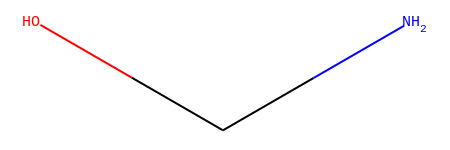

In [0]:
a

SMILES를 다르게 입력하더라도 결과값은 동일합니다.


따라서 어떤 SMILES 을 입력하더라도 유일하게 자체적으로 하나의 SMILES으로 처리하는 것을 ‘unique SMILES'이라 하고 이를 형성하기 위한 알고리즘이 존재합니다.
동위원소, 카이랄을 표현하기위한 SMILES를 'isomeric SMILES'이라 합니다. unique SMILES와 isomeric SMILES가 합해진 형태를 'absolute SMILES'이라 합니다.

일반적으로 주어진 구조를 나타내는 SMILES구조가 많이 있는데, 모든 유효한 가능성 중에서 하나의 특별한 일반 SMILES를 생성하기 위해 canonical 알고리즘이 존재합니다. 이 특별한 SMILES는 "unique SMILES"로 알려져 있습니다. 일반적인 규칙을 따르는 form을 canonical form이라고 생각할 수 있습니다.



## **3. SMILES 규칙(SMILES Sepcification Rules)**
- SMILES는 띄어쓰기를 사용하지 않고 원자들을 일렬로 나열하여 표현합니다.
- 수소원자는 생략하거나, 포함해도 됩니다.
- 방향족 물질들은 직관적으로 명시하거나 Kekulé form으로 분류할 수 있습니다.
- 대표적으로 5가지의 규칙이 있습니다. 
  1. 원자(atom) 
  2. 결합(bond)
  3. 가지(branch)
  4. 고리닫힘(ring closure)
  5. 단절(disconnection) 

### **3.1 원자(atom)** 

- 수소를 포함하지 않는 단일원자는 [ ]사용합니다.organic subset는 [ ] 없이 쓰이기도 합니다.

- 최소 원자가 전자를 갖는다고 인식합니다.

      B (3), C (4), N (3,5), O (2), P (3,5), S (2,4,6), 할로겐족(1)

- 지방족 탄소는 대문자 'C' 로, 방향족 탄소는 'c'로 명시합니다.

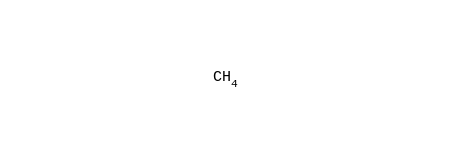

In [0]:
a = Chem.MolFromSmiles('C') # 수소를 생략해도 출력값에 포함됩니다.
a

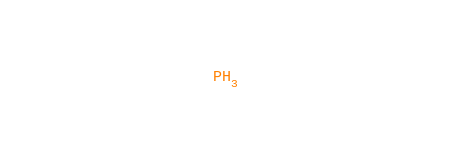

In [0]:
a = Chem.MolFromSmiles('P')
a

- '$[]$'속의 수소와 형식전하는 반드시 명시되어야 합니다. - 결합된 수소의 수는 H 와 숫자로 표현됩니다.
- 형식전하는 + 혹은 - 로 표시되어야 합니다. 명시되어 있지 않으면 전하는 0으로 가정합니다.
$[Fe++] = [Fe+2]$

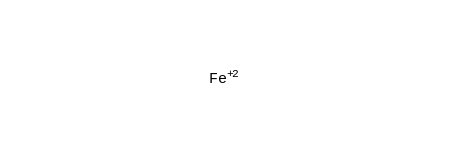

In [0]:
a = Chem.MolFromSmiles('[Fe++]')
a

### **3.2 결합(Bonds)**
- 단일 결합은 생략하거나 '-'기호를 사용한다.
- 이중 결합은 '='기호를 사용합니다.
- 삼중 결합은 '#'기호를 사용합니다.
- 방향족 결합은 생락하거나 ':'기호를 사용합니다.

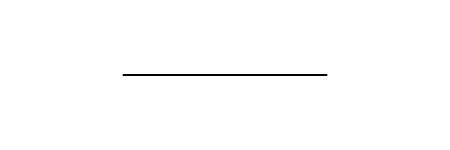

In [0]:
a  = Chem.MolFromSmiles('CC')
a

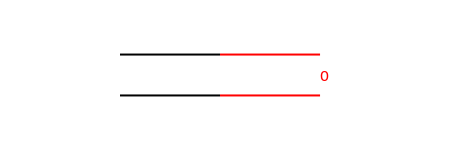

In [0]:
a = Chem.MolFromSmiles('O=C')
a

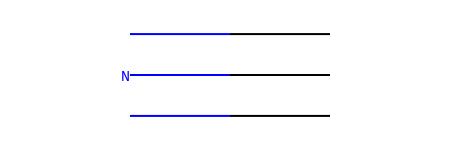

In [0]:
a = Chem.MolFromSmiles('C#N') 
a

이와 같은 규칙을 이용하여 6-hydroxy-1,4-hexadiene을 표현해보면

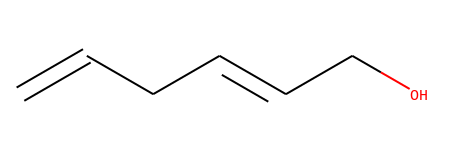

In [0]:
a = Chem.MolFromSmiles('C=CCC=CCO')
a

### **3.3 가지(Branches ; 치환기, 알킬기)**
- 가지들은 중첩되거나 쌓일 수 있으며, 소괄호`()`로 묶어 결합 원소의 오른쪽에 써줍니다.

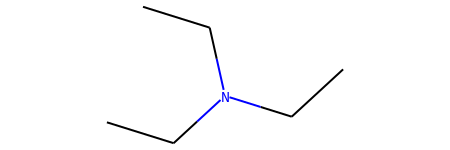

In [0]:
Triethylamine = Chem.MolFromSmiles('CCN(CC)CC') 
Triethylamine

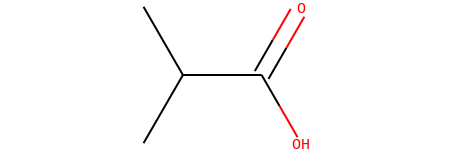

In [0]:
Isobutyric_acid = Chem.MolFromSmiles('CC(C)C(=O)O')
Isobutyric_acid

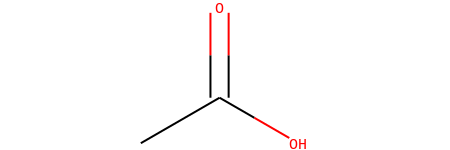

In [0]:
acetic_acid = Chem.MolFromSmiles('CC(=O)O')
acetic_acid

### **3.4 고리구조(Cyclic Structures)**
- 고리형 구조는 고리에서 하나의 결합을 끊어 선형적으로 표시하고, 결합을 끊은 원자 바로 뒤에 숫자를 이용해 고리형 구조를 표현합니다.

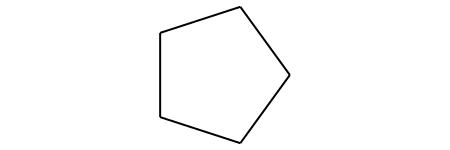

In [0]:
cyclopentane = Chem.MolFromSmiles('C1CCCC1')
cyclopentane

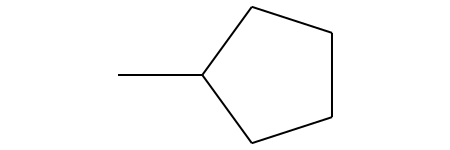

In [0]:
m = Chem.MolFromSmiles('C1CCC(C)C1')
m

- 동일한 화학물을 여러 방법으로 표현할 수 있고, 한 가지 분자의 다양한 표현은 우선순위가 없습니다.

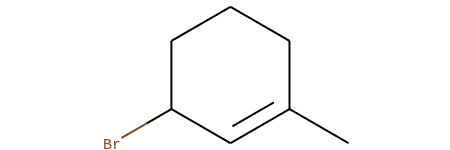

In [0]:
mbc1 = Chem.MolFromSmiles('CC1=CC(Br)CCC1')
mbc1

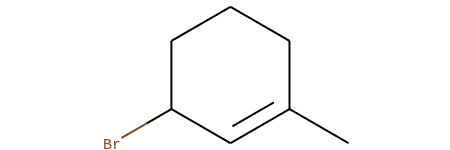

In [0]:
mbc2 = Chem.MolFromSmiles('CC1=CC(CCC1)Br')
mbc2

- 한 원자는 하나 이상의 `ring closure`을 가질 수 있습니다. 아래와 같은구조로 설명할 수 있습니다.

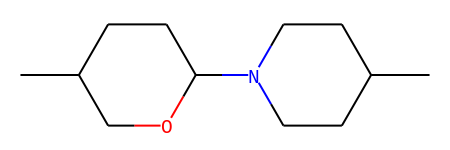

In [0]:
m = Chem.MolFromSmiles('O1CC(C)CCC1N1CCC(C)CC1')
m

### **3.5 비결합 구조(Disconnected Structures)**
- 연결되지 않은 혼합물은 ' . '을 사용하여 각각의 구조들을 분리시킵니다.
- 이온 혹은 리간드(ligands)의 연결은 순서에 상관없이 사용가능합니다. 한 전하가 다른 전하로의 연결을 의미하는 것도 아니고, 알짜 전하를 반드시 0으로 가질 필요도 없스니다.
- 필요에 따라, 한 이온의 SMILES이 sodium phenoxide(석탄산나트륨)와 같이 다른 이온에 삽입될 수 있습니다.



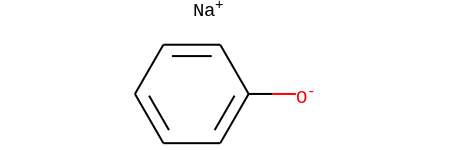

In [0]:
m = Chem.MolFromSmiles('[Na+].[O-]c1ccccc1')
m

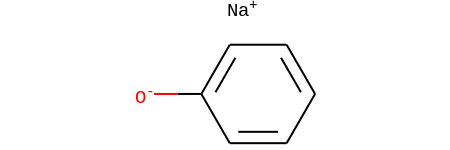

In [0]:
m = Chem.MolFromSmiles('c1cc([O-].[Na+])ccc1')
m

- 원자 명시에 따른 자릿수가 같은 쌍은 서로 결합됨을 의미합니다.

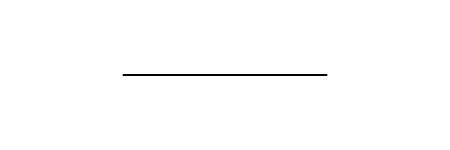

In [0]:
C_C = Chem.MolFromSmiles('C1.C1')
C_C

## **4. 이성질체 SMILES(Isomeric SMILES)**

- 동위원소, 이중결합의 구조, 카이랄성을 규정합니다.
- IUPAC 명명법과 CIP 명명법과는 다르게 카이랄성을 명명합니다.
- 모든 화합물의 카이랄성이 알려져 있지는 않기 때문에, 가능한 카이랄성만을 표기합니다.


### **4.1 동위원소(Isotopic Specification)**
- 동위원소는 [원자량 + 원자기호] 로 표기합니다.

SMILES | Name
---- | ----
$[12C]$ | carbon-12
$[13C]$ | carbon-13
$[C]$ | carbon(unspecified mass)
$[13CH4]$ | C-13 methane

### **4.2 이중결합 배치(Configuration Around Double Bonds)**
- 이중결합의 구조 이성질체는 결합의 방향을 나타내며 '/'와'\'로 명시합니다.
- '/'와'\'는 결합된 원자들 간의 상대적인 위치를 나타내는 것으로, 이중결합으로 연결될 때에만 의미를 갖습니다.

>**E,Z체계**<br>
E(entgegon) : 반대편이라는 어원, 높은 우선순위를 갖는 탄소가 포함된 치환기가 이중결합의 **반대 위치**에 존재할 경우(≒trans-)<br>
Z(zusammen) : 함께라는 어원, 높은 우선순위를 갖는 탄소가 포함된 치환기가 이중결합의 **같은 위치**에 존재할 경우(≒cis-)<br>
Ex) E- and Z-1,2-dibromoethene


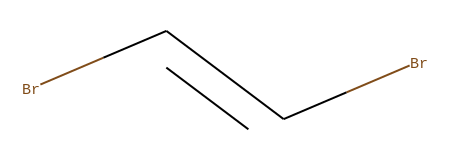

In [0]:
E1 = Chem.MolFromSmiles('Br/C=C/Br') # 이중결합 왼쪽과 오른쪽의 슬래쉬가 방향이 같으면 E 방향입니다.
E1

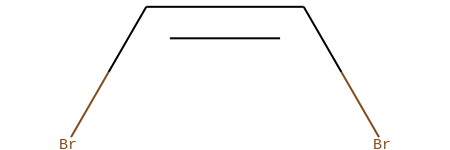

In [0]:
E2 = Chem.MolFromSmiles('Br/C=C\Br') # 이중결합 왼쪽과 오른쪽의 슬래쉬가 방향이 반대면 Z 방향입니다.
E2

- SMILES과 CIP의 카이랄표현의 차이점은 SMILES은 국부적인 카이랄성(local chirality)를 표현할 수 있다는 점입니다.

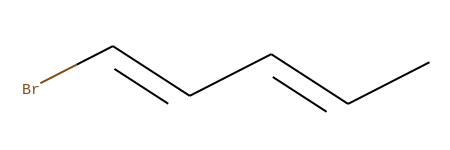

In [0]:
S1 = Chem.MolFromSmiles('Br/C=C/C=C/C')
S1

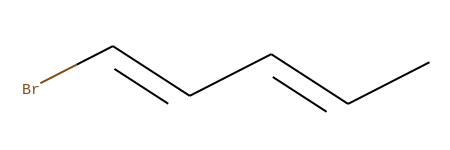

In [0]:
S2 = Chem.MolFromSmiles('Br/C=C/C=CC')
S2

### **4.3 사면체의 중심의 구조(Configuration Around Tetrahedral Centers)**
* SMILES은 국부적 카이랄성을 기반으로한 가장 일반적인 형식의 명시법을 사용합니다.
* SMILES에서 사면체의 중심은 카이랄 원자의 원자 기호에 카이랄이라는 명시(@ 혹은 @@)를 합니다. '@'는 이웃하는 원자들이 반시계로 표현되어 있다는 것을 의미하고 '@@'는 이웃하는 원자들이 시계로 표현되어 있다는 것을 의미합니다.
* **카이랄성(Chirality):**<br>
거울상에 포갤 수 없는 분자를 카이랄(chiral)이라 합니다.<br>
같은 분자식이라 하여도 입체구조에 의해 서로 다른 화합물입니다. 이를 입체 이성질체라고 합니다. <br>
카이랄성의 가장 일반적인 원인은 네 개의 서로 다른 치환기가 결합된 탄소에서 가장 많이 볼 수 있는 정사면체인 원자 때문입니다.<br>
네 개의 서로 다른 치환기체가 결합된 탄소 원자는 두 개의 주요 대칭 요소가 없고 **카이랄 중심(chiral center)**라 불립니다.<br> Ex) 1-Bromo-1-chloro-1-fluoromethane : C에 -Cl, -H, -F, -Br이 결합된 카이랄 중심입니다.<br>
![chiral](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3c/Chiral.svg/300px-Chiral.svg.png)<br>
(사진출처:위키피디아)

* **카이랄 중심의 R or S 배열 결정**<BR> 카이랄 중심을 정하고 4개의 치환기를 확인한 후, 우선순위가 가장 높은 것(1)부터 가장 낮은 것(4)까지 번호를 배정합니다.

    ```
    우선순위
    카이랄 중심에서 결합된 원자의 번호가 클수록 높은 우선순위 
    -> 비교가 안된다면 두 번째 쌍을 살펴봅니다 
    -> 이중 결합의 경우 결합과 같은 수만큼의 '가상'의 원자들이 단일 결합으로 취급
    ```

  가장 낮은 우선순위(4)를 갖는 치환기를 자동차의 운전대 기둥처럼 자신으로 부터 가장 멀리 위치하도록 분자를 배치합니다.<br>
자신쪽으로 향하고 있는 세 개의 치환기들을 우선순위가 가장 높은(1)치환기 부터 우선순위가 가장 낮은(3) 치환기 순서대로 읽습니다.<br>
치환기가 시계방향이면 배열을 R(라틴어 rectus,똑바른, 올바른); SMILES에선 @@, 반시계 방향이라면 S(라틴어 sinister, 왼쪽); SMILES에선 @로 합니다.

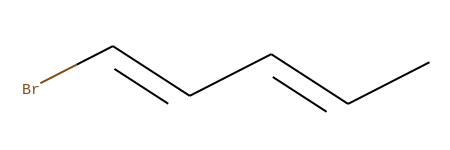

In [0]:
bS1 = Chem.MolFromSmiles('NC(C)(F)C(=O)O')
S1

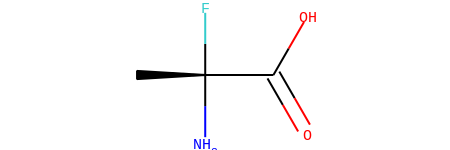

In [0]:
m = Chem.MolFromSmiles('N[C@](C)(F)C(=O)O')
m

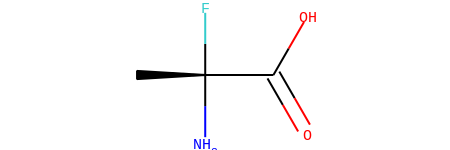

In [0]:
m = Chem.MolFromSmiles('N[C@@](F)(C)C(=O)O')
m

In [0]:
m.HasSubstructMatch(Chem.MolFromSmiles('F[C@](N)(C)C(=O)O'),useChirality=True) # 이 둘의 구조가 같은지 확인

True

### **4.4 일반적인 카이랄 규칙(General Chiral Sepcification)**

* 많은 종류의 카이랄성이 존재하며, '@'기호를 사용함으로써 카이랄을 나타냈습니다.
* SMILES에서 사용하는 일반적 카이랄 규격은 3부분이 있습니다:
  1. '@'기호
  2. 잇따르는 두 글자의 카이랄 표시
  3. 잇따르는 수치해석적인 카이랄 지정자
* 가장 기초가 되는 카이랄 class는 각각의 degree(연결의 수)입니다.
       4개의 연결에 기초가 되는 class는 사면체(TH)입니다.
* 대부분의 경우 @1표시는 SMILES의 순서를 기준으로 한 축에 반시계 방향으로 @2표시는 시계방향을 의미합니다.
* '@@'와 '@@@'는 각각 '@2','@3'와 같습니다.
* 위에서 사용된 '@'와 '@@'는 '@TH1'과 '@TH2'를 간략하게 표현한 것입니다.
* SMILES은 모든 범위에 관한 카이랄 규격을 다룹니다.('감소된 카이랄성', '퇴화된 카이랄성') 따라서 정확하게 알고 있는 모든 것을 보장하는 언어입니다.
* 이 섹션의 마지막 부분에선 사면체, 알렌식(allen-like), 사각평면, trigonal-bypyramidal, octahedral의 카이랄성에 제한될 것입니다. 비록 많은 카이랄성은 위의 체계로 다룰 수 있겠지만, 이러한 5개의 클래스는 화학에서 매우 흔하고, 자주 다뤄지는 부분입다.

* Tetrahedral:TH라는 기호로 표시되며, 4방위가 붙어있는 카이랄 클래스의 default입니다.

* Allen-like:AL의 기호로 표시되며, 카이랄 중심이 이중결합으로 연결된 2개가 붙어있는 카이랄 클래스의 default입니다. 비록 C=C=C의 구조가 가장 흔하나, C=C=C=C=C 구조들도 또한 allen-like입니다. 이중결합된 원자가 일렬로 짝수개가 연결된 것입니다.

![AL](http://www.daylight.com/dayhtml/doc/theory/theory18.gif) | ![substituted](http://www.daylight.com/dayhtml/doc/theory/theory19.gif)
---- | ----
OC(Cl)=$[C@]$=C(C)F | OC=$[C@]$=CF
OC(Cl)=$[C@AL1]$=C(C)F | OC($[H]$)=$[C@AL1]$=C($[H]$)F

In [0]:
m = Chem.MolFromSmiles('OC(Cl)=[C@]=C(C)F')
m.HasSubstructMatch(Chem.MolFromSmiles('OC(Cl)=[C@@]=C(F)C'),useChirality=True) # 카이랄성이 일치하는지 확인

True

* 사각평면 : SP 기호로 표시
@SP1,@SP2, @SP3; 4방위가 연결된 카이랄 class의 default는 아니고, 줄이는 표현 또한 없습니다. 또한 시계와 반시계방향이 없는 점이 특징입니다.

![SP](http://www.daylight.com/dayhtml/doc/theory/theory20.gif) | -
---- | ----
F$[Po@SP1]$(Cl)(Br)I | (SP1 lists in a "U shape")
F$[Po@SP2]$(Br)(Cl)I | (SP2 lists in a "4-shape")
F$[Po@SP3]$(Cl)(I)Br | (SP3 lists in a "Z shape")

* Trigonal-bipyramidal:TB기호로 사용합니다. 5개의 방향의 카이랄 class의 default입니다.

  ![TB](http://www.daylight.com/dayhtml/doc/theory/theory21.gif)

  S$[As@@]$(F)(Cl)(Br)C=O<br>
  O=C$[As@]$(F)(Cl)(Br)S<br>

In [0]:
m = Chem.MolFromSmiles('S[As@@](F)(Cl)(Br)C=O')
m.HasSubstructMatch(Chem.MolFromSmiles('O=C[As@](Cl)(Br)(F)S'),useChirality=True)

True

In [0]:
m.HasSubstructMatch(Chem.MolFromSmiles('O=C[As@](F)(Cl)(Br)S'),useChirality=True)

True

* *Octahedral* : OH기호로 사용. 6개의 방향의 카이랄 class의 default입니다.
>가능한 값은 @OH1~ @OH2 : @OH1(or @)는 한 개의 축이 다른 것과 연결을 SMILE에 의해 나열될 때, 4개의 중간, 수평적으로 연결된 원자들을 시계방향으로 나열시킨 것.<br>@OH2(or @@)는 시계방향
</br>![OH](http://www.daylight.com/dayhtml/doc/theory/theory22.gif)


## **5. SMILES의 관례(MILES Convention)**



### **5.1 Hydrogens**

수소 원자는 대부분 생략됩니다.
일반적으로 3가지 방법으로 수소 원자를 표시합니다.
 - 암시적 표시 : '[',     ']' 으로 표시되지 않은 원자가 원소들
 - 명확한 표시 : '[',     ']' 안에 정확한 갯수와 함께 표시
 - 하나의 수소 원자 : [H]
 
그리고 반드시 수소원자를 명확히 표시해야할 때가 있습니다.
 - 전하를 띄는 수소 : [H+]
 - 수소 분자 : [H][H]
 - 하나 이상의 다른 원자에 연결된 수소 : bridging hydrogens
 - 동위원소 수소  : heavy water [2H]O[2H]


RDKit WARNING: [10:53:40] WARNING: not removing hydrogen atom without neighbors


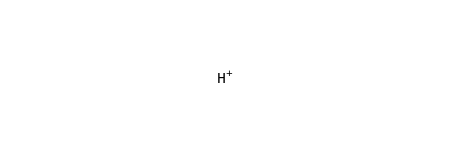

In [0]:
m = Chem.MolFromSmiles('[H+]')
m

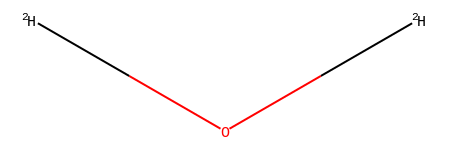

In [0]:
heavywater = Chem.MolFromSmiles('[2H]O[2H]')
heavywater

### 5.2  **방향족(Aromaticity)**

- 분자의 대칭성을 특징짓기 위해서 SMILES 같은 시스템에서 명확한 명명법을 생성할 수 있어야합니다. <br>
- 정확한 방향족 판단 알고리즘이 있는 경우에, 사용자가 지방족 구조를 입력하고 싶을때 방향족 구조식으로 입력할 필요가 없습니다.<br>
- 원하는 화합물을 짧게 명시할 수 있다.

SMILES은 Hueckel 규칙의 확장 된 버전을 사용하여 방향족 분자와 이온을 식별합니다.

> Hueckel's Rule
> 1. 분자는 고리를 가져야합니다.
> 2. 고리의 모든 원자는 같은 평면에 있어야합니다.
> 3. 고리의 모든 원자는 **fully conjugated** 이어야합니다.(모든 원자가 p 오비탈을 가진다.)
> 4. 분자는 (4n+2)개의 $\pi$ 전자를 가집니다. ( n은 0 보다 크거나 같은 정수 ) <br>
=> 4번만 만족하지 않는 화합물을 **antiaromatic** 이라고 합니다.



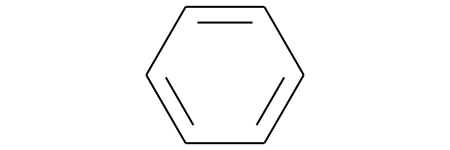

In [0]:
H = Chem.MolFromSmiles('c1ccccc1') # Aromatic
H

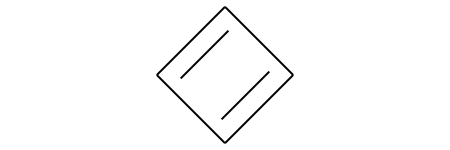

In [0]:
H = Chem.MolFromSmiles('c1ccc1') # Aromatic
H

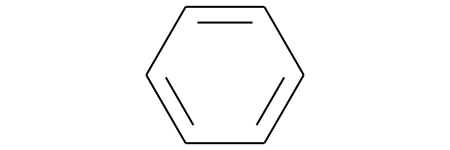

In [0]:
K = Chem.MolFromSmiles('C1=CC=CC=C1') # Aliphatic
K

특히, c1ccc1 (탄소 4개)와 c1ccccccc1 (탄소 8개)의 입력은 C1=CC=C1 및 C1=CC=CC=CC=CC=C1에 대한 정확한 *anti-aromatic* 구조를 생성할 것입니다. 위의 Hueckel's rule의 4번째 규칙에만 만족하지 않기 떄문입니다. 그러한 경우 SMILES 시스템은 내재된 sp2 혼합, 내재된 수소 수 및 지정된 공식 전하가 있는 경우 보존되는 구조를 찾습니다.<br>
그러나 c1cccc1과 같은 일부 입력은 부정확할 뿐만 아니라 불가능할 수도 있습니다. 여기서 c1cccc1은 C1=CCC=C1로 변환할 수 없는데, 그 이유는 탄소 원자 중 하나는 두 개의 히드로겐이 부착된 sp3이기 때문입니다.<br>
그러한 구조물에서는 단일 및 이중 결합을 번갈아 배치할 수 없기 때문에 SMILES은 **Impossible**으로 표시할 것입니다.<br>

다음 목록에 있는 원자만 방향족으로 고려할 수 있다 : C, N, O, P, S, As, Se 및 *wildcard*.

![a](http://www.daylight.com/dayhtml/doc/theory/theory27.gif)|![b](http://www.daylight.com/dayhtml/doc/theory/theory28.gif)|![c](http://www.daylight.com/dayhtml/doc/theory/theory29.gif)
----|----|----
C1=COC=C1|C1=CN=C[NH]C(=O)1|C1=C*=CC=C1
c1cocc1|c1cnc[nH]c(=O)1|c1c*ccc1


### **5.3 Aromatic Nitrogen Compounds**

방향성 질소는 모두 방향성 질소 기호 n으로 지정할 수 있습니다. 
 - 피리딘 (Pyridine)
 - 피리딘-N-산화물 (Pyridine-N-oxide)
 - 피롤 (Methyl and 1H-pyrrole)

![a](http://www.daylight.com/dayhtml/doc/theory/theory23.gif)|![b](http://www.daylight.com/dayhtml/doc/theory/theory24.gif)|![c](http://www.daylight.com/dayhtml/doc/theory/theory25.gif)
----|----|----
n1ccccc1 | O=n1ccccc1 _ _ [O-][n+]1ccccc1	 |  Cn1cccc1 _ _ _ [nH]1cccc1
Pyridine | Pyridine-N-oxide	 | Methyl and 1H-pyrrole

> 1-1H-pyrrole의 질소는 pyridyl-N와 구별하기 위해 [nH]로 쓰여져 있습니다.

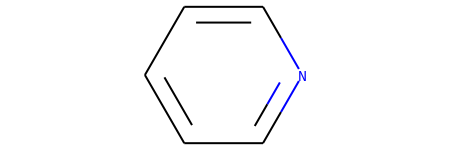

In [0]:
N = Chem.MolFromSmiles('n1ccccc1')
N

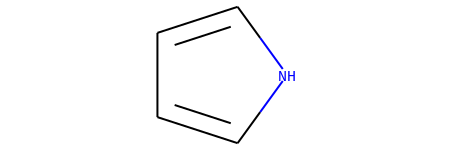

In [0]:
N2 = Chem.MolFromSmiles('[nH]1cccc1')
N2

### **5.4 Bonding Conventions**

SMILES의 장점 : 동일한 구조를 다양한 모델로 설명, 분자속 어떤 원자의 전하도 나타낼 수 있습니다.
> 니트로메탄(Nitromethane) : `CN(=O)=O`    또는   `C[N+](=O)[O-]`

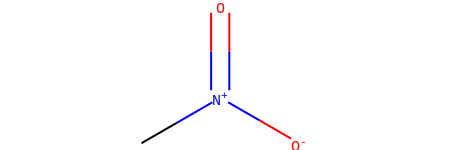

In [0]:
N3 = Chem.MolFromSmiles('CN(=O)=O')
N3

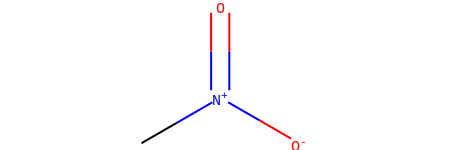

In [0]:
N4 = Chem.MolFromSmiles('C[N+](=O)[O-]')
N4

### **5.5 Tautomers**

![a](http://www.daylight.com/dayhtml/doc/theory/theory26.gif)|-
-----------|-----------
O=c1[nH]cccc1 _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ | Oc1ncccc1
2-pyridone _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ | 2-pyridinol

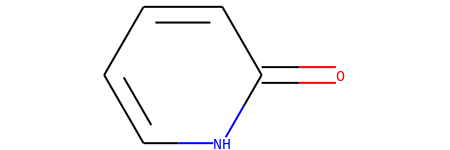

In [0]:
T1 = Chem.MolFromSmiles('O=c1[nH]cccc1')
T1

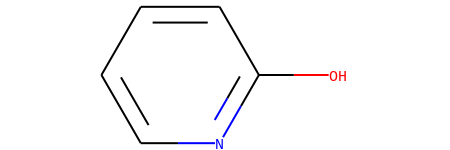

In [0]:
T2 = Chem.MolFromSmiles('Oc1ncccc1')
T2

# **Ⅱ. 시퀀스-투-시퀀스 (Sequencd-to-Sequence, seq2seq)**


시퀀스-투-시퀀스(Sequence-to-Sequence)는 입력된 시퀀스로부터 다른 도메인의 시퀀스를 출력하는 다양한 분야에서 사용되는 모델입니다. 대표적으로 챗봇(Chatbot)과 기계 번역(Machine Translation)이 있습니다.  입력 시퀀스와 출력 시퀀스를 각각 질문과 대답으로 구성하면 챗봇으로 만들 수 있고, 입력 시퀀스와 출력 시퀀스를 각각 입력 문장과 번역 문장으로 만들면 번역기로 만들 수 있습니다. 따라서 seq2seq에 대한 구조를 이해하고, 케라스(keras)를 통해 직접 구현해보겠습니다.

### **1. 시퀀스 - 투 - 시퀀스  (Sequence-to-Sequence)**

![대체 텍스트](https://wikidocs.net/images/page/24996/%EC%8B%9C%ED%80%80%EC%8A%A4%ED%88%AC%EC%8B%9C%ED%80%80%EC%8A%A4.PNG)

위의 그림은 seq2seq 모델로 만들어진 번역기가 'I am a student'라는 영어 문장을 입력받아서, 'je suis étudiant'라는 프랑스 문장을 출력하는 모습을 보여줍니다. Seq2Seq의 장점은 전체 input을 훑어본 뒤에 임의의 어떤 시퀀스를 출력할 수 있으며, 효율적인 번역을 위해 input의 특정 부분만을 집중하여 살펴볼 수도 있습니다. Seq2Seq의 한계는 시퀀스의 입력과 출력 길이에 어떠한 제약도 없다는 것이지만, Seq2Seq 모델은 LSTM의 한계때문에 입력 문장이 매우 길면 효율적으로 학습하지 못합니다.

![대체 텍스트](https://wikidocs.net/images/page/24996/seq2seq%EB%AA%A8%EB%8D%B811.PNG)

seq2seq는 크게 입력을 context vector로 변화하는 인코더와 context vector을 원래의 정보로 출력하는 디코더로 구성되어 있습니다. 인코더와 디코더는 각각 여러개의 LSTM 셀로 구성되어 있습니다.

![대체 텍스트](https://wikidocs.net/images/page/24996/%EC%9D%B8%EC%BD%94%EB%8D%94%EB%94%94%EC%BD%94%EB%8D%94%EB%AA%A8%EB%8D%B8.PNG)

### **2. 인코더**
인코더는 입력 문장을 받는 LSTM 셀입니다.
인코더는 입력 문장의 모든 단어들을 순차적으로 입력받은 뒤에 마지막에 이 모든 단어 정보들을 압축해서 하나의 벡터로 만드는데, 이를 context vector라고 합니다. 입력 문장의 정보가 하나의 context vector로 모두 압축되면 인코더는 context vector를 디코더로 전송합니다. 

![대체 텍스트](https://wikidocs.net/images/page/24996/rnn%EA%B7%BC%ED%99%A9.PNG)

현재 시점(time step)을 t라고 할 때, LSTM 셀은 t-1에서의 은닉 상태와 t에서의 입력 벡터를 입력으로 받고, t에서의 은닉 상태를 만듭니다. 이때 t에서의 은닉 상태는 바로 위에 또 다른 은닉층이나 출력층이 존재할 경우에는 위의 층으로 보내거나, 필요없으면 값을 무시할 수 있습니다. 그리고 LSTM 셀은 다음 시점에 해당하는 t+1의 LSTMN 셀의 입력으로 현재 t에서의 은닉 상태를 입력으로 보냅니다.

이런 구조에서 현재 시점 t에서의 은닉 상태는 과거 시점의 동일한 LSTM 셀에서의 모든 은닉 상태의 값들의 영향을 누적해서 받아온 값이라고 할 수 있습니다. 그렇기 때문에 앞서 언급했던 context vector는 사실 인코더에서의 마지막 LSTM 셀의 은닉 상태 값을 말하는 것이며, 이는 입력 문장의 모든 단어 토큰들의 정보를 요약해서 담고있다고 할 수 있습니다. 그리고 이 context vector는 디코더의 LSTM 셀의 첫 번째 은닉 상태로 사용됩니다.

### **3. 디코더**
디코더는 출력 문장을 출력하는 LSTM 셀입니다.
디코더는 인코더의 마지막 LSTM 셀의 은닉 상태인 context vector를 첫번째 은닉 상태의 값으로 사용합니다. 디코더는 초기 입력으로 문장의 시작을 의미하는 심볼 <sos>가 들어갑니다. 디코더의 첫번째 LSTM 셀은 이 첫번째 은닉 상태의 값과, 현재 t에서의 입력값인 <sos>로부터, 다음에 등장할 단어를 예측합니다. 그리고 이 예측된 단어는 다음 시점인 t+1 LSTM에서의 입력값이 되고, 이 t+1에서의 LSTM 또한 이 입력값과 t에서의 은닉 상태로부터 t+1에서의 출력 벡터. 즉, 또 다시 다음에 등장할 단어를 예측하게 될 것입니다. 이런 식으로 기본적으로 다음에 올 단어를 예측하고, 그 예측한 단어를 다음 시점의 LSTM 셀의 입력으로 넣는 행위를 반복합니다. 이 행위는 문장의 끝을 의미하는 심볼인 <eos>가 다음 단어로 예측될 때까지 반복됩니다.

![대체 텍스트](https://wikidocs.net/images/page/24996/decodernextwordprediction.PNG)

출력 단어로 나올 수 있는 단어들은 다양한 단어들이 있습니다. seq2seq 모델은 선택될 수 있는 모든 단어들로부터 하나의 단어를 골라서 예측해야 합니다. 이를 예측하기 위해서 소프트맥스 함수를 사용합니다. 디코더에서 각 시점(time step)의 LSTM 셀에서 출력 벡터가 나오면, 해당 벡터는 소프트맥스 함수를 통해 출력 시퀀스의 각 단어별 확률값을 반환하고, 디코더는 출력 단어를 결정합니다.

### **4. 임베딩 층**
임베딩 층은 텍스트를 고정된 길이의 숫자 벡터로 바꿉니다. 
seq2seq에서 사용되는 모든 단어들은 워드 임베딩을 통해 임베딩 벡터로서 표현된 임베딩 벡터입니다. 아래 그림은 모든 단어에 대해서 임베딩 과정을 거치게 하는 단계인 임베딩 층(embedding layer)의 모습을 보여줍니다.

![대체 텍스트](https://wikidocs.net/images/page/24996/%EB%8B%A8%EC%96%B4%ED%86%A0%ED%81%B0%EB%93%A4%EC%9D%B4.PNG)

![대체 텍스트](https://wikidocs.net/images/page/24996/%EC%9E%84%EB%B2%A0%EB%94%A9%EB%B2%A1%ED%84%B0.PNG)

예를 들어 I, am, a, student라는 단어들에 대한 임베딩 벡터는 위와 같은 모습을 가집니다. 여기서는 그림으로 표현하고자 사이즈를 4로 하였지만, 보통 실제 임베딩 벡터는 수백 개의 차원을 가질 수 있습니다.

### **5. 교사 강요**
훈련 과정에서는 이전 시점의 디코더 셀의 출력을 현재 시점의 디코더 셀의 입력으로 넣어주지 않고, 이전 시점의 실제값을 현재 시점의 디코더 셀의 입력값으로 하는 방법을 사용할 겁니다. 그 이유는 이전 시점의 디코더 셀의 예측이 틀렸는데 이를 현재 시점의 디코더 셀의 입력으로 사용하면 현재 시점의 디코더 셀의 예측도 잘못될 가능성이 높고 이는 연쇄 작용으로 디코더 전체의 예측을 어렵게 합니다. 이런 상황이 반복되면 훈련 시간이 느려집니다. 만약 이 상황을 원하지 않는다면 이전 시점의 디코더 셀의 예측값 대신 실제값을 현재 시점의 디코더 셀의 입력으로 사용하는 방법을 사용할 수 있습니다. 이와 같이 LSTM의 모든 시점에 대해서 이전 시점의 예측값 대신 실제값을 입력으로 주는 방법을 교사 강요라고 합니다.

지금까지 가장 기본적인 seq2seq에 대해서 배워보았습니다. 사실 seq2seq는 어떻게 구현하느냐에 따라서 충분히 더 복잡해질 수 있습니다. 컨텍스트 벡터를 디코더의 초기 은닉 상태로만 사용할 수도 있고, 거기서 더 나아가 컨텍스트 벡터를 디코더가 단어를 예측하는 매 시점마다 하나의 입력으로 사용할 수도 있으며 거기서 더 나아가면 어텐션 메커니즘이라는 방법을 통해 지금 알고있는 컨텍스트 벡터보다 더욱 문맥을 반영할 수 있는 컨텍스트 벡터를 구하여 매 시점마다 하나의 입력으로 사용할 수도 있습니다.



# **Ⅲ. Seq2seq Fingerprint : An Unsupervised Deep Molecular Embedding for Drug Discovery**

**약물 발견**은 잠재적인 효과가 있는 새로운 의약품을 식별하는 과정입니다. 현대의 약물 발견은 일반적으로 약물 화합물 선택으로 구현되는 반면, 모든 후보 화합물의 화학 물질 특성, 예를 들어 친 화성, 선택성, 대사 안정성은 실험실 환경에서 생물학적으로 테스트 됩니다. 약물 요구 사항 테스트를 통과한 모든 특성은 잠재적 약물 후보로 선정됩니다. 그러나 이 과정은 수많은 자본과 노동력이 필요합니다.

따라서, machine learning method를 사용하여 화학적 특성을 자동으로 예측하는 것은 최근 약물 발견 커뮤니티에 큰 관심을 불러 일으켰습니다. 그러나 대부분의 machine learning 알고리즘은 길이가 고정된 연속벡터를 입력으로 사용합니다. 그러나 분자의 특성상 고정 길이 벡터를 가진 분자를 표현하기가 매우 어렵습니다. 그래서 전반적으로 분자 표현의 선택은 machine learning 기반 약물 발견이 핵심입니다.

전통적인 고정 길이 벡터 분자의 fingerprint 표현은 데이터 기반이 아니라 인간의 전문 지식에 관한 것입니다. 그중 하나는 일부 Hashing process(예 : Extended Con-음성 fingerprint (ECFP))입니다. 그 fingerprint들은 보통 속도는 효율적이지만 이미지의 손실 압축과 매우 유사합니다. 다른 비 데이터 기반 fingerprint의 종류는 로컬 하위 구조를 기반으로합니다.  생물 학자들은 여러 가지 관련성이 높은 화학 물질을 찾습니다. 특정 작업을 위한 분자 하위 구조 및 fingerprint 설계에 따라 기능 벡터를 출력합니다. 그러나 이런 종류의 설계에는 분명히 수년간의 전문 지식이 필요합니다. 경험이 풍부하고 작업에 매우 민감합니다. 

요약하자면, 비 데이터 구동 fingerprint은 충분한 정보를 인코딩하는 데 제한이 있습니다. 비싸고 정확한 인간 지식에 매우 의존합니다. 이 때문에, 데이터 기반 fingerprint에 대한 수요가 크게 증가했습니다. 따라서, 수년간의 인간 지식과 고가의 생물학적 물질이 필요하지 않습니다.

본 논문에서는 seq2seq fingerprint 이라는 비지도학습 데이터 중심 심층 학습 분자 fingerprint 방법을 제안합니다. 위에서 언급 한 문제를 해결하기 위해 <br> 1) 제안 된 방법은 인간의 전문 지식이 필요 없습니다.<br> 2) 제안 된 방법에 의해 생성 된 fingerproint는 원래 분자 표현으로 완전히 되돌릴 수있어 fingerprint 벡터에 인코딩 된 정보의 충분성을 보장합니다.<br> 3) 제안 된 방법은 심층 신경망의  레이블이없는 거대한 데이터 세트에 대해 지도학습되지 않은 훈련을 사용합니다.  

fingerprint은 시퀀스-시퀀스 학습 (seq2seq 학습)이라는 최신 혁신 모델을 기반으로 설계되었습니다. seq2seq 학습 방법은 겉보기에는 관련이 없는 영어-프랑스어 번역에서 비롯됩니다. seq2seq 학습 방법은 영어 문장을 입력으로 사용하여 의미 벡터로 인코딩 한 다음 출력으로 프랑스어 문장으로 다시 변환합니다. 이 방법의 요점은 비슷하지만 seq2seq 학습의 입력과 출력을 분자의 텍스트 표현 인 동일한 SMILE 문자열로 설정하는 방식이 다릅니다. SMILE 문자열을 고정 크기 벡터에 Mapping 한 다음 원래 SMILE 문자열로 다시 변환합니다. 중간 고정 크기 벡터는 seq2seq fingerprint로 추출됩니다. 모델이 잘 훈련되면, 중간 특징 벡터는 원래의 분자 표현을 회복하기 위해 모든 정보를 인코딩하는 것으로 간주됩니다. 따라서 seq2seq fingerprint은 분자 특성을 정확하게 예측할 수있는 엄격한 정보를 잡아낼 것 으로 예상됩니다. 

<br>seq2seq fingerprint의 장점은 3 가지입니다. <br>1) seq2seq fingerprint의 교육 단계에는 라벨이 필요 없어서 비용이 많이 드는 노동 집약적 인 라벨 획득 절차가 필요 없습니다.<br> 2) 데이터 중심적이므로 전문가의 주관적 지식에 의존하지 않습니다.<br> 3) 레이블이없는 data는 실제로 거의 무제한이므로 매우 deep learning 시킬 수 있습니다.

![대체 텍스트](https://github.com/syeong1218/python/blob/master/%EC%BA%A1%EC%B2%98.PNG?raw=true)


## **1. SMILES DATA SET**
지금부터는 저희가 사용하려는 Data Base 들에 대한 자료를 소개하겠습니다. Data Base 는 http://moleculenet.ai/datasets-1 에서 찾았으며, 이 곳에서 SIDER 라는 Data set을 사용하겠습니다. 이 Data set은 인체내의 27개의 장기에 대한 시판 약물과 부작용의 Data set 입니다. 이 Data Set을 사용하여 모델을 학습시킬 예정입니다. 

In [0]:
import os
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw, Descriptors
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
try:

    %tensorflow_version 2.x  # %tensorflow_version only exists in Colab

except Exception:

    pass

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # %tensorflow_version only exists in Colab`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [0]:
smifile = "gdb11_size08.smi"
data = pd.read_csv(smifile, delimiter = " ", names = ["smiles","No"])
from sklearn.model_selection import train_test_split
smiles_train, smiles_test = train_test_split(data["smiles"], random_state=42)
print(smiles_train.shape)
print(smiles_test.shape)

(50029,)
(16677,)


In [0]:
charset = set("".join(list(data.smiles))+"!E")
char_to_int = dict((c,i) for i,c in enumerate(charset))
int_to_char = dict((i,c) for i,c in enumerate(charset))
embed = max([len(smile) for smile in data.smiles]) + 5
print (str(charset))
print(len(charset), embed)

{'5', '9', 'n', ')', '!', '8', 'O', '+', '-', '7', '[', 'F', '=', '6', '4', '1', '(', 'N', '3', '\t', 'E', '#', '2', 'C', 'H', ']', 'c', '0', 'o'}
29 36


N#CC#CC1COC1	43343	1


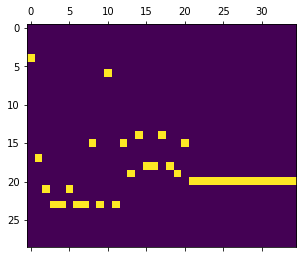

In [0]:
def vectorize(smiles):
        one_hot =  np.zeros((smiles.shape[0], embed , len(charset)),dtype=np.int8)
        for i,smile in enumerate(smiles):
            #encode the startchar
            one_hot[i,0,char_to_int["!"]] = 1
            #encode the rest of the chars
            for j,c in enumerate(smile):
                one_hot[i,j+1,char_to_int[c]] = 1
            #Encode endchar
            one_hot[i,len(smile)+1:,char_to_int["E"]] = 1
        #Return two, one for input and the other for output
        return one_hot[:,0:-1,:], one_hot[:,1:,:]
X_train, Y_train = vectorize(smiles_train.values)
X_test,Y_test = vectorize(smiles_test.values)
print (smiles_train.iloc[0])
plt.matshow(X_train[0].T)
#print X_train.shape

In [0]:
"".join([int_to_char[idx] for idx in np.argmax(X_train[0,:,:], axis=1)])

'!N#CC#CC1COC1\t43343\t1EEEEEEEEEEEEEE'

In [0]:
#Import Keras objects
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Concatenate
from tensorflow.keras import regularizers
input_shape = X_train.shape[1:]
output_dim = Y_train.shape[-1]
latent_dim = 64
lstm_dim = 64

In [0]:
unroll = False
encoder_inputs = Input(shape=input_shape)
encoder = LSTM(lstm_dim, return_state=True,
                unroll=unroll)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)
states = Concatenate(axis=-1)([state_h, state_c])
neck = Dense(latent_dim, activation="relu")
neck_outputs = neck(states)
import warnings
 
warnings.filterwarnings("ignore")


In [0]:
decode_h = Dense(lstm_dim, activation="relu")
decode_c = Dense(lstm_dim, activation="relu")
state_h_decoded =  decode_h(neck_outputs)
state_c_decoded =  decode_c(neck_outputs)
encoder_states = [state_h_decoded, state_c_decoded]
decoder_inputs = Input(shape=input_shape)
decoder_lstm = LSTM(lstm_dim,
                    return_sequences=True,
                    unroll=unroll
                   )
decoder_outputs = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = Dense(output_dim, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)
#Define the model, that inputs the training vector for two places, and predicts one character ahead of the input
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
print (model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 35, 29)]     0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 64), (None,  24064       input_1[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 128)          0           lstm[0][1]                       
                                                                 lstm[0][2]                       
__________________________________________________________________________________________________
dense (Dense)                   (None, 64)           8256        concatenate[0][0]            

In [0]:
from tensorflow.keras.callbacks import History, ReduceLROnPlateau
h = History()
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,patience=10, min_lr=0.000001, verbose=1, min_delta=1e-5)

In [0]:
from tensorflow.keras.optimizers import RMSprop, Adam
opt=Adam(lr=0.005) #Default 0.001
model.compile(optimizer=opt, loss='categorical_crossentropy')

In [0]:
model.fit([X_train,X_train],Y_train,
                    epochs=100,
                    batch_size=256,
                    shuffle=True,
                    callbacks=[h, rlr],
                    validation_data=[[X_test,X_test],Y_test ])

Train on 50029 samples, validate on 16677 samples
Epoch 1/100
50029/50029 [==============================] - 11s 211us/sample - loss: 1.1512 - val_loss: 0.8452
Epoch 2/100
50029/50029 [==============================] - 2s 50us/sample - loss: 0.8035 - val_loss: 0.7697
Epoch 3/100
50029/50029 [==============================] - 2s 50us/sample - loss: 0.7553 - val_loss: 0.7349
Epoch 4/100
50029/50029 [==============================] - 2s 50us/sample - loss: 0.7186 - val_loss: 0.7124
Epoch 5/100
50029/50029 [==============================] - 2s 49us/sample - loss: 0.6989 - val_loss: 0.6791
Epoch 6/100
50029/50029 [==============================] - 2s 49us/sample - loss: 0.6594 - val_loss: 0.6413
Epoch 7/100
50029/50029 [==============================] - 2s 50us/sample - loss: 0.6285 - val_loss: 0.6235
Epoch 8/100
50029/50029 [==============================] - 2s 49us/sample - loss: 0.5988 - val_loss: 0.5778
Epoch 9/100
50029/50029 [==============================] - 2s 49us/sample - loss: 0.

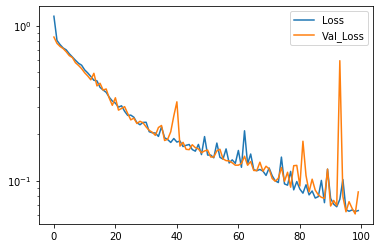

In [0]:
plt.plot(h.history["loss"], label="Loss")
plt.plot(h.history["val_loss"], label="Val_Loss")
plt.yscale("log")
plt.legend()

In [0]:
import tensorflow as tf
for i in range(100):
    v = model.predict([X_test[i:i+1], X_test[i:i+1]]) #Can't be done as output not necessarely 1
    idxs = np.argmax(v, axis=2)
    pred=  "".join([int_to_char[h] for h in idxs[0]])[:-1]
    idxs2 = np.argmax(X_test[i:i+1], axis=2)
    true =  "".join([int_to_char[k] for k in idxs2[0]])[1:]
    if true != pred:
       print(true, pred)

SyntaxError: ignored

In [0]:
smiles_to_latent_model = Model(encoder_inputs, neck_outputs)
smiles_to_latent_model.save("Blog_simple_smi2lat.h5")

In [0]:
latent_input = Input(shape=(latent_dim,))
#reuse_layers
state_h_decoded_2 =  decode_h(latent_input)
state_c_decoded_2 =  decode_c(latent_input)
latent_to_states_model = Model(latent_input, [state_h_decoded_2, state_c_decoded_2])
latent_to_states_model.save("Blog_simple_lat2state.h5")

In [0]:
#Last one is special, we need to change it to stateful, and change the input shape
inf_decoder_inputs = Input(batch_shape=(1, 1, input_shape[1]))
inf_decoder_lstm = LSTM(lstm_dim,
                    return_sequences=True,
                    unroll=unroll,
                    stateful=True
                   )
inf_decoder_outputs = inf_decoder_lstm(inf_decoder_inputs)
inf_decoder_dense = Dense(output_dim, activation='softmax')
inf_decoder_outputs = inf_decoder_dense(inf_decoder_outputs)
sample_model = Model(inf_decoder_inputs, inf_decoder_outputs)

In [0]:
#Transfer Weights
for i in range(1,3):
    sample_model.layers[i].set_weights(model.layers[i+6].get_weights())
sample_model.save("Blog_simple_samplemodel.h5")


In [0]:
sample_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(1, 1, 17)]              0         
_________________________________________________________________
lstm_3 (LSTM)                (1, 1, 64)                20992     
_________________________________________________________________
dense_5 (Dense)              (1, 1, 17)                1105      
Total params: 22,097
Trainable params: 22,097
Non-trainable params: 0
_________________________________________________________________


In [0]:
x_latent = smiles_to_latent_model.predict(X_test)

[     5  83759   8115 190493 190444  20852 193664 118169 185088 201303]
296580    C1CCCC2CC3CC4(CCC(CC4)C3CCC1)C2
325552    C1CCCC2CCC3(C4CCC3CC4)C(CCC1)C2
319916    C1CCCC2CC3CC4(CCCC(C4)C3CCC1)C2
287245    C1CCCC2CC3(CCCC4(CC4)C3)CCC2CC1
283227    C1CCCC2CCC3CC4(CC4)C(CCC1)CC3C2
305052    C1CCCC2CCC3C4(CCC4)CCC3(CCC1)C2
257374    C1CCCC2CC3(CCC4CC(C4)C3)CC2CCC1
286365    C1CCCC2CC3(CCCC4(CC4)CC3CCC1)C2
Name: smiles, dtype: object


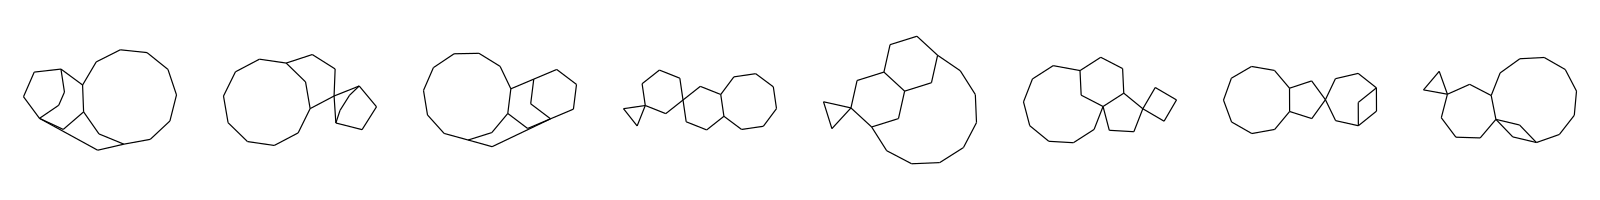

In [0]:
molno = 5
latent_mol = smiles_to_latent_model.predict(X_test[molno:molno+1])
sorti = np.argsort(np.sum(np.abs(x_latent - latent_mol), axis=1))
print(sorti[0:10])
print(smiles_test.iloc[sorti[0:8]])
Draw.MolsToImage(smiles_test.iloc[sorti[0:8]].apply(Chem.MolFromSmiles))


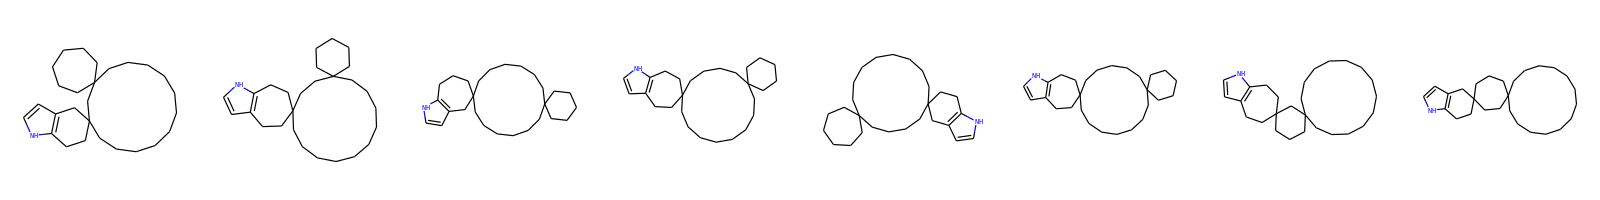

In [0]:
Draw.MolsToImage(smiles_test.iloc[sorti[-8:]].apply(Chem.MolFromSmiles))

In [0]:
logp = smiles_test.apply(Chem.MolFromSmiles).apply(Descriptors.MolLogP)

[0.53600813 0.19645709] 0.7324652187289207


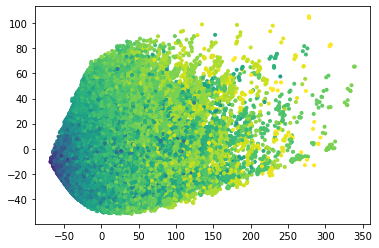

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
red = pca.fit_transform(x_latent)
plt.figure()
plt.scatter(red[:,0], red[:,1],marker='.', c= logp)
print(pca.explained_variance_ratio_, np.sum(pca.explained_variance_ratio_))

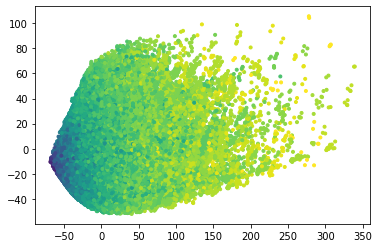

In [0]:
molwt = smiles_test.apply(Chem.MolFromSmiles).apply(Descriptors.MolMR)
plt.figure()
plt.scatter(red[:,0], red[:,1],marker='.', c= molwt)

In [0]:
#Model LogP?
x_train_latent = smiles_to_latent_model.predict(X_train)
logp_train = smiles_train.apply(Chem.MolFromSmiles).apply(Descriptors.MolLogP)

In [0]:
from tensorflow.keras.models import Sequential
logp_model = Sequential()
logp_model.add(Dense(128, input_shape=(latent_dim,), activation="relu"))
logp_model.add(Dense(128, activation="relu"))
logp_model.add(Dense(1))
logp_model.compile(optimizer="adam", loss="mse")

In [0]:
rlr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,patience=10, min_lr=0.000001, verbose=1, min_delta=1e-5)
logp_model.fit(x_train_latent, logp_train, batch_size=128, epochs=5, callbacks = [rlr])

Train on 687097 samples
Epoch 1/5
687097/687097 [==============================] - 13s 18us/sample - loss: 0.0645
Epoch 2/5
687097/687097 [==============================] - 13s 18us/sample - loss: 0.0577
Epoch 3/5
687097/687097 [==============================] - 12s 18us/sample - loss: 0.0530
Epoch 4/5
687097/687097 [==============================] - 13s 18us/sample - loss: 0.0500
Epoch 5/5
687097/687097 [==============================] - 13s 19us/sample - loss: 0.0478


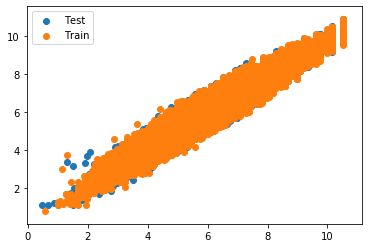

In [0]:
logp_pred_train = logp_model.predict(x_train_latent)
logp_pred_test = logp_model.predict(x_latent)
plt.scatter(logp, logp_pred_test, label="Test")
plt.scatter(logp_train, logp_pred_train, label="Train")
plt.legend()

In [0]:
def latent_to_smiles(latent):
    #decode states and set Reset the LSTM cells with them
    states = latent_to_states_model.predict(latent)
    sample_model.layers[1].reset_states(states=[states[0],states[1]])
    #Prepare the input char
    startidx = char_to_int["!"]
    samplevec = np.zeros((1,1,17))
    samplevec[0,0,startidx] = 1
    smiles = ""
    #Loop and predict next char
    for i in range(28):
        o = sample_model.predict(samplevec)
        sampleidx = np.argmax(o)
        samplechar = int_to_char[sampleidx]
        if samplechar != "E":
            smiles = smiles + int_to_char[sampleidx]
            samplevec = np.zeros((1,1,17))
            samplevec[0,0,sampleidx] = 1
        else:
            break
    return smiles

In [0]:
smiles = latent_to_smiles(x_latent[0:1])
print(smiles)
print(smiles_test.iloc[0])

C1CCCC2(CCCC3(CC1)CCCC3)CC1C
C1CCCc2c([nH]c3c2CCCCC32CCCCC2)CC1


In [0]:
wrong = 0
for i in range(1000):
    smiles = latent_to_smiles(x_latent[i:i+1])
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        pass
    else:
        print(smiles)
        wrong = wrong + 1
print ("%0.1F percent wrongly formatted smiles"%(wrong/float(1000)*100))

RDKit ERROR: [13:53:51] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC3(CC1)CCCC3)CC1C'
RDKit ERROR: [13:53:51] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC23CC(CCCC1)C2CCC31CC'
RDKit ERROR: [13:53:51] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCCCCCCCCC1CC3(CC'


C1CCCC2(CCCC3(CC1)CCCC3)CC1C
C1CCCCCC23CC(CCCC1)C2CCC31CC
c1ccc2c(c1)CCCCCCCCCC1CC3(CC


RDKit ERROR: [13:53:51] SMILES Parse Error: extra open parentheses for input: 'C1CCCC2(CCCCC2)CCCCCCC3(CCCC'
RDKit ERROR: [13:53:51] SMILES Parse Error: unclosed ring for input: 'C1CCC23CCCC(CC2CC1)C(CC3)C1'
RDKit ERROR: [13:53:51] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC3CC(C4CCC(C4)C3)C2C'
RDKit ERROR: [13:53:51] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CCCC3CCC2C2(CCCC1)CC'


C1CCCC2(CCCCC2)CCCCCCC3(CCCC
C1CCC23CCCC(CC2CC1)C(CC3)C1
C1CCCC2CC3CC(C4CCC(C4)C3)C2C
C1CCCCC2CCCC3CCC2C2(CCCC1)CC

RDKit ERROR: [13:53:52] SMILES Parse Error: unclosed ring for input: 'C1CCC23CC(C1)CCCCC2C1CCC3'
RDKit ERROR: [13:53:52] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCC3(CCCCC3)CC(CCC1)C'
RDKit ERROR: [13:53:52] SMILES Parse Error: unclosed ring for input: 'C1CC2CC1CC1CCCCC23CC1'
RDKit ERROR: [13:53:52] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC2CCC(CCCC1)C13CCCC(C2'



C1CCC23CC(C1)CCCCC2C1CCC3
C1CCCC2CCC3(CCCCC3)CC(CCC1)C
C1CC2CC1CC1CCCCC23CC1
C1CCCCC2CCC(CCCC1)C13CCCC(C2


RDKit ERROR: [13:53:52] SMILES Parse Error: unclosed ring for input: 'C1CCC2CC3CCC(C3)C2CCCCC2CC1'
RDKit ERROR: [13:53:52] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCCCCCCC13CCCC(CC'
RDKit ERROR: [13:53:52] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC(CC1)CC1CCCCC2C2CC1'
RDKit ERROR: [13:53:52] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC2)CC2CCC3CC(CC1)'


C1CCC2CC3CCC(C3)C2CCCCC2CC1
c1ccc2c(c1)CCCCCCCC13CCCC(CC
C1CCCC2CC(CC1)CC1CCCCC2C2CC1
C1CCCC2(CCCC2)CC2CCC3CC(CC1)


RDKit ERROR: [13:53:52] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CCCC2)CC2(CCCC2)CCC2C'
RDKit ERROR: [13:53:52] SMILES Parse Error: extra open parentheses for input: 'C1CC2CCC(CCCC3(CCC3)C3(C1)CC'
RDKit ERROR: [13:53:52] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCC2CC2(CCCCC2)C2CCCC'
RDKit ERROR: [13:53:52] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CCC1CCCCCCC3CCC'


C1CCC2(CCCC2)CC2(CCCC2)CCC2C
C1CC2CCC(CCCC3(CCC3)C3(C1)CC
C1CCCC2CCC2CC2(CCCCC2)C2CCCC
c1cc2c([nH]1)CCC1CCCCCCC3CCC


RDKit ERROR: [13:53:52] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC2(CCCC1)CCC1CC3CCC(CC'
RDKit ERROR: [13:53:52] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC2CCCC3CC(CC4CC4)C(CCC'
RDKit ERROR: [13:53:52] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2CCC3CCC4CCCC(CCCC1)'
RDKit ERROR: [13:53:53] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCCC1CCCCC23CC1'


C1CCCCC2(CCCC1)CCC1CC3CCC(CC
C1CCCCC2CCCC3CC(CC4CC4)C(CCC
C1CCCCCC2CCC3CCC4CCCC(CCCC1)
c1ccc2c(c1)CCCC1CCCCC23CC1


RDKit ERROR: [13:53:53] SMILES Parse Error: extra open parentheses for input: 'C1CCCCCC2C3CCCC(CC3)C3(CCCCC'
RDKit ERROR: [13:53:53] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CCCCC1CCCC1CC21'
RDKit ERROR: [13:53:53] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC2(CCCC1)CCCC1(CCC3CCC'


C1CCCCCC2C3CCCC(CC3)C3(CCCCC
c1cc2c([nH]1)CCCCC1CCCC1CC21
C1CCCCC2(CCCC1)CCCC1(CCC3CCC


RDKit ERROR: [13:53:53] SMILES Parse Error: extra open parentheses for input: 'C1CCC2(CC1)CC1CC3CCC(CCCCC2C'
RDKit ERROR: [13:53:53] SMILES Parse Error: extra open parentheses for input: 'C1CCC2(CCCCC3CCC4(CC1)CCC3C4'
RDKit ERROR: [13:53:53] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCC1CCCCCC3CCCC2C'
RDKit ERROR: [13:53:53] SMILES Parse Error: extra open parentheses for input: 'c1cc2c([nH]1)CCC1CCC3(CCCCCC'


C1CCC2(CC1)CC1CC3CCC(CCCCC2C
C1CCC2(CCCCC3CCC4(CC1)CCC3C4
c1ccc2c(c1)CCC1CCCCCC3CCCC2C
c1cc2c([nH]1)CCC1CCC3(CCCCCC


RDKit ERROR: [13:53:53] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCC3(CCCC3)CC3(CCCC3)C'
RDKit ERROR: [13:53:53] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC(CCCC2)CC2(CCCCCC2)'
RDKit ERROR: [13:53:53] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2(CCCCC2)C2CC(CCC1)CC'
RDKit ERROR: [13:53:53] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCC3C(CCC1)CCCCCC3C1C'


C1CCC2CCC3(CCCC3)CC3(CCCC3)C
C1CCCC2CC(CCCC2)CC2(CCCCCC2)
C1CCCCC2(CCCCC2)C2CC(CCC1)CC
C1CCCC2CCC3C(CCC1)CCCCCC3C1C


RDKit ERROR: [13:53:53] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2(CCC3(CCC1)CC3)CCC1C'
RDKit ERROR: [13:53:53] SMILES Parse Error: extra open parentheses for input: 'c1cc2c([nH]1)CCCC1(CCCCCCCC3'
RDKit ERROR: [13:53:54] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCC1CC(CCCCC3(CCC'
RDKit ERROR: [13:53:54] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCC3(CCCCC3)CC2CCCCCC2'


C1CCCCC2(CCC3(CCC1)CC3)CCC1C
c1cc2c([nH]1)CCCC1(CCCCCCCC3
c1ccc2c(c1)CCC1CC(CCCCC3(CCC
C1CCC2CCC3(CCCCC3)CC2CCCCCC2


RDKit ERROR: [13:53:54] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC3(CCCC4(CCC1)CCCC4)'
RDKit ERROR: [13:53:54] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CC1CCCC3CCCCCCC'
RDKit ERROR: [13:53:54] SMILES Parse Error: extra open parentheses for input: 'c1cc2c([nH]1)CCC1CCCCC(CCCCC'
RDKit ERROR: [13:53:54] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC3(CCC1)CCCC3C1CCCC2'


C1CCCC2CC3(CCCC4(CCC1)CCCC4)
c1cc2c([nH]1)CC1CCCC3CCCCCCC
c1cc2c([nH]1)CCC1CCCCC(CCCCC
C1CCCC2CC3(CCC1)CCCC3C1CCCC2


RDKit ERROR: [13:53:54] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCCC3(CC1)CCCCC2C1CC3'
RDKit ERROR: [13:53:54] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCCCCC23CCCC(CC1)C1CC'
RDKit ERROR: [13:53:54] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCC(C2)CC2CCC(CC1)CC1'
RDKit ERROR: [13:53:54] SMILES Parse Error: extra open parentheses for input: 'C1CCCCCC23CCCC(C4CCC4)C(CCCC'


C1CCC2CCCCC3(CC1)CCCCC2C1CC3
C1CCCC2CCCCCC23CCCC(CC1)C1CC
C1CCC2CCCC(C2)CC2CCC(CC1)CC1
C1CCCCCC23CCCC(C4CCC4)C(CCCC


RDKit ERROR: [13:53:54] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCCCC3CCCC(CCC1)CC3CC'
RDKit ERROR: [13:53:54] SMILES Parse Error: unclosed ring for input: 'C1CCCC2C3CCCCC2(CCC1)CCCC31C'
RDKit ERROR: [13:53:54] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2C3CCCC4CCCC3C(C4)C2C'


C1CCCC2CCCCC3CCCC(CCC1)CC3CC
C1CCCC2C3CCCCC2(CCC1)CCCC31C
C1CCCCC2C3CCCC4CCCC3C(C4)C2C


RDKit ERROR: [13:53:54] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CCC1CC(C1)CC1CC'
RDKit ERROR: [13:53:55] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC(CCC3CCCC3C2)C2CC2C'
RDKit ERROR: [13:53:55] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC23CCC4(CCCC1)CCC4C2C'
RDKit ERROR: [13:53:55] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CCCC2)CCC2(CCCC2)CCC2'


c1cc2c([nH]1)CCC1CC(C1)CC1CC
C1CCCC2CC(CCC3CCCC3C2)C2CC2C
C1CCCCCC23CCC4(CCCC1)CCC4C2C
C1CCC2(CCCC2)CCC2(CCCC2)CCC2


RDKit ERROR: [13:53:55] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCCCCCCC1(CCC1)CC'
RDKit ERROR: [13:53:55] SMILES Parse Error: extra open parentheses for input: 'c1cc2c([nH]1)CC1(CCCCCCCCC3C'
RDKit ERROR: [13:53:55] SMILES Parse Error: extra open parentheses for input: 'c1cc2c3c(cccc3c1)C1(CCCCCCCC'


c1ccc2c(c1)CCCCCCCC1(CCC1)CC
c1cc2c([nH]1)CC1(CCCCCCCCC3C
c1cc2c3c(cccc3c1)C1(CCCCCCCC


RDKit ERROR: [13:53:55] SMILES Parse Error: unclosed ring for input: 'C1CCCC23CCCC4CCCC(CCC2C4)C3C'
RDKit ERROR: [13:53:55] SMILES Parse Error: syntax error while parsing: C1CCC2CC(C1)CCCC1CCC(CC1)C1(
RDKit ERROR: [13:53:55] SMILES Parse Error: Failed parsing SMILES 'C1CCC2CC(C1)CCCC1CCC(CC1)C1(' for input: 'C1CCC2CC(C1)CCCC1CCC(CC1)C1('
RDKit ERROR: [13:53:55] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CCCC3CCC4(CCCCC1)CCC'
RDKit ERROR: [13:53:55] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCCCCC2CC2CC(CCC1)CCC'


C1CCCC23CCCC4CCCC(CCC2C4)C3C
C1CCC2CC(C1)CCCC1CCC(CC1)C1(
C1CCCCC2CCCC3CCC4(CCCCC1)CCC
C1CCCC2CCCCCC2CC2CC(CCC1)CCC


RDKit ERROR: [13:53:55] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCC1)CCCCCC1(CCC1)CC'
RDKit ERROR: [13:53:55] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CC(CCCC1)CC1CC3CCCCC'
RDKit ERROR: [13:53:55] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2C3CC(CC4CCCC4CCCC1)C'
RDKit ERROR: [13:53:55] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCC3CCC(CC3)C3CCCCC3CC'


C1CCCC2(CCC1)CCCCCC1(CCC1)CC
C1CCCCC2CC(CCCC1)CC1CC3CCCCC
C1CCCCC2C3CC(CC4CCCC4CCCC1)C
C1CCC2CCC3CCC(CC3)C3CCCCC3CC


RDKit ERROR: [13:53:55] SMILES Parse Error: extra open parentheses for input: 'C1CCC2CCCC3CCC3(CCC3CCCC3CC1'
RDKit ERROR: [13:53:56] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCC3CC(C3)C2CC2CCC2CC'
RDKit ERROR: [13:53:56] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCC3CCCC4CCC(CCCC4C1)'
RDKit ERROR: [13:53:56] SMILES Parse Error: extra open parentheses for input: 'c1cc2c([nH]1)CCC1CCCC(CCCCCC'


C1CCC2CCCC3CCC3(CCC3CCCC3CC1
C1CCCC2CCC3CC(C3)C2CC2CCC2CC
C1CCC2CCCC3CCCC4CCC(CCCC4C1)
c1cc2c([nH]1)CCC1CCCC(CCCCCC


RDKit ERROR: [13:53:56] SMILES Parse Error: extra close parentheses while parsing: C1CCCC2C3CCCC(C3)C3(CCC1)C3)
RDKit ERROR: [13:53:56] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: no atoms
RDKit ERROR: Violation occurred on line 173 in file /home/conda/feedstock_root/build_artifacts/rdkit_1575460121790/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: getNumAtoms() > 0
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [13:53:56] SMILES Parse Error: unclosed ring for input: 'C1CCC2C3CCCCC2CCCC(CCCC32)CC'
RDKit ERROR: [13:53:56] SMILES Parse Error: extra open parentheses for input: 'C1CCCC2CCCC3CCCCCC3CCC2(CCCC'


C1CCCC2C3CCCC(C3)C3(CCC1)C3)
C1CCC2C3CCCCC2CCCC(CCCC32)CC
C1CCCC2CCCC3CCCCCC3CCC2(CCCC


RDKit ERROR: [13:53:56] SMILES Parse Error: ring closure 3 duplicates bond between atom 5 and atom 17 for input: 'C1CCCCC23CCCC4CC(CCC1)CC4C23'
RDKit ERROR: [13:53:56] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCC(CC2)C2CCC(CC1)CCCC'
RDKit ERROR: [13:53:56] SMILES Parse Error: extra open parentheses for input: 'C1CCCC2CC(CCC1)CC1CC3CCC(CC3'
RDKit ERROR: [13:53:56] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCCC1(CCCCCCC23CC'


C1CCCCC23CCCC4CC(CCC1)CC4C23
C1CCC2CCC(CC2)C2CCC(CC1)CCCC
C1CCCC2CC(CCC1)CC1CC3CCC(CC3
c1ccc2c(c1)CCCC1(CCCCCCC23CC


RDKit ERROR: [13:53:56] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC3CCCCC(CCC1)C3CCC21'
RDKit ERROR: [13:53:56] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2(CCCCC3(CCC1)CC3)CCC'
RDKit ERROR: [13:53:56] SMILES Parse Error: unclosed ring for input: 'C1CCCCCCC2(CCCCCC1)CCC1C3CCC'


C1CCCC2CC3CCCCC(CCC1)C3CCC21
C1CCCCC2(CCCCC3(CCC1)CC3)CCC
C1CCCCCCC2(CCCCCC1)CCC1C3CCC


RDKit ERROR: [13:53:57] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2C(CCCC1)CCC1CCCCCC2'
RDKit ERROR: [13:53:57] SMILES Parse Error: unclosed ring for input: 'C1CC2C3CCC4CCCC(C4)C2C1'
RDKit ERROR: [13:53:57] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCCC3CCCCC3CC2CC2CCCC'
RDKit ERROR: [13:53:57] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCCC3CC4CCC(CC3C4CC1)'


C1CCCCCC2C(CCCC1)CCC1CCCCCC2
C1CC2C3CCC4CCCC(C4)C2C1
C1CCCC2CCCC3CCCCC3CC2CC2CCCC
C1CCC2CCCCC3CC4CCC(CC3C4CC1)


RDKit ERROR: [13:53:57] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC(C2)C2C3CCCC(CCC1)C'
RDKit ERROR: [13:53:57] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC3CC(CCC1)C3C1CCCC2C'
RDKit ERROR: [13:53:57] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CCCC3(CCCCC3)CC2CCCC'
RDKit ERROR: [13:53:57] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCC3(CCC4CC3CCC4CC1)C'


C1CCCC2CC(C2)C2C3CCCC(CCC1)C
C1CCCC2CC3CC(CCC1)C3C1CCCC2C
C1CCCCC2CCCC3(CCCCC3)CC2CCCC
C1CCC2CCCC3(CCC4CC3CCC4CC1)C


RDKit ERROR: [13:53:57] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2CCCCC3(CCCC1)CCCC3C'
RDKit ERROR: [13:53:57] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CC1)CCCCC1CCCCC1CCCC1'
RDKit ERROR: [13:53:57] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)C1CCCCCCC3CCCCC'


C1CCCCCC2CCCCC3(CCCC1)CCCC3C
C1CCC2(CC1)CCCCC1CCCCC1CCCC1
c1cc2c([nH]1)C1CCCCCCC3CCCCC


RDKit ERROR: [13:53:57] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2CC3CC(CCCC1)C2CCCC1'
RDKit ERROR: [13:53:57] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2(CCC3CCCCC(CCC1)C3)'
RDKit ERROR: [13:53:57] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCCCC2)CCCC2(CCC1)C'


C1CCCCCC2CC3CC(CCCC1)C2CCCC1
C1CCCCCC2(CCC3CCCCC(CCC1)C3)
C1CCCC2(CCCCCC2)CCCC2(CCC1)C


RDKit ERROR: [13:53:58] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCCC13CCCCCCCCCCC'
RDKit ERROR: [13:53:58] SMILES Parse Error: extra open parentheses for input: 'C1CCC2(CC1)CCC1(CCCC3(CC3)CC'
RDKit ERROR: [13:53:58] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2CC3CC(CCCC1)CCCCCC1'
RDKit ERROR: [13:53:58] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCC3CC(CC1)CCCC1CCCC23'


c1ccc2c(c1)CCCC13CCCCCCCCCCC
C1CCC2(CC1)CCC1(CCCC3(CC3)CC
C1CCCCCC2CC3CC(CCCC1)CCCCCC1
C1CCC2CCC3CC(CC1)CCCC1CCCC23


RDKit ERROR: [13:53:58] SMILES Parse Error: extra open parentheses for input: 'C1CCCC2(CCC1)CCCC1CCCC3(CCC3'
RDKit ERROR: [13:53:58] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC(CC1)CCCCC1CCC(CC1)'
RDKit ERROR: [13:53:58] SMILES Parse Error: unclosed ring for input: 'C1CCCCCCC2C(CCCCC1)CCCC1CCCC'
RDKit ERROR: [13:53:58] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCC3CCC3CC1)CCC1CCC2'


C1CCCC2(CCC1)CCCC1CCCC3(CCC3
C1CCCC2CC(CC1)CCCCC1CCC(CC1)
C1CCCCCCC2C(CCCCC1)CCCC1CCCC
C1CCCC2(CCC3CCC3CC1)CCC1CCC2


RDKit ERROR: [13:53:58] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC3(CCCCC3)CC2C2CCC2C'
RDKit ERROR: [13:53:58] SMILES Parse Error: extra open parentheses for input: 'C1CCCCCC2C3(CCCCC1)CCCCCC3(C'
RDKit ERROR: [13:53:58] SMILES Parse Error: unclosed ring for input: 'C1CCC2CC(C1)CCC13CCCCCCCC1C2'
RDKit ERROR: [13:53:58] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CC1CCC(CC1)CCC1'


C1CCCC2CC3(CCCCC3)CC2C2CCC2C
C1CCCCCC2C3(CCCCC1)CCCCCC3(C
C1CCC2CC(C1)CCC13CCCCCCCC1C2
c1cc2c([nH]1)CC1CCC(CC1)CCC1


RDKit ERROR: [13:53:58] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCCCC1(CCCCC1)CCC'
RDKit ERROR: [13:53:58] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCCC3CC4(CCCC4)CC2C3C'
RDKit ERROR: [13:53:59] SMILES Parse Error: unclosed ring for input: 'C1CCC2CC3CC(CC2C3)CCC2CCCC2C'
RDKit ERROR: [13:53:59] SMILES Parse Error: extra open parentheses for input: 'C1CCC2(CC1)CCCC1(CCCC3CCCCCC'


c1ccc2c(c1)CCCCC1(CCCCC1)CCC
C1CCCC2CCCC3CC4(CCCC4)CC2C3C
C1CCC2CC3CC(CC2C3)CCC2CCCC2C
C1CCC2(CC1)CCCC1(CCCC3CCCCCC


RDKit ERROR: [13:53:59] SMILES Parse Error: unclosed ring for input: 'c1cc2c3c(c1)C1CCCCCCCCCCCC21'
RDKit ERROR: [13:53:59] SMILES Parse Error: unclosed ring for input: 'C1CCC23CCC(CC2CC1)C(CCC3)CC1'
RDKit ERROR: [13:53:59] SMILES Parse Error: extra open parentheses for input: 'C1CCCCCC2CC(CCCC1)CCC1CCC(C1'
RDKit ERROR: [13:53:59] SMILES Parse Error: extra open parentheses for input: 'C1CCC2CC3CCCC(CCCC4CCC(C1)C4'


c1cc2c3c(c1)C1CCCCCCCCCCCC21
C1CCC23CCC(CC2CC1)C(CCC3)CC1
C1CCCCCC2CC(CCCC1)CCC1CCC(C1
C1CCC2CC3CCCC(CCCC4CCC(C1)C4


RDKit ERROR: [13:53:59] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CC1)CCCCCC1CC3CCCCCC2'
RDKit ERROR: [13:53:59] SMILES Parse Error: unclosed ring for input: 'c1[nH]c2c3c1CC1CCCCCCCC2C3'
RDKit ERROR: [13:53:59] SMILES Parse Error: extra open parentheses for input: 'C1CC2CCC(CCCCC3(CCCC3)CC3CC3'
RDKit ERROR: [13:53:59] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CC1CCCCCCCCC3CCCC'


C1CCC2(CC1)CCCCCC1CC3CCCCCC2
c1[nH]c2c3c1CC1CCCCCCCC2C3
C1CC2CCC(CCCCC3(CCCC3)CC3CC3
c1ccc2c(c1)CC1CCCCCCCCC3CCCC


RDKit ERROR: [13:53:59] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCC3(CCCC4(CCCC4)C3)CC'
RDKit ERROR: [13:53:59] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CCC3(CCC3)C3(CCCC1)C'
RDKit ERROR: [13:53:59] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2(CCCCC3(CCC1)CCC3)CC'
RDKit ERROR: [13:53:59] SMILES Parse Error: unclosed ring for input: 'C1CCCC23CCCCCC2CCCCC3C2CCCC2'


C1CCC2CCC3(CCCC4(CCCC4)C3)CC
C1CCCCC2CCC3(CCC3)C3(CCCC1)C
C1CCCCC2(CCCCC3(CCC1)CCC3)CC
C1CCCC23CCCCCC2CCCCC3C2CCCC2


RDKit ERROR: [13:53:59] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCC(CC1)C1CCCCCC23CCC'
RDKit ERROR: [13:54:00] SMILES Parse Error: unclosed ring for input: 'C1CCCCCCC2CC3(CCCCC1)CCCCC3C'
RDKit ERROR: [13:54:00] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCCCCC1CCCCC1CCCC'


C1CCC2CCCC(CC1)C1CCCCCC23CCC
C1CCCCCCC2CC3(CCCCC1)CCCCC3C
c1ccc2c(c1)CCCCCC1CCCCC1CCCC


RDKit ERROR: [13:54:00] SMILES Parse Error: unclosed ring for input: 'C1CCCCC23CCC(CCC1)C2CCCC31CC'
RDKit ERROR: [13:54:00] SMILES Parse Error: extra open parentheses for input: 'C1CCCC2(CCCCC2)CC2(CCC3CCCC3'
RDKit ERROR: [13:54:00] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC2(CCCCCC2)CC2(CCCCCCC'
RDKit ERROR: [13:54:00] SMILES Parse Error: unclosed ring for input: 'C1CCC2CC3CCCC(CCC2C3)C2CCCC2'


C1CCCCC23CCC(CCC1)C2CCCC31CC
C1CCCC2(CCCCC2)CC2(CCC3CCCC3
C1CCCCC2(CCCCCC2)CC2(CCCCCCC
C1CCC2CC3CCCC(CCC2C3)C2CCCC2


RDKit ERROR: [13:54:00] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2CCC3(CCCCC3)CCCC2C2'
RDKit ERROR: [13:54:00] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCC1(CCCCCC3CCCCC'
RDKit ERROR: [13:54:00] SMILES Parse Error: unclosed ring for input: 'C1CCCCC23CCC(CCC1)CC1(CCCC1)'


C1CCCCCC2CCC3(CCCCC3)CCCC2C2
c1ccc2c(c1)CCC1(CCCCCC3CCCCC
C1CCCCC23CCC(CCC1)CC1(CCCC1)


RDKit ERROR: [13:54:00] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCCCCC1CCCCC1CCCC'
RDKit ERROR: [13:54:00] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)C1CCCCCCCCCCCC2'
RDKit ERROR: [13:54:00] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CCCC3C(CCCC1)CCCCCC2'
RDKit ERROR: [13:54:00] SMILES Parse Error: extra open parentheses for input: 'C1CCCC2(CCCC2)C2CCCCC2C2(CCC'


c1ccc2c(c1)CCCCCC1CCCCC1CCCC
c1cc2c([nH]1)C1CCCCCCCCCCCC2
C1CCCCC2CCCC3C(CCCC1)CCCCCC2
C1CCCC2(CCCC2)C2CCCCC2C2(CCC


RDKit ERROR: [13:54:01] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCC1)CCCCC1CCCCC1CCC'
RDKit ERROR: [13:54:01] SMILES Parse Error: unclosed ring for input: 'C1CCCC23CCCCCC4(CCCCC2CC1)CC'
RDKit ERROR: [13:54:01] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCC1)CCCCC1CCCCC1CCC'


C1CCCC2(CCC1)CCCCC1CCCCC1CCC
C1CCCC23CCCCCC4(CCCCC2CC1)CC
C1CCCC2(CCC1)CCCCC1CCCCC1CCC


RDKit ERROR: [13:54:01] SMILES Parse Error: extra open parentheses for input: 'c1cc2c([nH]1)CCCC1(CCCCCC3CC'
RDKit ERROR: [13:54:01] SMILES Parse Error: extra open parentheses for input: 'C1CCC23CCCC(CC4CC4)C(CCC2CC1'


c1cc2c([nH]1)CCCC1(CCCCCC3CC
C1CCC23CCCC(CC4CC4)C(CCC2CC1


RDKit ERROR: [13:54:01] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCC3(CCC1)CCCCCC3C1CC'
RDKit ERROR: [13:54:01] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCCC3(CC1)CCCC3)CCC'
RDKit ERROR: [13:54:01] SMILES Parse Error: unclosed ring for input: 'C1CCC2CC3(CCCCC4CCCC(CC1)C4)'
RDKit ERROR: [13:54:01] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC2CC3(CCCCC3)C3CC(CCC1'


C1CCCC2CCC3(CCC1)CCCCCC3C1CC
C1CCCC2(CCCCC3(CC1)CCCC3)CCC
C1CCC2CC3(CCCCC4CCCC(CC1)C4)
C1CCCCC2CC3(CCCCC3)C3CC(CCC1


RDKit ERROR: [13:54:01] SMILES Parse Error: unclosed ring for input: 'C1CC2CC(CCCC3(C1)CCC3)CCCC1C'
RDKit ERROR: [13:54:01] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCCC3CC(CC1)CCCC2C1CC'
RDKit ERROR: [13:54:02] SMILES Parse Error: unclosed ring for input: 'C1CC2CCC(C1)CC1CCCCCC1CCCC1C'


C1CC2CC(CCCC3(C1)CCC3)CCCC1C
C1CCC2CCCCC3CC(CC1)CCCC2C1CC
C1CC2CCC(C1)CC1CCCCCC1CCCC1C


RDKit ERROR: [13:54:02] SMILES Parse Error: syntax error while parsing: c1ccc2c(c1)CCCCCCCCC1CCCCC3(
RDKit ERROR: [13:54:02] SMILES Parse Error: Failed parsing SMILES 'c1ccc2c(c1)CCCCCCCCC1CCCCC3(' for input: 'c1ccc2c(c1)CCCCCCCCC1CCCCC3('
RDKit ERROR: [13:54:02] SMILES Parse Error: unclosed ring for input: 'C1CC2CCCC3(CC3)C3CCC3C1'
RDKit ERROR: [13:54:02] SMILES Parse Error: unclosed ring for input: 'c1cc2c3c(cccc3c1)C1(CCCCC1)C'


c1ccc2c(c1)CCCCCCCCC1CCCCC3(
C1CC2CCCC3(CC3)C3CCC3C1
c1cc2c3c(cccc3c1)C1(CCCCC1)C


RDKit ERROR: [13:54:02] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC23CCC(CCC1)CCCCCC1(CC'
RDKit ERROR: [13:54:02] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c3c(ccc2c1)CCCCCCCC1(C'
RDKit ERROR: [13:54:02] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCC3CCC(CCC1)C3CCCC21'
RDKit ERROR: [13:54:02] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCCCC1(CCCC1)CCCC'


C1CCCCC23CCC(CCC1)CCCCCC1(CC
c1ccc2c3c(ccc2c1)CCCCCCCC1(C
C1CCCC2CCC3CCC(CCC1)C3CCCC21
c1ccc2c(c1)CCCCC1(CCCC1)CCCC


RDKit ERROR: [13:54:02] SMILES Parse Error: extra open parentheses for input: 'C1CCC2CCCC3(CCC4(CCCC4)C3CC1'
RDKit ERROR: [13:54:02] SMILES Parse Error: extra open parentheses for input: 'C1CCCCCC2C3(CCCCC1)CCCC3(CCC'
RDKit ERROR: [13:54:02] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCC(CC1)C1CCC2C12'
RDKit ERROR: [13:54:02] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCCC3CC4CC(CC1)CCC4C2'


C1CCC2CCCC3(CCC4(CCCC4)C3CC1
C1CCCCCC2C3(CCCCC1)CCCC3(CCC
C1CCCC2CCC(CC1)C1CCC2C12
C1CCCC2CCCC3CC4CC(CC1)CCC4C2


RDKit ERROR: [13:54:03] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CC1)CCCCC1CCCCC1CCCCC'
RDKit ERROR: [13:54:03] SMILES Parse Error: unclosed ring for input: 'C1CC2CCC3CC(CC3)C3(CCCC3)CC2'
RDKit ERROR: [13:54:03] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCC3(CCC(CC1)C3)CCCC1'


C1CCC2(CC1)CCCCC1CCCCC1CCCCC
C1CC2CCC3CC(CC3)C3(CCCC3)CC2
C1CCC2CCCC3(CCC(CC1)C3)CCCC1


RDKit ERROR: [13:54:03] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CCCC1CCCCCCCC1C'
RDKit ERROR: [13:54:03] SMILES Parse Error: unclosed ring for input: 'c1cc2c(c3c1CCCCCC3)CCCCCCCCC'
RDKit ERROR: [13:54:03] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC3CCCC(CC1)C3)C21'


c1cc2c([nH]1)CCCC1CCCCCCCC1C
c1cc2c(c3c1CCCCCC3)CCCCCCCCC
C1CCCC2(CCCC3CCCC(CC1)C3)C21


RDKit ERROR: [13:54:03] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCC1CCCCCCCCCC3CC'
RDKit ERROR: [13:54:03] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC3CCC4CCCC4C3CC1)'
RDKit ERROR: [13:54:03] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCCC1CCCCC23CC1'
RDKit ERROR: [13:54:03] SMILES Parse Error: extra open parentheses for input: 'c1cc2c([nH]1)CCCCCCCC1CCC(CC'


c1ccc2c(c1)CCC1CCCCCCCCCC3CC
C1CCCC2(CCCC3CCC4CCCC4C3CC1)
c1ccc2c(c1)CCCC1CCCCC23CC1
c1cc2c([nH]1)CCCCCCCC1CCC(CC


RDKit ERROR: [13:54:03] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC23CCC(CCC1)(C3)C21CC'
RDKit ERROR: [13:54:03] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CCC3CCCCC4CCC(CCC1)C'
RDKit ERROR: [13:54:03] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2CCCC3CCCCC2C2CCCCC2'


C1CCCCCC23CCC(CCC1)(C3)C21CC
C1CCCCC2CCC3CCCCC4CCC(CCC1)C
C1CCCCCC2CCCC3CCCCC2C2CCCCC2


RDKit ERROR: [13:54:04] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CC3CCC4CCC(CCCC1)CC4'
RDKit ERROR: [13:54:04] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2(CCCC1)CCC1(CCCC1)CC'
RDKit ERROR: [13:54:04] SMILES Parse Error: extra open parentheses for input: 'c1cc2c([nH]1)CCCCCC1CCC3(CCC'
RDKit ERROR: [13:54:04] SMILES Parse Error: extra open parentheses for input: 'c1[nH]c2c3c1CCCCCC1(CCCCCCCC'


C1CCCCC2CC3CCC4CCC(CCCC1)CC4
C1CCCCC2(CCCC1)CCC1(CCCC1)CC
c1cc2c([nH]1)CCCCCC1CCC3(CCC
c1[nH]c2c3c1CCCCCC1(CCCCCCCC


RDKit ERROR: [13:54:04] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCCCC2CCC23CCCCC2CCC3'
RDKit ERROR: [13:54:04] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCCC2CCCCC3(CCC3)C2CC'
RDKit ERROR: [13:54:04] SMILES Parse Error: extra open parentheses for input: 'C1CCCCCC2C3CCCCCC3CCCC3(CCCC'


C1CCCC2CCCCC2CCC23CCCCC2CCC3
C1CCC2CCCCC2CCCCC3(CCC3)C2CC
C1CCCCCC2C3CCCCCC3CCCC3(CCCC


RDKit ERROR: [13:54:04] SMILES Parse Error: unclosed ring for input: 'C1CCCCCCC2(CCCCCC1)CCCC1CCCC'
RDKit ERROR: [13:54:04] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CCC1CCCC3CCCCCC'
RDKit ERROR: [13:54:04] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)C1CC3CCCCCCCCC2'


C1CCCCCCC2(CCCCCC1)CCCC1CCCC
c1cc2c([nH]1)CCC1CCCC3CCCCCC
c1cc2c([nH]1)C1CC3CCCCCCCCC2


RDKit ERROR: [13:54:04] SMILES Parse Error: unclosed ring for input: 'C1CCC23CCCCC(CCCC24CCC4)CCC3'
RDKit ERROR: [13:54:04] SMILES Parse Error: unclosed ring for input: 'C1CCCCCCC2(CCCCCC1)CCC1CCCC2'
RDKit ERROR: [13:54:05] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCCC3CC2C(CCC1)CCC1CC'
RDKit ERROR: [13:54:05] SMILES Parse Error: extra open parentheses for input: 'C1CCC2CC(C1)CCCC13CCC(CCCCC2'


C1CCC23CCCCC(CCCC24CCC4)CCC3
C1CCCCCCC2(CCCCCC1)CCC1CCCC2
C1CCCC2CCCC3CC2C(CCC1)CCC1CC
C1CCC2CC(C1)CCCC13CCC(CCCCC2


RDKit ERROR: [13:54:05] SMILES Parse Error: unclosed ring for input: 'C1CC2CCC3CCC(CCC3)C2CC2CC1'
RDKit ERROR: [13:54:05] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CC1)CCC1(CCCC3CCC3C1)'
RDKit ERROR: [13:54:05] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2CCC(CCCC1)CC1CCCC1C'
RDKit ERROR: [13:54:05] SMILES Parse Error: unclosed ring for input: 'C1CC2CCCC3CCC4CCC(CCCC2C1)C4'


C1CC2CCC3CCC(CCC3)C2CC2CC1
C1CCC2(CC1)CCC1(CCCC3CCC3C1)
C1CCCCCC2CCC(CCCC1)CC1CCCC1C
C1CC2CCCC3CCC4CCC(CCCC2C1)C4


RDKit ERROR: [13:54:05] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC(CC3CCCC(CC1)C3)CCC'
RDKit ERROR: [13:54:05] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCC3(CCC3)C3CCCC3CC2C'
RDKit ERROR: [13:54:05] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCC1)CCCCC1(CCCC1)CC'
RDKit ERROR: [13:54:05] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CC1CC3CCCCCCCCCCC'


C1CCCC2CC(CC3CCCC(CC1)C3)CCC
C1CCCC2CCC3(CCC3)C3CCCC3CC2C
C1CCCC2(CCC1)CCCCC1(CCCC1)CC
c1ccc2c(c1)CC1CC3CCCCCCCCCCC


RDKit ERROR: [13:54:05] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCC3(CCC3)C3CCCC3CCCC2'
RDKit ERROR: [13:54:05] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CCCCC2CCCC2CC3CCCCCC'
RDKit ERROR: [13:54:05] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCC3CC(CC1)CCCCC1CCC23'
RDKit ERROR: [13:54:05] SMILES Parse Error: extra open parentheses for input: 'C1CCCCCC2(CCCC3CCCC34CCCCCCC'


C1CCC2CCC3(CCC3)C3CCCC3CCCC2
C1CCCCC2CCCCC2CCCC2CC3CCCCCC
C1CCC2CCC3CC(CC1)CCCCC1CCC23
C1CCCCCC2(CCCC3CCCC34CCCCCCC


RDKit ERROR: [13:54:05] SMILES Parse Error: extra open parentheses for input: 'c1cc2c([nH]1)CCCC1(CCCCCCCCC'
RDKit ERROR: [13:54:06] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CCCC2)CCC2CC(C1)CC21C'
RDKit ERROR: [13:54:06] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CC1)CCCC1CCC3(CCCC3)'
RDKit ERROR: [13:54:06] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCCCC2CCC2(CCC1)CCCCC'


c1cc2c([nH]1)CCCC1(CCCCCCCCC
C1CCC2(CCCC2)CCC2CC(C1)CC21C
C1CCCC2(CC1)CCCC1CCC3(CCCC3)
C1CCCC2CCCCC2CCC2(CCC1)CCCCC


RDKit ERROR: [13:54:06] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC3(CCC1)CCCCCC1(C2)C'
RDKit ERROR: [13:54:06] SMILES Parse Error: ring closure 3 duplicates bond between atom 3 and atom 15 for input: 'C1CCC23CCCC(CC4CCC(C1)C4)C23'
RDKit ERROR: [13:54:06] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCCC2CCC2CCCC3CCCC3C2'
RDKit ERROR: [13:54:06] SMILES Parse Error: extra open parentheses for input: 'C1CCCCCCC2(CCCCCC1)CCC1CC3(C'


C1CCCC2CC3(CCC1)CCCCCC1(C2)C
C1CCC23CCCC(CC4CCC(C1)C4)C23
C1CCC2CCCCC2CCC2CCCC3CCCC3C2
C1CCCCCCC2(CCCCCC1)CCC1CC3(C


RDKit ERROR: [13:54:06] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCCC2)C2CCC(CC1)CCC'
RDKit ERROR: [13:54:06] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCCCCCCCCC13CCC(C'
RDKit ERROR: [13:54:06] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCC3CCCC4CCCC4C3)C2C'


C1CCCC2(CCCCC2)C2CCC(CC1)CCC
c1ccc2c(c1)CCCCCCCCCC13CCC(C
C1CCCC2(CCC3CCCC4CCCC4C3)C2C


RDKit ERROR: [13:54:06] SMILES Parse Error: extra open parentheses for input: 'c1cc2c([nH]1)CCCCCC1CC(CCCC3'
RDKit ERROR: [13:54:06] SMILES Parse Error: unclosed ring for input: 'C1CCC2CC(C1)CCCCC1(CCCC1)CCC'
RDKit ERROR: [13:54:06] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCCC3(CCCCC3)CC3CCCC3'


c1cc2c([nH]1)CCCCCC1CC(CCCC3
C1CCC2CC(C1)CCCCC1(CCCC1)CCC
C1CCC2CCCCC3(CCCCC3)CC3CCCC3


RDKit ERROR: [13:54:06] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CC1)CCCCCC1CCC(CC1)C1'
RDKit ERROR: [13:54:06] SMILES Parse Error: unclosed ring for input: 'c1[nH]c2c3c1CCC(CCCCCCC3)C21'
RDKit ERROR: [13:54:07] SMILES Parse Error: extra open parentheses for input: 'c1cc2c([nH]1)CCCCC1(CCCCCCCC'


C1CCC2(CC1)CCCCCC1CCC(CC1)C1
c1[nH]c2c3c1CCC(CCCCCCC3)C21
c1cc2c([nH]1)CCCCC1(CCCCCCCC
C1CCCC2C3CCC(CC1)CC1CCCC23


RDKit ERROR: [13:54:07] SMILES Parse Error: unclosed ring for input: 'C1CCCC2C3CCC(CC1)CC1CCCC23'
RDKit ERROR: [13:54:07] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCCC3(CCCCCC3)C2CC2CC'
RDKit ERROR: [13:54:07] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC2CC(CCCC3CCCC(CCC1)CC'


C1CCCC2CCCC3(CCCCCC3)C2CC2CC
C1CCCCC2CC(CCCC3CCCC(CCC1)CC


RDKit ERROR: [13:54:07] SMILES Parse Error: unclosed ring for input: 'C1CCCC23CC(CC4CCC4CC1)C(CC2)'
RDKit ERROR: [13:54:07] SMILES Parse Error: unclosed ring for input: 'C1CC2CCC3CCC4CCC(C4)CC3C1CC1'
RDKit ERROR: [13:54:07] SMILES Parse Error: extra open parentheses for input: 'c1cc2c3c([nH]c3c1)CCCC1(CCCC'


C1CCCC23CC(CC4CCC4CC1)C(CC2)
C1CC2CCC3CCC4CCC(C4)CC3C1CC1
c1cc2c3c([nH]c3c1)CCCC1(CCCC


RDKit ERROR: [13:54:07] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCCC1CCCC3(CCCC23'
RDKit ERROR: [13:54:07] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)C1CCCCCCCC3CCCC'
RDKit ERROR: [13:54:07] SMILES Parse Error: extra open parentheses for input: 'C1CCCC2CCCC2CCC2CC3CCCC2(CC1'
RDKit ERROR: [13:54:08] SMILES Parse Error: unclosed ring for input: 'c1cc2c3c(c1)CCCCC1CCCCCC1CCC'


c1ccc2c(c1)CCCC1CCCC3(CCCC23
c1cc2c([nH]1)C1CCCCCCCC3CCCC
C1CCCC2CCCC2CCC2CC3CCCC2(CC1
c1cc2c3c(c1)CCCCC1CCCCCC1CCC


RDKit ERROR: [13:54:08] SMILES Parse Error: unclosed ring for input: 'C1CC2CC3CCCC(CCC3)C3(C1)CC2'
RDKit ERROR: [13:54:08] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCCC2CCCC23CCCC(CC1)C'
RDKit ERROR: [13:54:08] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC2CCC3CCC(CC4(CCCCC4)C'


C1CC2CC3CCCC(CCC3)C3(C1)CC2
C1CCC2CCCCC2CCCC23CCCC(CC1)C
C1CCCCC2CCC3CCC(CC4(CCCCC4)C
C1CCC2(CCCC2)C2(CCCC2)C2CCCC
C1CCCCC2CCC(CC3(CCCC1)C3)CCC
C1CCCCCC2CC(CCCC1)CCC1CCCCC2


RDKit ERROR: [13:54:08] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CCCC2)C2(CCCC2)C2CCCC'
RDKit ERROR: [13:54:08] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CCC(CC3(CCCC1)C3)CCC'
RDKit ERROR: [13:54:08] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2CC(CCCC1)CCC1CCCCC2'
RDKit ERROR: [13:54:08] SMILES Parse Error: extra open parentheses for input: 'C1CCCCCC2(CCCCC1)CCC13CCCC(C'


C1CCCCCC2(CCCCC1)CCC13CCCC(C
C1CCCC2CCCCC2CCCC2CCCC3CCCC3
c1cc2c([nH]1)CCC3CCCCCCCCCCC


RDKit ERROR: [13:54:08] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCCCC2CCCC2CCCC3CCCC3'
RDKit ERROR: [13:54:08] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CCC3CCCCCCCCCCC'
RDKit ERROR: [13:54:08] SMILES Parse Error: extra open parentheses for input: 'c1cc2c([nH]1)CCCCCCC1CCCC(C1'
RDKit ERROR: [13:54:08] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCCC2CCC2CCC3(CCCC3)C'


c1cc2c([nH]1)CCCCCCC1CCCC(C1
C1CCC2CCCCC2CCC2CCC3(CCCC3)C
c1cc2c([nH]1)CCCCCCCC1CCCCC1


RDKit ERROR: [13:54:08] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CCCCCCCC1CCCCC1'
RDKit ERROR: [13:54:09] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CCCC2)CC2(CCCCC2)CCCC'
RDKit ERROR: [13:54:09] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCC2)C2CC(CC1)C21CCC'


C1CCC2(CCCC2)CC2(CCCCC2)CCCC
C1CCCC2(CCC2)C2CC(CC1)C21CCC
c1cc2c([nH]1)CCCCCCC1CCCCC1C


RDKit ERROR: [13:54:09] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CCCCCCC1CCCCC1C'
RDKit ERROR: [13:54:09] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2C3CC(CC3)C3(CCCC1)CC'
RDKit ERROR: [13:54:09] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC2(CCCC2)CC2CC3CCC(CCC'
RDKit ERROR: [13:54:09] SMILES Parse Error: unclosed ring for input: 'C1CC2CCC34CCC(C3)CCC4C1'


C1CCCCC2C3CC(CC3)C3(CCCC1)CC
C1CCCCC2(CCCC2)CC2CC3CCC(CCC
C1CC2CCC34CCC(C3)CCC4C1
C1CCC2CCCCCC2CCC2(CCCCC2)CCC


RDKit ERROR: [13:54:09] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCCCC2CCC2(CCCCC2)CCC'
RDKit ERROR: [13:54:09] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)C1CCCCC3(CCCC3)C2'
RDKit ERROR: [13:54:09] SMILES Parse Error: unclosed ring for input: 'c1ccc2c3c([nH]c2c1)CCCCCCC1C'
RDKit ERROR: [13:54:09] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCC1)CCCC1(CCC1)CCC1'


c1ccc2c(c1)C1CCCCC3(CCCC3)C2
c1ccc2c3c([nH]c2c1)CCCCCCC1C
C1CCCC2(CCC1)CCCC1(CCC1)CCC1
C1CCCC2(CCC1)CCCCCC1CCCCC1CC


RDKit ERROR: [13:54:09] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCC1)CCCCCC1CCCCC1CC'
RDKit ERROR: [13:54:09] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC3CCCC(CC1)C3)C21'
RDKit ERROR: [13:54:09] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCCCC3(CCCCC3)C23CCC3'


C1CCCC2(CCCC3CCCC(CC1)C3)C21
C1CCC2CCCCCC3(CCCCC3)C23CCC3
C1CCC2CCCCC3(CCCCC2C1)CCCC1(


RDKit ERROR: [13:54:09] SMILES Parse Error: syntax error while parsing: C1CCC2CCCCC3(CCCCC2C1)CCCC1(
RDKit ERROR: [13:54:09] SMILES Parse Error: Failed parsing SMILES 'C1CCC2CCCCC3(CCCCC2C1)CCCC1(' for input: 'C1CCC2CCCCC3(CCCCC2C1)CCCC1('
RDKit ERROR: [13:54:10] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC(CC1)CC1CCCC3CCCC3C'
RDKit ERROR: [13:54:10] SMILES Parse Error: extra open parentheses for input: 'c1cc2c([nH]1)CCCCC1CC3(CCCCC'
RDKit ERROR: [13:54:10] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC2CCCC3CCC(CCC1)CC1(CC'


C1CCCC2CC(CC1)CC1CCCC3CCCC3C
c1cc2c([nH]1)CCCCC1CC3(CCCCC
C1CCCCC2CCCC3CCC(CCC1)CC1(CC
C1CCCCC2CC(CCCC1)C1CCCC23CC3


RDKit ERROR: [13:54:10] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CC(CCCC1)C1CCCC23CC3'
RDKit ERROR: [13:54:10] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCCC(CCC1)C1CCC3CCCCC'
RDKit ERROR: [13:54:10] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2(CCCCC1)CCC13CCCCC1'
RDKit ERROR: [13:54:10] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCCCC1(CCC1)CCCC1'


C1CCCC2CCCC(CCC1)C1CCC3CCCCC
C1CCCCCC2(CCCCC1)CCC13CCCCC1
c1ccc2c(c1)CCCCC1(CCC1)CCCC1


RDKit ERROR: [13:54:10] SMILES Parse Error: extra open parentheses for input: 'C1CCCC2CCCCC2CCCC23CCCCC(CCC'
RDKit ERROR: [13:54:10] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CC3CCC4(CCCCC1)CC4C2'
RDKit ERROR: [13:54:10] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCC1)CCCCC1(CCCC1)CC'


C1CCCC2CCCCC2CCCC23CCCCC(CCC
C1CCCCC2CC3CCC4(CCCCC1)CC4C2
C1CCCC2(CCC1)CCCCC1(CCCC1)CC


RDKit ERROR: [13:54:10] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCCC2CCCC2CCCC3CCC2C3'
RDKit ERROR: [13:54:10] SMILES Parse Error: unclosed ring for input: 'C1CCCCC23CCCC4CCCC(CCC1)C4C2'
RDKit ERROR: [13:54:10] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CCCCC1CCCCC1CCC'
RDKit ERROR: [13:54:10] SMILES Parse Error: extra open parentheses for input: 'C1CCC2CC3CCCCCC4CCCC(CCCC4C1'


C1CCC2CCCCC2CCCC2CCCC3CCC2C3
C1CCCCC23CCCC4CCCC(CCC1)C4C2
c1cc2c([nH]1)CCCCC1CCCCC1CCC
C1CCC2CC3CCCCCC4CCCC(CCCC4C1


RDKit ERROR: [13:54:10] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCCCC1(CCCC1)CCCC'
RDKit ERROR: [13:54:11] SMILES Parse Error: extra open parentheses for input: 'c1cc2c([nH]1)CCCCCC1CCC3(CCC'
RDKit ERROR: [13:54:11] SMILES Parse Error: ring closure 2 duplicates bond between atom 3 and atom 14 for input: 'C1CCC2(CCC3CCC4CC3C4C1)C2'


c1ccc2c(c1)CCCCC1(CCCC1)CCCC
c1cc2c([nH]1)CCCCCC1CCC3(CCC
C1CCC2(CCC3CCC4CC3C4C1)C2


RDKit ERROR: [13:54:11] SMILES Parse Error: extra open parentheses for input: 'C1CCCC2(CCC3CCCCC3C2)C2(CCC1'
RDKit ERROR: [13:54:11] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CC1CCCCCCCCC1CC'
RDKit ERROR: [13:54:11] SMILES Parse Error: unclosed ring for input: 'C1CCC2CC3(CCCCC3)CCC2CCCCCC2'
RDKit ERROR: [13:54:11] SMILES Parse Error: unclosed ring for input: 'C1CCCCC23CCCC(CCC1)C2CCCC31C'


C1CCCC2(CCC3CCCCC3C2)C2(CCC1
c1cc2c([nH]1)CC1CCCCCCCCC1CC
C1CCC2CC3(CCCCC3)CCC2CCCCCC2
C1CCCCC23CCCC(CCC1)C2CCCC31C


RDKit ERROR: [13:54:11] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CCCCC2C2CC3CCCCCC3CC'
RDKit ERROR: [13:54:11] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CCCCC3CCCC(C1)CC3)CCC'
RDKit ERROR: [13:54:11] SMILES Parse Error: ring closure 2 duplicates bond between atom 6 and atom 17 for input: 'C1CCCCCC2(CCCC3CC(CCC1)C3)C2'
RDKit ERROR: [13:54:11] SMILES Parse Error: unclosed ring for input: 'C1CC2CCC(CC2)C2CC(C1)CC21CCC'


C1CCCCC2CCCCC2C2CC3CCCCCC3CC
C1CCC2(CCCCC3CCCC(C1)CC3)CCC
C1CCCCCC2(CCCC3CC(CCC1)C3)C2
C1CC2CCC(CC2)C2CC(C1)CC21CCC


RDKit ERROR: [13:54:11] SMILES Parse Error: extra open parentheses for input: 'c1cc2c([nH]1)CCCC1CCCC(CCCCC'
RDKit ERROR: [13:54:11] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2C3CCC4CC(CCCC1)CC4C'
RDKit ERROR: [13:54:11] SMILES Parse Error: unclosed ring for input: 'C1CC2CCC3CCCCC34CCCC(C1)C23'


c1cc2c([nH]1)CCCC1CCCC(CCCCC
C1CCCCCC2C3CCC4CC(CCCC1)CC4C
C1CC2CCC3CCCCC34CCCC(C1)C23


RDKit ERROR: [13:54:12] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCCCC3(CCC4(CCCC4)C3)'
RDKit ERROR: [13:54:12] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCCCC1CCC3CCCCC23'
RDKit ERROR: [13:54:12] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCC3CCC(CC1)C3)CCCCC'


C1CCCC2CCCCC3(CCC4(CCCC4)C3)
c1ccc2c(c1)CCCCC1CCC3CCCCC23
C1CCCC2(CCC3CCC(CC1)C3)CCCCC


RDKit ERROR: [13:54:12] SMILES Parse Error: extra open parentheses for input: 'c1cc2c([nH]1)CCCCCCCCC1(CCC1'
RDKit ERROR: [13:54:12] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2(CCCCC2)C2CC3CCCCCCC'
RDKit ERROR: [13:54:12] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC3CCCC(CC1)C3)CCC'
RDKit ERROR: [13:54:12] SMILES Parse Error: extra open parentheses for input: 'C1CCCCCC23CC(CCCC1)CCCCC1(C2'


c1cc2c([nH]1)CCCCCCCCC1(CCC1
C1CCCCC2(CCCCC2)C2CC3CCCCCCC
C1CCCC2(CCCC3CCCC(CC1)C3)CCC
C1CCCCCC23CC(CCCC1)CCCCC1(C2


RDKit ERROR: [13:54:12] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCC1CCCCCCCCC3(CC'
RDKit ERROR: [13:54:12] SMILES Parse Error: extra open parentheses for input: 'C1CCCC23CCCC4CCCC(CCCC4C2CC1'
RDKit ERROR: [13:54:12] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2(CCC3CCCC(CCC1)C3)C'
RDKit ERROR: [13:54:12] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCCC3(CCCCC3CC1)CCCCC'


c1ccc2c(c1)CCC1CCCCCCCCC3(CC
C1CCCC23CCCC4CCCC(CCCC4C2CC1
C1CCCCCC2(CCC3CCCC(CCC1)C3)C
C1CCC2CCCCC3(CCCCC3CC1)CCCCC


RDKit ERROR: [13:54:12] SMILES Parse Error: unclosed ring for input: 'c1cc2c3c(cccc3c1)C1(CCCCC1)C'
RDKit ERROR: [13:54:12] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCC1)CCCCCC1(CCCC1)C'
RDKit ERROR: [13:54:12] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CCCCCCCCC1CCCC2'
RDKit ERROR: [13:54:13] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC3(CC1)CCCC3)CCC1'


c1cc2c3c(cccc3c1)C1(CCCCC1)C
C1CCCC2(CCC1)CCCCCC1(CCCC1)C
c1cc2c([nH]1)CCCCCCCCC1CCCC2
C1CCCC2(CCCC3(CC1)CCCC3)CCC1


RDKit ERROR: [13:54:13] SMILES Parse Error: unclosed ring for input: 'C1CCC2CC(CC1)CC1(CCCC1)CCCC1'
RDKit ERROR: [13:54:13] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CCCCCCCCC1CC3CC'
RDKit ERROR: [13:54:13] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC2)C2CCC3CCC(CC1)'
RDKit ERROR: [13:54:13] SMILES Parse Error: ring closure 3 duplicates bond between atom 14 and atom 17 for input: 'C1CCC2CCCC3CCCCC3CC3(CC1)C23'


C1CCC2CC(CC1)CC1(CCCC1)CCCC1
c1cc2c([nH]1)CCCCCCCCC1CC3CC
C1CCCC2(CCCC2)C2CCC3CCC(CC1)
C1CCC2CCCC3CCCCC3CC3(CC1)C23


RDKit ERROR: [13:54:13] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CC1)CCCC1CCCC(CC1)CC1'
RDKit ERROR: [13:54:13] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CCC2CC2(CCCCC1)CCCC1'
RDKit ERROR: [13:54:13] SMILES Parse Error: extra open parentheses for input: 'C1CCCC23CCCCCC2CC(CCCC3)C2(C'


C1CCC2(CC1)CCCC1CCCC(CC1)CC1
C1CCCCC2CCC2CC2(CCCCC1)CCCC1
C1CCCC23CCCCCC2CC(CCCC3)C2(C


RDKit ERROR: [13:54:13] SMILES Parse Error: extra open parentheses for input: 'C1CCCC2CCCC3(CCCCC3)CC3(CCC1'
RDKit ERROR: [13:54:13] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CCC3CC(CCC1)C3CCCC1C'
RDKit ERROR: [13:54:13] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCC(CCC3CCC(CC1)C3)CCC'


C1CCCC2CCCC3(CCCCC3)CC3(CCC1
C1CCCCC2CCC3CC(CCC1)C3CCCC1C
C1CCC2CCC(CCC3CCC(CC1)C3)CCC


RDKit ERROR: [13:54:13] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCC2CC2CC3CCC(CC1)CC3C'
RDKit ERROR: [13:54:14] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCC3(CC1)CCCC1CCC23'
RDKit ERROR: [13:54:14] SMILES Parse Error: extra open parentheses for input: 'C1CCC2(CC1)CCC1CCCC(CCCC3CCC'
RDKit ERROR: [13:54:14] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCCC2CCCC2CCCC(CC1)CC'


C1CCC2CCC2CC2CC3CCC(CC1)CC3C
C1CCC2CCC3(CC1)CCCC1CCC23
C1CCC2(CC1)CCC1CCCC(CCCC3CCC
C1CCC2CCCCC2CCCC2CCCC(CC1)CC


RDKit ERROR: [13:54:14] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CC1)CCC1CCCC(C1)C1CCC'
RDKit ERROR: [13:54:14] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC2CC3CCC(CC4(CCCC1)CC3'
RDKit ERROR: [13:54:14] SMILES Parse Error: extra open parentheses for input: 'C1CCCCCC23CCC(CCC1)CC1(CCCCC'
RDKit ERROR: [13:54:14] SMILES Parse Error: extra open parentheses for input: 'c1cc2c([nH]1)CCC1(CCCCCCC3CC'


C1CCC2(CC1)CCC1CCCC(C1)C1CCC
C1CCCCC2CC3CCC(CC4(CCCC1)CC3
C1CCCCCC23CCC(CCC1)CC1(CCCCC
c1cc2c([nH]1)CCC1(CCCCCCC3CC


RDKit ERROR: [13:54:14] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCC(CCCC3(CC1)CCCCC3)C'
RDKit ERROR: [13:54:14] SMILES Parse Error: unclosed ring for input: 'C1CCC2CC(CC1)C1CCCC(CCC3CC3)'
RDKit ERROR: [13:54:14] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2C3CCCC4CC2C3CCCC4CC'
RDKit ERROR: [13:54:14] SMILES Parse Error: extra open parentheses for input: 'C1CC2CCCC3CCCC4CCCC4(CCCC2C1'


C1CCC2CCC(CCCC3(CC1)CCCCC3)C
C1CCC2CC(CC1)C1CCCC(CCC3CC3)
C1CCCCCC2C3CCCC4CC2C3CCCC4CC
C1CC2CCCC3CCCC4CCCC4(CCCC2C1


RDKit ERROR: [13:54:14] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CC3CCCC3C23CC(CCC1)C'
RDKit ERROR: [13:54:15] SMILES Parse Error: extra open parentheses for input: 'C1CCC2(CC1)CC1CCCCCCC2C2(CCC'
RDKit ERROR: [13:54:15] SMILES Parse Error: unclosed ring for input: 'C1CCCC23CCCCCC4(CC1)CCCCC2C3'


C1CCCCC2CC3CCCC3C23CC(CCC1)C
C1CCC2(CC1)CC1CCCCCCC2C2(CCC
C1CCCC23CCCCCC4(CC1)CCCCC2C3


RDKit ERROR: [13:54:15] SMILES Parse Error: unclosed ring for input: 'C1CC2C3CCC(C23)CC2CC1'
RDKit ERROR: [13:54:15] SMILES Parse Error: unclosed ring for input: 'C1CCCCCCC23CCCC4(CCCCC1)CCCC'
RDKit ERROR: [13:54:15] SMILES Parse Error: extra open parentheses for input: 'c1cc2c([nH]1)CCCCCC1CCCC(CCC'


C1CC2C3CCC(C23)CC2CC1
C1CCCCCCC23CCCC4(CCCCC1)CCCC
c1cc2c([nH]1)CCCCCC1CCCC(CCC


RDKit ERROR: [13:54:15] SMILES Parse Error: extra open parentheses for input: 'C1CCCCCCC23CCC(C2)C3CC2(CCCC'
RDKit ERROR: [13:54:15] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCCCCCC1(CCCCCC1)'
RDKit ERROR: [13:54:15] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCCC3(CCC1)CCCCC3C1CC'
RDKit ERROR: [13:54:15] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCCC1CCC3CCCCCCC2'


C1CCCCCCC23CCC(C2)C3CC2(CCCC
c1ccc2c(c1)CCCCCCC1(CCCCCC1)
C1CCCC2CCCC3(CCC1)CCCCC3C1CC
c1ccc2c(c1)CCCC1CCC3CCCCCCC2


RDKit ERROR: [13:54:15] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC(CCC1)C1CCCCC23CCCC'
RDKit ERROR: [13:54:15] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2(CCCC1)CC1CCC3CCC2C3'
RDKit ERROR: [13:54:15] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCCCC1(CCCC3(CCC1'
RDKit ERROR: [13:54:15] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCC1CCC3CCCCCCCCC'


C1CCCC2CC(CCC1)C1CCCCC23CCCC
C1CCCCC2(CCCC1)CC1CCC3CCC2C3
c1ccc2c(c1)CCCCC1(CCCC3(CCC1
c1ccc2c(c1)CCC1CCC3CCCCCCCCC


RDKit ERROR: [13:54:15] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)C1CCCC3CCCCCCCC'
RDKit ERROR: [13:54:16] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCCC2)CCCC2CCCC3CC2'
RDKit ERROR: [13:54:16] SMILES Parse Error: extra open parentheses for input: 'C1CCCC2CC2CCCCC(C2)CC2(CCCC1'
RDKit ERROR: [13:54:16] SMILES Parse Error: unclosed ring for input: 'C1CCCCCCC2C(CCCCC1)CCC1C3CCC'


c1cc2c([nH]1)C1CCCC3CCCCCCCC
C1CCCC2(CCCCC2)CCCC2CCCC3CC2
C1CCCC2CC2CCCCC(C2)CC2(CCCC1
C1CCCCCCC2C(CCCCC1)CCC1C3CCC


RDKit ERROR: [13:54:16] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCC3(CCCCC3)C3(CCC1)C'
RDKit ERROR: [13:54:16] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2(CCC2)C2(CCCCC2)C2CC'
RDKit ERROR: [13:54:16] SMILES Parse Error: extra open parentheses for input: 'C1CCC2(CC1)CCC1CCCC3CCCC(CCC'
RDKit ERROR: [13:54:16] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCCCCC13CCCCCCCCC'


C1CCCC2CCC3(CCCCC3)C3(CCC1)C
C1CCCCC2(CCC2)C2(CCCCC2)C2CC
C1CCC2(CC1)CCC1CCCC3CCCC(CCC
c1ccc2c(c1)CCCCCC13CCCCCCCCC


RDKit ERROR: [13:54:16] SMILES Parse Error: extra open parentheses for input: 'C1CCC2CCC3(CCCC2C1)CCCC1(CC1'
RDKit ERROR: [13:54:16] SMILES Parse Error: extra open parentheses for input: 'c1[nH]c2c3c1CCCCCCCCC1(CCCCC'
RDKit ERROR: [13:54:16] SMILES Parse Error: unclosed ring for input: 'C1CCCCC23CC(C2)CC2(CCC1)CCC3'
RDKit ERROR: [13:54:16] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CCC2)CC2CC(C1)CCC1CCC'


C1CCC2CCC3(CCCC2C1)CCCC1(CC1
c1[nH]c2c3c1CCCCCCCCC1(CCCCC
C1CCCCC23CC(C2)CC2(CCC1)CCC3
C1CCC2(CCC2)CC2CC(C1)CCC1CCC


RDKit ERROR: [13:54:16] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCCC23CCCC2(CCCC1)CCC'
RDKit ERROR: [13:54:16] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CCC23CCCC2CCC2CC3CCC'
RDKit ERROR: [13:54:16] SMILES Parse Error: extra open parentheses for input: 'c1[nH]c2c3c1CCCCCCC1(CCCCCCC'
RDKit ERROR: [13:54:16] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCC3(CC1)CCC1(CCC1)C2'


C1CCCC2CCCC23CCCC2(CCCC1)CCC
C1CCCCC2CCC23CCCC2CCC2CC3CCC
c1[nH]c2c3c1CCCCCCC1(CCCCCCC
C1CCC2CCCC3(CC1)CCC1(CCC1)C2


RDKit ERROR: [13:54:16] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCC1)C1CCC3CC2C3'
RDKit ERROR: [13:54:17] SMILES Parse Error: extra open parentheses for input: 'C1CCC2CCCCC3CC4CCCCC(CCCC4C1'
RDKit ERROR: [13:54:17] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CCC3CC4CCCCC4C3C2CCC'


C1CCCC2(CCC1)C1CCC3CC2C3
C1CCC2CCCCC3CC4CCCCC(CCCC4C1
C1CCCCC2CCC3CC4CCCCC4C3C2CCC


RDKit ERROR: [13:54:17] SMILES Parse Error: extra open parentheses for input: 'C1CCCC2(CCCCCC2)CCC2CC3(CCCC'
RDKit ERROR: [13:54:17] SMILES Parse Error: extra open parentheses for input: 'C1CCCCCC2(CCCCC1)CCC1CCC3(CC'
RDKit ERROR: [13:54:17] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CC1)CCCCC1CC3CCCCCC3C'
RDKit ERROR: [13:54:17] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCCCCCC1(CCCCCCCC'


C1CCCC2(CCCCCC2)CCC2CC3(CCCC
C1CCCCCC2(CCCCC1)CCC1CCC3(CC
C1CCC2(CC1)CCCCC1CC3CCCCCC3C
c1ccc2c(c1)CCCCCCC1(CCCCCCCC


RDKit ERROR: [13:54:17] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CC1CCCCC3(CCCC23)'
RDKit ERROR: [13:54:17] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2C3CCCC(CCCC1)CCCCCC'
RDKit ERROR: [13:54:17] SMILES Parse Error: extra open parentheses for input: 'C1CC2CCC3CCCC4(CCCCC4)CCC(C1'
RDKit ERROR: [13:54:17] SMILES Parse Error: extra open parentheses for input: 'C1CCCC2CCCCC3(CCC4(CCCCC4)C3'


c1ccc2c(c1)CC1CCCCC3(CCCC23)
C1CCCCCC2C3CCCC(CCCC1)CCCCCC
C1CC2CCC3CCCC4(CCCCC4)CCC(C1
C1CCCC2CCCCC3(CCC4(CCCCC4)C3


RDKit ERROR: [13:54:17] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCC2CCC2CCCC3(CCCC3)C'
RDKit ERROR: [13:54:17] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2(CCCC3CCCC(CCC1)C3)C'
RDKit ERROR: [13:54:17] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCCCC3(CCC1)CCCCCC3C1'
RDKit ERROR: [13:54:17] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCCCCCC1CCCC3CCCC'


C1CCC2CCCC2CCC2CCCC3(CCCC3)C
C1CCCCC2(CCCC3CCCC(CCC1)C3)C
C1CCCC2CCCCC3(CCC1)CCCCCC3C1
c1ccc2c(c1)CCCCCCC1CCCC3CCCC


RDKit ERROR: [13:54:18] SMILES Parse Error: unclosed ring for input: 'C1CCC23CCCCC2CCCC3CC2(CC1)CC'
RDKit ERROR: [13:54:18] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC2CCCCC2(CCCCCCCC2)C'
RDKit ERROR: [13:54:18] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2(CCCCCC3(CCC1)CC3)CC'
RDKit ERROR: [13:54:18] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCCC1(CCCC1)CCCC1'


C1CCC23CCCCC2CCCC3CC2(CC1)CC
C1CCCC2CC2CCCCC2(CCCCCCCC2)C
C1CCCCC2(CCCCCC3(CCC1)CC3)CC
c1ccc2c(c1)CCCC1(CCCC1)CCCC1


RDKit ERROR: [13:54:18] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCC2C23CCCCC(CC1)CCCC'
RDKit ERROR: [13:54:18] SMILES Parse Error: extra open parentheses for input: 'C1CCCC23CCC(CC1)CCCCCC1(CCCC'
RDKit ERROR: [13:54:18] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCCC1CCC(CCCCCC2)'
RDKit ERROR: [13:54:18] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCC1)CCCCC1CCCCC1CCC'


C1CCC2CCCC2C23CCCCC(CC1)CCCC
C1CCCC23CCC(CC1)CCCCCC1(CCCC
c1ccc2c(c1)CCCC1CCC(CCCCCC2)
C1CCCC2(CCC1)CCCCC1CCCCC1CCC


RDKit ERROR: [13:54:18] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CC1CCCCCCCC23CC'
RDKit ERROR: [13:54:18] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CC3(CCCC3)CCCCC2CCC2'
RDKit ERROR: [13:54:18] SMILES Parse Error: ring closure 2 duplicates bond between atom 2 and atom 13 for input: 'C1CC2(CCCC3CCCCC3C1)C21CCC1'


c1cc2c([nH]1)CC1CCCCCCCC23CC
C1CCCCC2CC3(CCCC3)CCCCC2CCC2
C1CC2(CCCC3CCCCC3C1)C21CCC1


RDKit ERROR: [13:54:18] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCCCC2)CCC2(CCC1)CC'
RDKit ERROR: [13:54:18] SMILES Parse Error: extra open parentheses for input: 'c1cc2c([nH]1)CCCCCC1CCC(CCCC'
RDKit ERROR: [13:54:18] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CCC3CC(CCC1)C3CCCC1C'
RDKit ERROR: [13:54:18] SMILES Parse Error: extra open parentheses for input: 'C1CCC2(CC1)CCCC1CCCCC3(CCCC3'


C1CCCC2(CCCCCC2)CCC2(CCC1)CC
c1cc2c([nH]1)CCCCCC1CCC(CCCC
C1CCCCC2CCC3CC(CCC1)C3CCCC1C
C1CCC2(CC1)CCCC1CCCCC3(CCCC3


RDKit ERROR: [13:54:19] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CC3(CCCCC3)C3(CCCC1)'
RDKit ERROR: [13:54:19] SMILES Parse Error: extra open parentheses for input: 'C1CCCCCC2CCCC3(CCC4(CCCCC4)C'
RDKit ERROR: [13:54:19] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCC3CCC4(CCCC4)CC2C3CC'
RDKit ERROR: [13:54:19] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCC(CC2)CC2CCCC3(CC1)C'


C1CCCCC2CC3(CCCCC3)C3(CCCC1)
C1CCCCCC2CCCC3(CCC4(CCCCC4)C
C1CCC2CCC3CCC4(CCCC4)CC2C3CC
C1CCC2CCC(CC2)CC2CCCC3(CC1)C


RDKit ERROR: [13:54:19] SMILES Parse Error: unclosed ring for input: 'C1CCCCCCC2(CCCCCC1)CC1CCCCCC'
RDKit ERROR: [13:54:19] SMILES Parse Error: unclosed ring for input: 'C1CCCCCCC2(CCC3CCCCC3CCCC1)C'
RDKit ERROR: [13:54:19] SMILES Parse Error: syntax error while parsing: c1ccc2c3c(ccc2c1)CCCCCCCCC1(
RDKit ERROR: [13:54:19] SMILES Parse Error: Failed parsing SMILES 'c1ccc2c3c(ccc2c1)CCCCCCCCC1(' for input: 'c1ccc2c3c(ccc2c1)CCCCCCCCC1('
RDKit ERROR: [13:54:19] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCC1(CCCCCCCCC3(C'


C1CCCCCCC2(CCCCCC1)CC1CCCCCC
C1CCCCCCC2(CCC3CCCCC3CCCC1)C
c1ccc2c3c(ccc2c1)CCCCCCCCC1(
c1ccc2c(c1)CCC1(CCCCCCCCC3(C


RDKit ERROR: [13:54:19] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCCCCC1CCCCC1CCCC'
RDKit ERROR: [13:54:19] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCCC2CCC2CCCCC2C2CCCC'
RDKit ERROR: [13:54:19] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCC3C(CCC1)CCCCCC3C12'


c1ccc2c(c1)CCCCCC1CCCCC1CCCC
C1CCC2CCCCC2CCC2CCCCC2C2CCCC
C1CCCC2CCC3C(CCC1)CCCCCC3C12


RDKit ERROR: [13:54:19] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC2CCCCC3(CCC4(CCCC1)CC'
RDKit ERROR: [13:54:19] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC2CC2CCCCC2C2(CCC1)C'
RDKit ERROR: [13:54:19] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCCCCCC1(CCCC1)CC'


C1CCCCC2CCCCC3(CCC4(CCCC1)CC
C1CCCC2CC2CC2CCCCC2C2(CCC1)C
c1ccc2c(c1)CCCCCCC1(CCCC1)CC


RDKit ERROR: [13:54:20] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCCCC1CC3CCCCCC2C'
RDKit ERROR: [13:54:20] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCCC13CCCCCCCCCCC'
RDKit ERROR: [13:54:20] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCC1(CCCC3CCCCCCC'


c1ccc2c(c1)CCCCC1CC3CCCCCC2C
c1ccc2c(c1)CCCC13CCCCCCCCCCC
c1ccc2c(c1)CCC1(CCCC3CCCCCCC


RDKit ERROR: [13:54:20] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCC2C2(CCCCC2)CC2CCC2'
RDKit ERROR: [13:54:20] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CC1)CCCCCC1(CCCC1)CCC'
RDKit ERROR: [13:54:20] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2CC3CCC4CCC4C2C3CCCC'
RDKit ERROR: [13:54:20] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CCCCC1CCCCCCC1C'


C1CCCC2CCC2C2(CCCCC2)CC2CCC2
C1CCC2(CC1)CCCCCC1(CCCC1)CCC
C1CCCCCC2CC3CCC4CCC4C2C3CCCC
c1cc2c([nH]1)CCCCC1CCCCCCC1C


RDKit ERROR: [13:54:20] SMILES Parse Error: extra open parentheses for input: 'C1CCCCCC2(CCCCC1)CCC1(CCCC3C'
RDKit ERROR: [13:54:20] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2(CCCCC3CCCCC3CCC1)C'
RDKit ERROR: [13:54:20] SMILES Parse Error: extra open parentheses for input: 'C1CCC2CCCC3(CCCCC23)CCCCC2(C'
RDKit ERROR: [13:54:20] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2CCCC3CCCC(CCCC1)C3C'


C1CCCCCC2(CCCCC1)CCC1(CCCC3C
C1CCCCCC2(CCCCC3CCCCC3CCC1)C
C1CCC2CCCC3(CCCCC23)CCCCC2(C
C1CCCCCC2CCCC3CCCC(CCCC1)C3C


RDKit ERROR: [13:54:20] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)C1CCCCCCCCCCCC23C'
RDKit ERROR: [13:54:20] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CC3CCC4CCC(CCCC1)C4C'
RDKit ERROR: [13:54:21] SMILES Parse Error: unclosed ring for input: 'c1cc2cc3c([nH]c2c1)CCCCCCCCC'
RDKit ERROR: [13:54:21] SMILES Parse Error: unclosed ring for input: 'C1CCCCC23CCCCC4(CCC4)CC2CCC3'


c1ccc2c(c1)C1CCCCCCCCCCCC23C
C1CCCCC2CC3CCC4CCC(CCCC1)C4C
c1cc2cc3c([nH]c2c1)CCCCCCCCC
C1CCCCC23CCCCC4(CCC4)CC2CCC3


RDKit ERROR: [13:54:21] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CC1CCC(CCC2)C2C'
RDKit ERROR: [13:54:21] SMILES Parse Error: extra open parentheses for input: 'c1[nH]c2c3c1CCCCCCCCCCC1(CC2'
RDKit ERROR: [13:54:21] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCC3(CCC(CC1)C3)CCCCC'
RDKit ERROR: [13:54:21] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC2)C2CC3CCCCC3CCC'


c1cc2c([nH]1)CC1CCC(CCC2)C2C
c1[nH]c2c3c1CCCCCCCCCCC1(CC2
C1CCC2CCCC3(CCC(CC1)C3)CCCCC
C1CCCC2(CCCC2)C2CC3CCCCC3CCC


RDKit ERROR: [13:54:21] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2C3CCC4CCC(CCCC1)CC2'
RDKit ERROR: [13:54:21] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCC1)CCCC1(CCCC1)CCC'
RDKit ERROR: [13:54:21] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CCC3(CCC4CC3C4)C2CCC'
RDKit ERROR: [13:54:21] SMILES Parse Error: unclosed ring for input: 'C1CC2CCC3CC(CC4CCC(C1)C4)C3C'


C1CCCCCC2C3CCC4CCC(CCCC1)CC2
C1CCCC2(CCC1)CCCC1(CCCC1)CCC
C1CCCCC2CCC3(CCC4CC3C4)C2CCC
C1CC2CCC3CC(CC4CCC(C1)C4)C3C


RDKit ERROR: [13:54:21] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCCC3(CCC(CC1)C3)C21C'
RDKit ERROR: [13:54:21] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCCCCCCC1CCCCC3(C'
RDKit ERROR: [13:54:21] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CC1)CC1CCCCC3(CCC3)C'


C1CCCC2CCCC3(CCC(CC1)C3)C21C
c1ccc2c(c1)CCCCCCCC1CCCCC3(C
C1CCCC2(CC1)CC1CCCCC3(CCC3)C


RDKit ERROR: [13:54:22] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2CC3CCC(C3)C23CCCCCC'
RDKit ERROR: [13:54:22] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CCCCC2C2(CCCC1)CCCCC'
RDKit ERROR: [13:54:22] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2C3CCCC4CCC(CCCC1)CC4'
RDKit ERROR: [13:54:22] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2CC3CCCC4CCC(CCCC1)C'


C1CCCCCC2CC3CCC(C3)C23CCCCCC
C1CCCCC2CCCCC2C2(CCCC1)CCCCC
C1CCCCC2C3CCCC4CCC(CCCC1)CC4
C1CCCCCC2CC3CCCC4CCC(CCCC1)C


RDKit ERROR: [13:54:22] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CCC2)CC2CCC3CCC(C1)C3'
RDKit ERROR: [13:54:22] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCCC3(CCCC(CC1)C3)CCC'
RDKit ERROR: [13:54:22] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCCC2)CC2(CCC1)CCCC'
RDKit ERROR: [13:54:22] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CC1(CCCCCCCCCC2)C'


C1CCC2(CCC2)CC2CCC3CCC(C1)C3
C1CCCC2CCCC3(CCCC(CC1)C3)CCC
C1CCCC2(CCCCC2)CC2(CCC1)CCCC
c1ccc2c(c1)CC1(CCCCCCCCCC2)C


RDKit ERROR: [13:54:22] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCCCC2C2(CCCCC2)C2CCC'
RDKit ERROR: [13:54:22] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCC1CCCCCCCC2CCCC'
RDKit ERROR: [13:54:22] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CC3CCC4(CCCC4)C2CC3C'


C1CCCC2CCCCC2C2(CCCCC2)C2CCC
c1ccc2c(c1)CCC1CCCCCCCC2CCCC
C1CCCCC2CC3CCC4(CCCC4)C2CC3C


RDKit ERROR: [13:54:22] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2(CCCCC2)C2CC(CCC1)CC'
RDKit ERROR: [13:54:22] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CC1)CC1CC3(CCCC3)C1C'
RDKit ERROR: [13:54:22] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCCCC3CCCCCC3CC1)CC'
RDKit ERROR: [13:54:23] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCC3CCCC4(CCCCC4C1)CCC'


C1CCCCC2(CCCCC2)C2CC(CCC1)CC
C1CCCC2(CC1)CC1CC3(CCCC3)C1C
C1CCCC2(CCCCCC3CCCCCC3CC1)CC
C1CCC2CCC3CCCC4(CCCCC4C1)CCC


RDKit ERROR: [13:54:23] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCCC2CCCCC23CCCCCC2CC'
RDKit ERROR: [13:54:23] SMILES Parse Error: extra open parentheses for input: 'C1CCCC23CCCCC(CC2CC1)C(CCCC3'
RDKit ERROR: [13:54:23] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2CC(CCCC1)C1CCC3CCCC'
RDKit ERROR: [13:54:23] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC23CCC(C2)CC3CCC2(CCC1'


C1CCC2CCCCC2CCCCC23CCCCCC2CC
C1CCCC23CCCCC(CC2CC1)C(CCCC3
C1CCCCCC2CC(CCCC1)C1CCC3CCCC
C1CCCCC23CCC(C2)CC3CCC2(CCC1


RDKit ERROR: [13:54:23] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCCC2C23CCCC(CCC1)CCC'
RDKit ERROR: [13:54:23] SMILES Parse Error: unclosed ring for input: 'c1ccc2c3c([nH]c2c1)CCCCCCCC1'
RDKit ERROR: [13:54:23] SMILES Parse Error: extra open parentheses for input: 'C1CCC2(CC1)CCC1(CCCCCC3CCC3C'
RDKit ERROR: [13:54:23] SMILES Parse Error: extra open parentheses for input: 'C1CCC2(CC1)CCCCCC1CCC(CCCC3C'


C1CCCC2CCCC2C23CCCC(CCC1)CCC
c1ccc2c3c([nH]c2c1)CCCCCCCC1
C1CCC2(CC1)CCC1(CCCCCC3CCC3C
C1CCC2(CC1)CCCCCC1CCC(CCCC3C


RDKit ERROR: [13:54:23] SMILES Parse Error: extra open parentheses for input: 'c1cc2c([nH]1)CCC1CCC(CCCCCCC'
RDKit ERROR: [13:54:23] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC2CCC3(CCCC1)CCCCCC1(C'


c1cc2c([nH]1)CCC1CCC(CCCCCCC
C1CCCCC2CCC3(CCCC1)CCCCCC1(C


RDKit ERROR: [13:54:23] SMILES Parse Error: unclosed ring for input: 'C1CCC2CC(CCCC3(CC1)CCC3)CC1C'
RDKit ERROR: [13:54:23] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC3CCC(CC4CCC(CC1)C4)'
RDKit ERROR: [13:54:23] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCCC1CCCCCCC2C12C'
RDKit ERROR: [13:54:24] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC3CCC(CCC1)CC1(CC1)C'


C1CCC2CC(CCCC3(CC1)CCC3)CC1C
C1CCCC2CC3CCC(CC4CCC(CC1)C4)
c1ccc2c(c1)CCCC1CCCCCCC2C12C
C1CCCC2CC3CCC(CCC1)CC1(CC1)C


RDKit ERROR: [13:54:24] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2(CCCCC1)CCC1CCCCC23'
RDKit ERROR: [13:54:24] SMILES Parse Error: unclosed ring for input: 'C1CC2CCC3(CCCC3)CC2CCCCC2CC1'
RDKit ERROR: [13:54:24] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2(CCCC1)CC1(CCCCC1)CC'
RDKit ERROR: [13:54:24] SMILES Parse Error: extra open parentheses for input: 'C1CCC2CCC(CCCC3CCC4(CCCCC4)C'


C1CCCCCC2(CCCCC1)CCC1CCCCC23
C1CC2CCC3(CCCC3)CC2CCCCC2CC1
C1CCCCC2(CCCC1)CC1(CCCCC1)CC
C1CCC2CCC(CCCC3CCC4(CCCCC4)C


RDKit ERROR: [13:54:24] SMILES Parse Error: unclosed ring for input: 'C1CCCCC23CCC(CCC1)CCCCCCCCC1'
RDKit ERROR: [13:54:24] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC2)C2(CCC1)CCCCC1'
RDKit ERROR: [13:54:24] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCC1)CCCCC1CC3(CC3)C'
RDKit ERROR: [13:54:24] SMILES Parse Error: extra open parentheses for input: 'C1CCC2CC3(CCCCC3)CC3CCCC(CC1'


C1CCCCC23CCC(CCC1)CCCCCCCCC1
C1CCCC2(CCCC2)C2(CCC1)CCCCC1
C1CCCC2(CCC1)CCCCC1CC3(CC3)C
C1CCC2CC3(CCCCC3)CC3CCCC(CC1


RDKit ERROR: [13:54:24] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC2(CCCCC2)C2(CCC2)C2(C'
RDKit ERROR: [13:54:24] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCC1CCCCCC(CCCC3C'
RDKit ERROR: [13:54:24] SMILES Parse Error: unclosed ring for input: 'C1CC2C3CCC(C3)C2CCC2C1'


C1CCCCC2(CCCCC2)C2(CCC2)C2(C
c1ccc2c(c1)CCC1CCCCCC(CCCC3C
C1CC2C3CCC(C3)C2CCC2C1


RDKit ERROR: [13:54:24] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC23CCCCC2(CCCC1)CC1(CC'
RDKit ERROR: [13:54:25] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CCCCCC1CC3CCCC2'
RDKit ERROR: [13:54:25] SMILES Parse Error: unclosed ring for input: 'C1CCCCC23CCCC2CC(CCC1)C1CCCC'


C1CCCCC23CCCCC2(CCCC1)CC1(CC
c1cc2c([nH]1)CCCCCC1CC3CCCC2
C1CCCCC23CCCC2CC(CCC1)C1CCCC

RDKit ERROR: [13:54:25] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC2)C2CCC3CCC(CC1)'
RDKit ERROR: [13:54:25] SMILES Parse Error: unclosed ring for input: 'C1CCC2CC(C1)CCC1CCCC3(CC3)CC'
RDKit ERROR: [13:54:25] SMILES Parse Error: syntax error while parsing: C1CCCCCC2CC3CC(CCCC1)CCCCC1(
RDKit ERROR: [13:54:25] SMILES Parse Error: Failed parsing SMILES 'C1CCCCCC2CC3CC(CCCC1)CCCCC1(' for input: 'C1CCCCCC2CC3CC(CCCC1)CCCCC1('



C1CCCC2(CCCC2)C2CCC3CCC(CC1)
C1CCC2CC(C1)CCC1CCCC3(CC3)CC
C1CCCCCC2CC3CC(CCCC1)CCCCC1(


RDKit ERROR: [13:54:25] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2C3CCC(CCC1)C3C1CCCC2'
RDKit ERROR: [13:54:25] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2(CCCC3(CCC1)CCCC3)CC'
RDKit ERROR: [13:54:25] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCCCC1(CCCCCCCCCC'
RDKit ERROR: [13:54:25] SMILES Parse Error: syntax error while parsing: C1CCCCCC2(CCCC3(CCCC3)C2)C2(
RDKit ERROR: [13:54:25] SMILES Parse Error: Failed parsing SMILES 'C1CCCCCC2(CCCC3(CCCC3)C2)C2(' for input: 'C1CCCCCC2(CCCC3(CCCC3)C2)C2('


C1CCCCC2C3CCC(CCC1)C3C1CCCC2
C1CCCCC2(CCCC3(CCC1)CCCC3)CC
c1ccc2c(c1)CCCCC1(CCCCCCCCCC
C1CCCCCC2(CCCC3(CCCC3)C2)C2(


RDKit ERROR: [13:54:25] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCC1(CCC1)C1CCCC2'
RDKit ERROR: [13:54:25] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCCCC3CCCC(CC1)C3)C'
RDKit ERROR: [13:54:25] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCC(CCCC3CC4CCCC3C4C1)'
RDKit ERROR: [13:54:25] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCCC2CCCC2CCCC(CC1)CC'


c1ccc2c(c1)CCC1(CCC1)C1CCCC2
C1CCCC2(CCCCCC3CCCC(CC1)C3)C
C1CCC2CCC(CCCC3CC4CCCC3C4C1)
C1CCC2CCCCC2CCCC2CCCC(CC1)CC


RDKit ERROR: [13:54:25] SMILES Parse Error: unclosed ring for input: 'C1CC2(C1)CCCC1CC3CCC(CCC23)C'
RDKit ERROR: [13:54:25] SMILES Parse Error: unclosed ring for input: 'C1CCC2CC(C2)CC2CCCCC3(CC1)CC'
RDKit ERROR: [13:54:26] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCC(CCC1)C1CC3(CCCC3)'
RDKit ERROR: [13:54:26] SMILES Parse Error: extra open parentheses for input: 'c1cc2c([nH]1)CC1CCCCC3(CCCCC'


C1CC2(C1)CCCC1CC3CCC(CCC23)C
C1CCC2CC(C2)CC2CCCCC3(CC1)CC
C1CCCC2CCC(CCC1)C1CC3(CCCC3)
c1cc2c([nH]1)CC1CCCCC3(CCCCC


RDKit ERROR: [13:54:26] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCCCCC1(CCCC1)CCC'
RDKit ERROR: [13:54:26] SMILES Parse Error: unclosed ring for input: 'C1CCC2CC3CCC4CCC(CCCC2C4)C3C'
RDKit ERROR: [13:54:26] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CC1)CC1CCC3CCCCCCC2C3'
RDKit ERROR: [13:54:26] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCCCCC2CCC2CCC3CCC2CC'


c1ccc2c(c1)CCCCCC1(CCCC1)CCC
C1CCC2CC3CCC4CCC(CCCC2C4)C3C
C1CCC2(CC1)CC1CCC3CCCCCCC2C3
C1CCCC2CCCCCC2CCC2CCC3CCC2CC


RDKit ERROR: [13:54:26] SMILES Parse Error: extra open parentheses for input: 'C1CCC2(CCC2)CC2CCC(CC3CCCC3C'
RDKit ERROR: [13:54:26] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CC1)CCCCC1CCCCC3CCCCC'
RDKit ERROR: [13:54:26] SMILES Parse Error: unclosed ring for input: 'C1CC2CCC3CCCC4CCC(CCCC4C1)C3'


C1CCC2(CCC2)CC2CCC(CC3CCCC3C
C1CCC2(CC1)CCCCC1CCCCC3CCCCC
C1CC2CCC3CCCC4CCC(CCCC4C1)C3


RDKit ERROR: [13:54:26] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCC3CC4CCCC4(CCC1)C3C'
RDKit ERROR: [13:54:26] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCCC2CCCC2(CCC1)CCCCC'
RDKit ERROR: [13:54:26] SMILES Parse Error: unclosed ring for input: 'C1CC2(C1)CCCC1CC3CCC(CCC21)C'


C1CCCC2CCC3CC4CCCC4(CCC1)C3C
C1CCCC2CCCC2CCCC2(CCC1)CCCCC
C1CC2(C1)CCCC1CC3CCC(CCC21)C


RDKit ERROR: [13:54:26] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC23CCC4CCC(CCCC1)CCCC'
RDKit ERROR: [13:54:27] SMILES Parse Error: unclosed ring for input: 'C1CC2CC3CCCC(C1)C3C1CC2'
RDKit ERROR: [13:54:27] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCCC2CCCC2CCCC3CCCC3C'
RDKit ERROR: [13:54:27] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CC13CCCCCCCCCCC'


C1CCCCCC23CCC4CCC(CCCC1)CCCC
C1CC2CC3CCCC(C1)C3C1CC2
C1CCC2CCCCC2CCCC2CCCC3CCCC3C
c1cc2c([nH]1)CC13CCCCCCCCCCC


RDKit ERROR: [13:54:27] SMILES Parse Error: extra open parentheses for input: 'C1CCC2CCCCC2CCCC2CCCC3CCC(CC'
RDKit ERROR: [13:54:27] SMILES Parse Error: unclosed ring for input: 'C1CCC2CC3CCCC4CCCC(CCCC4C1)C'
RDKit ERROR: [13:54:27] SMILES Parse Error: unclosed ring for input: 'C1CCC23CCCC4CCCC(C4)CC(C1)C2'
RDKit ERROR: [13:54:27] SMILES Parse Error: extra open parentheses for input: 'C1CCCCCC2CC(CCCCC1)CC1(CCCCC'


C1CCC2CCCCC2CCCC2CCCC3CCC(CC
C1CCC2CC3CCCC4CCCC(CCCC4C1)C
C1CCC23CCCC4CCCC(C4)CC(C1)C2
C1CCCCCC2CC(CCCCC1)CC1(CCCCC


RDKit ERROR: [13:54:27] SMILES Parse Error: extra open parentheses for input: 'C1CCCCCCC2(CCCCCC1)CCC1CC3(C'
RDKit ERROR: [13:54:27] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCCCC23CCCC2CCCC2CC3C'
RDKit ERROR: [13:54:27] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCCC2)CCC2(CCC1)CCC'
RDKit ERROR: [13:54:27] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CC1CCC3CCCCCCCC'


C1CCCCCCC2(CCCCCC1)CCC1CC3(C
C1CCCC2CCCCC23CCCC2CCCC2CC3C
C1CCCC2(CCCCC2)CCC2(CCC1)CCC
c1cc2c([nH]1)CC1CCC3CCCCCCCC

RDKit ERROR: [13:54:27] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2(CCCCC2)C2(CCCCCC2)C'
RDKit ERROR: [13:54:27] SMILES Parse Error: unclosed ring for input: 'C1CC2CC(C1)CC1CC3CCCCC(CC2)C'
RDKit ERROR: [13:54:27] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CCC1(CCCC1)CCCC'



C1CCCCC2(CCCCC2)C2(CCCCCC2)C
C1CC2CC(C1)CC1CC3CCCCC(CC2)C
c1cc2c([nH]1)CCC1(CCCC1)CCCC


RDKit ERROR: [13:54:27] SMILES Parse Error: extra open parentheses for input: 'C1CCCC2CCCCC3(CCCC3)C3(CCCC1'
RDKit ERROR: [13:54:28] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CC1CCCCCCCC2C2C'
RDKit ERROR: [13:54:28] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CCCCC2CCC2CCCC3CCCCC'


C1CCCC2CCCCC3(CCCC3)C3(CCCC1
c1cc2c([nH]1)CC1CCCCCCCC2C2C
C1CCCCC2CCCCC2CCC2CCCC3CCCCC


RDKit ERROR: [13:54:28] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCC2)CC2CCC(CC1)CC21'
RDKit ERROR: [13:54:28] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCC3CCC4(CCCCC4)CCC23'
RDKit ERROR: [13:54:28] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCCCCCCC13CCC(CCC'
RDKit ERROR: [13:54:28] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCC3CCCC3C3CCC3CC1)C'


C1CCCC2(CCC2)CC2CCC(CC1)CC21
C1CCCC2CCC3CCC4(CCCCC4)CCC23
c1ccc2c(c1)CCCCCCCC13CCC(CCC
C1CCCC2(CCC3CCCC3C3CCC3CC1)C


RDKit ERROR: [13:54:28] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC2CCCCC2CCCC23CCCCC2(C'
RDKit ERROR: [13:54:28] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCCCC1CCCCCCC1CCC'
RDKit ERROR: [13:54:28] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CC1)CCC1(CCCCCC23CC3)'


C1CCCCC2CCCCC2CCCC23CCCCC2(C
c1ccc2c(c1)CCCCC1CCCCCCC1CCC
C1CCC2(CC1)CCC1(CCCCCC23CC3)


RDKit ERROR: [13:54:28] SMILES Parse Error: unclosed ring for input: 'c1cc2c3c(c1)CCCCC1CCCCCC1CC2'
RDKit ERROR: [13:54:28] SMILES Parse Error: extra open parentheses for input: 'C1CCCCCC2CC3CC(CCC4CCCC4)C(C'
RDKit ERROR: [13:54:28] SMILES Parse Error: extra open parentheses for input: 'C1CCCC2CCC3CCC(CCC1)CC1(CCCC'
RDKit ERROR: [13:54:28] SMILES Parse Error: unclosed ring for input: 'C1CC2CCC3CCC4(CCC4)CC3C1'


c1cc2c3c(c1)CCCCC1CCCCCC1CC2
C1CCCCCC2CC3CC(CCC4CCCC4)C(C
C1CCCC2CCC3CCC(CCC1)CC1(CCCC
C1CC2CCC3CCC4(CCC4)CC3C1


RDKit ERROR: [13:54:29] SMILES Parse Error: extra open parentheses for input: 'C1CCCCCC2(CCCCC1)CCCC1CCC3(C'
RDKit ERROR: [13:54:29] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CC1CCCCCCCCC3CC2C'
RDKit ERROR: [13:54:29] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCC3(CCCCC3)C3(CCCC3)'


C1CCCCCC2(CCCCC1)CCCC1CCC3(C
c1ccc2c(c1)CC1CCCCCCCCC3CC2C
C1CCC2CCCC3(CCCCC3)C3(CCCC3)


RDKit ERROR: [13:54:29] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCC(CC2)C2CCC3(CCCC3)C'
RDKit ERROR: [13:54:29] SMILES Parse Error: extra open parentheses for input: 'C1CCC2CCC3(CCCCC3)CCCC3(CCCC'
RDKit ERROR: [13:54:29] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CCCCC1(CCCC1)C1'
RDKit ERROR: [13:54:29] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CCCC3C4CCC(CCCC1)CC3'


C1CCC2CCC(CC2)C2CCC3(CCCC3)C
C1CCC2CCC3(CCCCC3)CCCC3(CCCC
c1cc2c([nH]1)CCCCC1(CCCC1)C1
C1CCCCC2CCCC3C4CCC(CCCC1)CC3


RDKit ERROR: [13:54:29] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCC1(CCCCC1)C1CCC'
RDKit ERROR: [13:54:29] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2(CCCC1)CCC1CCCC3CCC3'
RDKit ERROR: [13:54:29] SMILES Parse Error: extra open parentheses for input: 'C1CCCCCCC23CCC(CCCC1)CC1(CCC'
RDKit ERROR: [13:54:29] SMILES Parse Error: extra open parentheses for input: 'C1CCCC2(CCCCC3(CCCC3)C2)C2(C'


c1ccc2c(c1)CCC1(CCCCC1)C1CCC
C1CCCCC2(CCCC1)CCC1CCCC3CCC3
C1CCCCCCC23CCC(CCCC1)CC1(CCC
C1CCCC2(CCCCC3(CCCC3)C2)C2(C


RDKit ERROR: [13:54:29] SMILES Parse Error: extra open parentheses for input: 'C1CCC2(CC1)CC1CCC3CCC(CCCC23'
RDKit ERROR: [13:54:29] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC2(CCCC3CCCCC3(CCC1)C2'
RDKit ERROR: [13:54:29] SMILES Parse Error: unclosed ring for input: 'c1[nH]c2c3c1CC1(CCCCCCCCC2)C'
RDKit ERROR: [13:54:29] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CCCC3CC4CCC(CCC1)CCC'


C1CCC2(CC1)CC1CCC3CCC(CCCC23
C1CCCCC2(CCCC3CCCCC3(CCC1)C2
c1[nH]c2c3c1CC1(CCCCCCCCC2)C
C1CCCCC2CCCC3CC4CCC(CCC1)CCC


RDKit ERROR: [13:54:30] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCC2CCCC2CC3(CCCC3)CCC'
RDKit ERROR: [13:54:30] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCCC3(CC1)CCCC3)CCC'
RDKit ERROR: [13:54:30] SMILES Parse Error: extra open parentheses for input: 'c1cc2c([nH]1)CCC1(CCCCC3(CC3'


C1CCC2CCC2CCCC2CC3(CCCC3)CCC
C1CCCC2(CCCCC3(CC1)CCCC3)CCC
c1cc2c([nH]1)CCC1(CCCCC3(CC3


RDKit ERROR: [13:54:30] SMILES Parse Error: extra open parentheses for input: 'C1CCCC2CC3CCCCCC3CC2CC2(CCC1'
RDKit ERROR: [13:54:30] SMILES Parse Error: extra open parentheses for input: 'c1cc2c([nH]1)C1CC3CCC(CCCCC2'
RDKit ERROR: [13:54:30] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CCC3(CCCC4(CCCC4)C3)'
RDKit ERROR: [13:54:30] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CC1)CCCCC1CCCCC1CCCC1'


C1CCCC2CC3CCCCCC3CC2CC2(CCC1
c1cc2c([nH]1)C1CC3CCC(CCCCC2
C1CCCCC2CCC3(CCCC4(CCCC4)C3)
C1CCC2(CC1)CCCCC1CCCCC1CCCC1


RDKit ERROR: [13:54:30] SMILES Parse Error: extra open parentheses for input: 'C1CCC2CCCCC2CCCCC3(CCCC4(CC1'
RDKit ERROR: [13:54:30] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCC23CCCC2CCCC2CCC3CC'
RDKit ERROR: [13:54:30] SMILES Parse Error: extra open parentheses for input: 'C1CCC2(CC1)CCC1(CCCCC3CCCC3C'
RDKit ERROR: [13:54:30] SMILES Parse Error: extra open parentheses for input: 'C1CCCCCC2(CCCCC1)CC1(CCCCCC2'


C1CCC2CCCCC2CCCCC3(CCCC4(CC1
C1CCC2CCCC23CCCC2CCCC2CCC3CC
C1CCC2(CC1)CCC1(CCCCC3CCCC3C
C1CCCCCC2(CCCCC1)CC1(CCCCCC2

RDKit ERROR: [13:54:30] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCC1(CCCC1)CCCC1C'
RDKit ERROR: [13:54:30] SMILES Parse Error: unclosed ring for input: 'C1CCCC2C(CCC1)C1CC3CCCCCC3C2'



c1ccc2c(c1)CCC1(CCCC1)CCCC1C
C1CCCC2C(CCC1)C1CC3CCCCCC3C2


RDKit ERROR: [13:54:31] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CCC2)CC2CCCC3(CCCC3)C'
RDKit ERROR: [13:54:31] SMILES Parse Error: unclosed ring for input: 'C1CCCCCCC2C(CCCCC1)CCCC1CCCC'
RDKit ERROR: [13:54:31] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCCC2CCCC(C2)CCC(CC2)'
RDKit ERROR: [13:54:31] SMILES Parse Error: unclosed ring for input: 'C1CCC2C3CCC(CC1)CC1(CCCCC1)C'


C1CCC2(CCC2)CC2CCCC3(CCCC3)C
C1CCCCCCC2C(CCCCC1)CCCC1CCCC
C1CCC2CCCCC2CCCC(C2)CCC(CC2)
C1CCC2C3CCC(CC1)CC1(CCCCC1)C
C1CCC2(CC1)CCCCCC1(CCCC1)CCC
C1CC2CCC(CCCC3CC4(CCCC4C1)C3
C1CCC2CC3(CCCCC3)CCC2CCCCC2C


RDKit ERROR: [13:54:31] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CC1)CCCCCC1(CCCC1)CCC'
RDKit ERROR: [13:54:31] SMILES Parse Error: extra open parentheses for input: 'C1CC2CCC(CCCC3CC4(CCCC4C1)C3'
RDKit ERROR: [13:54:31] SMILES Parse Error: unclosed ring for input: 'C1CCC2CC3(CCCCC3)CCC2CCCCC2C'
RDKit ERROR: [13:54:31] SMILES Parse Error: extra open parentheses for input: 'c1cc2c(c3[nH]c1CCCC1CCCCCCCC'


c1cc2c(c3[nH]c1CCCC1CCCCCCCC
C1CCC2CCCC2CCCC2CCC3CCCC(CC1
C1CCCC23CCCCC2(CCCCC2CCCC2CC
C1CCCCC2CCCC2C23CCCCCC2(CCCC


RDKit ERROR: [13:54:31] SMILES Parse Error: extra open parentheses for input: 'C1CCC2CCCC2CCCC2CCC3CCCC(CC1'
RDKit ERROR: [13:54:31] SMILES Parse Error: extra open parentheses for input: 'C1CCCC23CCCCC2(CCCCC2CCCC2CC'
RDKit ERROR: [13:54:31] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC2CCCC2C23CCCCCC2(CCCC'
RDKit ERROR: [13:54:31] SMILES Parse Error: unclosed ring for input: 'C1CCC2CC3(CCCC3)CCC2CC2CCCC2'


C1CCC2CC3(CCCC3)CCC2CC2CCCC2
C1CCCC2(CCCCC2)CCCC2CCCCC23C
C1CCCCCC2(CCCCC1)CC1CCC3CC2C
C1CCCC2(CCC3CCC4(CCC4)C3)CC2


RDKit ERROR: [13:54:31] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCCC2)CCCC2CCCCC23C'
RDKit ERROR: [13:54:31] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2(CCCCC1)CC1CCC3CC2C'
RDKit ERROR: [13:54:32] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCC3CCC4(CCC4)C3)CC2'
RDKit ERROR: [13:54:32] SMILES Parse Error: unclosed ring for input: 'C1CCCCC23CCCCC4(CCCCC24)CCC3'


C1CCCCC23CCCCC4(CCCCC24)CCC3
c1ccc2c(c1)CCC1C3CCCCCCCCCCC
C1CCC2CC2CCCC2CCCC(CC1)C21CC
C1CCC2CCC3CCCCC(CCC4CCC(C1)C


RDKit ERROR: [13:54:32] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCC1C3CCCCCCCCCCC'
RDKit ERROR: [13:54:32] SMILES Parse Error: unclosed ring for input: 'C1CCC2CC2CCCC2CCCC(CC1)C21CC'
RDKit ERROR: [13:54:32] SMILES Parse Error: extra open parentheses for input: 'C1CCC2CCC3CCCCC(CCC4CCC(C1)C'
RDKit ERROR: [13:54:32] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2(CCCCC3CCC4CCCC4C3)C'
RDKit ERROR: [13:54:32] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CC1CCCC3(CCCCC3)C'
RDKit ERROR: [13:54:32] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCC1)CCC1CCC3(CC3)C1'


C1CCCCC2(CCCCC3CCC4CCCC4C3)C
c1ccc2c(c1)CC1CCCC3(CCCCC3)C
C1CCCC2(CCC1)CCC1CCC3(CC3)C1


RDKit ERROR: [13:54:32] SMILES Parse Error: unclosed ring for input: 'C1CCCC2C(CCCC2)CC2CCC(CC1)CC'
RDKit ERROR: [13:54:32] SMILES Parse Error: extra open parentheses for input: 'C1CC2CCC(CC2)C2(CCCC3(C1)CC3'
RDKit ERROR: [13:54:32] SMILES Parse Error: extra open parentheses for input: 'C1CCCC2(CCCCC2)CCC23CCCC(CCC'
RDKit ERROR: [13:54:32] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2(CCC1)C1CCCCCC2C12'


C1CCCC2C(CCCC2)CC2CCC(CC1)CC
C1CC2CCC(CC2)C2(CCCC3(C1)CC3
C1CCCC2(CCCCC2)CCC23CCCC(CCC
C1CCCCC2(CCC1)C1CCCCCC2C12
C1CCC2CCC3CCCC4CCCC(CCCC4C1)


RDKit ERROR: [13:54:32] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCC3CCCC4CCCC(CCCC4C1)'
RDKit ERROR: [13:54:32] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCCC3(CCCCC2CC1)CCCC1'
RDKit ERROR: [13:54:32] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCC1CC3CCCCCCCCCC'


C1CCC2CCCCC3(CCCCC2CC1)CCCC1
c1ccc2c(c1)CCC1CC3CCCCCCCCCC
C1CCC2(CC1)CCC1CCCC3(CCCC3)C


RDKit ERROR: [13:54:33] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CC1)CCC1CCCC3(CCCC3)C'
RDKit ERROR: [13:54:33] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCC3(CCCC2CC1)CCC1CCC1'
RDKit ERROR: [13:54:33] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CCCC2)CC2CCC3CCCC(C1)'


C1CCC2CCC3(CCCC2CC1)CCC1CCC1
C1CCC2(CCCC2)CC2CCC3CCCC(C1)
c1cc2c([nH]1)CCCC1CCCC(C1)C1


RDKit ERROR: [13:54:33] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CCCC1CCCC(C1)C1'
RDKit ERROR: [13:54:33] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCC1)CCC1(CCCC1)CCCC'
RDKit ERROR: [13:54:33] SMILES Parse Error: unclosed ring for input: 'C1CCCCC23CCCC4CCCC(CCC1)CCC4'
RDKit ERROR: [13:54:33] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCC3(CCCCC3)CCC2CCCC2C'


C1CCCC2(CCC1)CCC1(CCCC1)CCCC
C1CCCCC23CCCC4CCCC(CCC1)CCC4
C1CCC2CCC3(CCCCC3)CCC2CCCC2C
c1cc2c([nH]1)CCCCCC1(CCCC1)C


RDKit ERROR: [13:54:33] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CCCCCC1(CCCC1)C'
RDKit ERROR: [13:54:33] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC2)CC2CC(CC1)CC21'
RDKit ERROR: [13:54:33] SMILES Parse Error: unclosed ring for input: 'C1CCCCCCC2CC3CC4CCCC(CCCCC1)'
RDKit ERROR: [13:54:33] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CCCC3CCC(C1)CC3)CCCC1'


C1CCCC2(CCCC2)CC2CC(CC1)CC21
C1CCCCCCC2CC3CC4CCCC(CCCCC1)
C1CCC2(CCCC3CCC(C1)CC3)CCCC1
C1CCCC2(CC1)CC1CCCCCCC3(C1)C


RDKit ERROR: [13:54:33] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CC1)CC1CCCCCCC3(C1)C'
RDKit ERROR: [13:54:33] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC2CC(CCCC1)C1(CCCCCCCC'
RDKit ERROR: [13:54:33] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CCC3CC2C2(CCCC1)CCC3'
RDKit ERROR: [13:54:34] SMILES Parse Error: unclosed ring for input: 'c1cc2c3c([nH]c2[nH]1)CCCCCCC'


C1CCCCC2CC(CCCC1)C1(CCCCCCCC
C1CCCCC2CCC3CC2C2(CCCC1)CCC3
c1cc2c3c([nH]c2[nH]1)CCCCCCC
c1ccc2c(c1)CCCC1CCC(C1)C1CC2


RDKit ERROR: [13:54:34] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCCC1CCC(C1)C1CC2'
RDKit ERROR: [13:54:34] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCCC3CCCC(CC1)C3)CC'
RDKit ERROR: [13:54:34] SMILES Parse Error: unclosed ring for input: 'C1CCC2CC(C2)C2CCC(CC1)C1CCCC'


C1CCCC2(CCCCC3CCCC(CC1)C3)CC
C1CCC2CC(C2)C2CCC(CC1)C1CCCC


RDKit ERROR: [13:54:34] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCC3(CCCCC3)C3CCCC3CCC'
RDKit ERROR: [13:54:34] SMILES Parse Error: unclosed ring for input: 'C1CC2CCC3CCC(CC4(CCC4)C3)C2C'
RDKit ERROR: [13:54:34] SMILES Parse Error: unclosed ring for input: 'C1CC2CCC3(CCCCC4(CCCC3)C4C1)'


C1CCC2CCC3(CCCCC3)C3CCCC3CCC
C1CC2CCC3CCC(CC4(CCC4)C3)C2C
C1CC2CCC3(CCCCC4(CCCC3)C4C1)


RDKit ERROR: [13:54:34] SMILES Parse Error: extra open parentheses for input: 'c1cc2c3c(cccc3c1)C1(CCCCCCCC'
RDKit ERROR: [13:54:34] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CCCCCCC1CCC3CCC'
RDKit ERROR: [13:54:34] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CC2)CC2(CCCC2)CCCC2CC'
RDKit ERROR: [13:54:34] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CC1CCCCCCCCC23CCC'


c1cc2c3c(cccc3c1)C1(CCCCCCCC
c1cc2c([nH]1)CCCCCCC1CCC3CCC
C1CCC2(CC2)CC2(CCCC2)CCCC2CC
c1ccc2c(c1)CC1CCCCCCCCC23CCC


RDKit ERROR: [13:54:34] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CCC3CC(C1)C3)CCCCCCCC'
RDKit ERROR: [13:54:35] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCC3CCC(CCC4(CC1)CCC4)'
RDKit ERROR: [13:54:35] SMILES Parse Error: unclosed ring for input: 'C1CCCC23CCCCC2CC(CC1)CC1CCC1'
RDKit ERROR: [13:54:35] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC3(CCC1)CCCCCC1(CC1)'


C1CCC2(CCC3CC(C1)C3)CCCCCCCC
C1CCC2CCC3CCC(CCC4(CC1)CCC4)
C1CCCC23CCCCC2CC(CC1)CC1CCC1
C1CCCC2CC3(CCC1)CCCCCC1(CC1)


RDKit ERROR: [13:54:35] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CC3CCCCCC3CC3(CCCC1)'
RDKit ERROR: [13:54:35] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC2(CCCCC2)C23CCCCCC2(C'
RDKit ERROR: [13:54:35] SMILES Parse Error: extra open parentheses for input: 'C1CCC2CC3CCC(CCCC4(CC1)CCCC4'
RDKit ERROR: [13:54:35] SMILES Parse Error: unclosed ring for input: 'C1CCC2CC(C1)CCCC1CC(CC1)C1CC'


C1CCCCC2CC3CCCCCC3CC3(CCCC1)
C1CCCCC2(CCCCC2)C23CCCCCC2(C
C1CCC2CC3CCC(CCCC4(CC1)CCCC4
C1CCC2CC(C1)CCCC1CC(CC1)C1CC


RDKit ERROR: [13:54:35] SMILES Parse Error: unclosed ring for input: 'C1CCCCC23CCCC2CC(CCC1)C1CCCC'
RDKit ERROR: [13:54:35] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2C(CCCC1)CC1(CCCC1)C'
RDKit ERROR: [13:54:35] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCCCCC1(CCCC1)CCC'


C1CCCCC23CCCC2CC(CCC1)C1CCCC
C1CCCCCC2C(CCCC1)CC1(CCCC1)C
c1ccc2c(c1)CCCCCC1(CCCC1)CCC


RDKit ERROR: [13:54:35] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCC(CC2)C2CCC(CC1)CCC1'
RDKit ERROR: [13:54:35] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CCC3CC4(CCCCC1)CCCC4'
RDKit ERROR: [13:54:35] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCC2)C2CCC(CC1)CC21C'
RDKit ERROR: [13:54:35] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CCCCCCCCC1CCCCC'


C1CCC2CCC(CC2)C2CCC(CC1)CCC1
C1CCCCC2CCC3CC4(CCCCC1)CCCC4
C1CCCC2(CCC2)C2CCC(CC1)CC21C
c1cc2c([nH]1)CCCCCCCCC1CCCCC


RDKit ERROR: [13:54:36] SMILES Parse Error: extra open parentheses for input: 'c1cc2c([nH]1)CCCCC1CCCC(CCCC'
RDKit ERROR: [13:54:36] SMILES Parse Error: unclosed ring for input: 'C1CC2CCC3(CCCCC4CCC(C1)C4)CC'
RDKit ERROR: [13:54:36] SMILES Parse Error: extra open parentheses for input: 'C1CCCCCCC2(CCCCCC1)CCCC1(CCC'
RDKit ERROR: [13:54:36] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC23CCCCC2CC(CCC1)C1(CC'


c1cc2c([nH]1)CCCCC1CCCC(CCCC
C1CC2CCC3(CCCCC4CCC(C1)C4)CC
C1CCCCCCC2(CCCCCC1)CCCC1(CCC
C1CCCCC23CCCCC2CC(CCC1)C1(CC


RDKit ERROR: [13:54:36] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCC3(CCCCCC3)CCCCC2CC'
RDKit ERROR: [13:54:36] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC2C(CCCC1)CCC13CCCCC(C'
RDKit ERROR: [13:54:36] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)C1CCCCC3CCCCCCC23'
RDKit ERROR: [13:54:36] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCC1CCCCCCCCC3(CC'


C1CCC2CCCC3(CCCCCC3)CCCCC2CC
C1CCCCC2C(CCCC1)CCC13CCCCC(C
c1ccc2c(c1)C1CCCCC3CCCCCCC23
c1ccc2c(c1)CCC1CCCCCCCCC3(CC


RDKit ERROR: [13:54:36] SMILES Parse Error: unclosed ring for input: 'C1CCCCCCC23CCCCC2C2(CCCCC1)C'
RDKit ERROR: [13:54:36] SMILES Parse Error: unclosed ring for input: 'C1CC2CCC3CC(CC4CCC(C1)C4)C3C'
RDKit ERROR: [13:54:36] SMILES Parse Error: extra open parentheses for input: 'c1cc2c3c(cccc3c1)C1(CCCCCCCC'
RDKit ERROR: [13:54:36] SMILES Parse Error: extra open parentheses for input: 'C1CCC2CC3CCCCCCC(CCCC4CCCC4C'


C1CCCCCCC23CCCCC2C2(CCCCC1)C
C1CC2CCC3CC(CC4CCC(C1)C4)C3C
c1cc2c3c(cccc3c1)C1(CCCCCCCC
C1CCC2CC3CCCCCCC(CCCC4CCCC4C


RDKit ERROR: [13:54:36] SMILES Parse Error: unclosed ring for input: 'C1CCCCCCC2(CCCCCC1)CCCC13CCC'
RDKit ERROR: [13:54:36] SMILES Parse Error: unclosed ring for input: 'C1CC2CC3CCC(C1)CCCCC23C1'
RDKit ERROR: [13:54:36] SMILES Parse Error: unclosed ring for input: 'C1CCC23CCCCC4(CCC(C1)CCC4)C2'
RDKit ERROR: [13:54:37] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC2(CCCC1)CCCC1(CCCC3(C'


C1CCCCCCC2(CCCCCC1)CCCC13CCC
C1CC2CC3CCC(C1)CCCCC23C1
C1CCC23CCCCC4(CCC(C1)CCC4)C2
C1CCCCC2(CCCC1)CCCC1(CCCC3(C


RDKit ERROR: [13:54:37] SMILES Parse Error: unclosed ring for input: 'C1CCCCCCC2C(CCCCC1)C1CCC3CCC'
RDKit ERROR: [13:54:37] SMILES Parse Error: unclosed ring for input: 'c1[nH]c2c3c1CCC1(CCCCCC2)C3'
RDKit ERROR: [13:54:37] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCC3CCCCC3CCC3CC3CCC2C'
RDKit ERROR: [13:54:37] SMILES Parse Error: unclosed ring for input: 'c1cc2c3c(ccc2[nH]1)CCCCCCCCC'


C1CCCCCCC2C(CCCCC1)C1CCC3CCC
c1[nH]c2c3c1CCC1(CCCCCC2)C3
C1CCC2CCC3CCCCC3CCC3CC3CCC2C
c1cc2c3c(ccc2[nH]1)CCCCCCCCC


RDKit ERROR: [13:54:37] SMILES Parse Error: ring closure 2 duplicates bond between atom 3 and atom 12 for input: 'C1CCC2(CCC3CCC(C1)C3)C21CCC1'
RDKit ERROR: [13:54:37] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CC1)CCCC1CCC3(CCCC3)C'
RDKit ERROR: [13:54:37] SMILES Parse Error: extra open parentheses for input: 'C1CCC2(CC1)CCC1CCCC3CCCCC(CC'
RDKit ERROR: [13:54:37] SMILES Parse Error: extra open parentheses for input: 'C1CCCC2(CC1)CCCC1(CCCCCC3(CC'


C1CCC2(CCC3CCC(C1)C3)C21CCC1
C1CCC2(CC1)CCCC1CCC3(CCCC3)C
C1CCC2(CC1)CCC1CCCC3CCCCC(CC
C1CCCC2(CC1)CCCC1(CCCCCC3(CC


RDKit ERROR: [13:54:37] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCCC2CCCC2CCCC3(CCC1)'
RDKit ERROR: [13:54:37] SMILES Parse Error: unclosed ring for input: 'C1CC2C3CCC(C3)CC2CCCCC2CCC1C'
RDKit ERROR: [13:54:37] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCCC1(CCCCCC3(C1)'


C1CCCC2CCCC2CCCC2CCCC3(CCC1)
C1CC2C3CCC(C3)CC2CCCCC2CCC1C
c1ccc2c(c1)CCCC1(CCCCCC3(C1)


RDKit ERROR: [13:54:37] SMILES Parse Error: unclosed ring for input: 'C1CCCC2C(CCCCCC2)CCCCC(C2)CC'
RDKit ERROR: [13:54:37] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CC1)CCCC1CCCC3(CC3)C1'
RDKit ERROR: [13:54:37] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2CC(CCCC1)CC1CCCCC2C'
RDKit ERROR: [13:54:38] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCCC2)C2(CCC1)CCCCC'


C1CCCC2C(CCCCCC2)CCCCC(C2)CC
C1CCC2(CC1)CCCC1CCCC3(CC3)C1
C1CCCCCC2CC(CCCC1)CC1CCCCC2C
C1CCCC2(CCCCC2)C2(CCC1)CCCCC


RDKit ERROR: [13:54:38] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CC1)CCCC1CCC3(CCCC3)'
RDKit ERROR: [13:54:38] SMILES Parse Error: extra open parentheses for input: 'C1CCC2CCC2CC2(CCCCC2)CCCC2(C'
RDKit ERROR: [13:54:38] SMILES Parse Error: extra open parentheses for input: 'C1CCCC2(CC1)CCCC1(CCCCC3CC3C'


C1CCCC2(CC1)CCCC1CCC3(CCCC3)
C1CCC2CCC2CC2(CCCCC2)CCCC2(C
C1CCCC2(CC1)CCCC1(CCCCC3CC3C


RDKit ERROR: [13:54:38] SMILES Parse Error: extra open parentheses for input: 'C1CCCC2CC(CCC1)CC1(CCCC3(CCC'
RDKit ERROR: [13:54:38] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CC1)CCCC1CCCCC1CCCC1C'
RDKit ERROR: [13:54:38] SMILES Parse Error: unclosed ring for input: 'C1CCC23CC(CCCC4(CCCC4)CC2C1)'


C1CCCC2CC(CCC1)CC1(CCCC3(CCC
C1CCC2(CC1)CCCC1CCCCC1CCCC1C
C1CCC23CC(CCCC4(CCCC4)CC2C1)


RDKit ERROR: [13:54:38] SMILES Parse Error: extra open parentheses for input: 'C1CCC2(CC1)CCCC1CCC(CC1)C1(C'
RDKit ERROR: [13:54:38] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CCC3CCCC3C3(CC1)CC3)C'
RDKit ERROR: [13:54:38] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCC1(CCCCCCCCCCC3'
RDKit ERROR: [13:54:38] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCC(C2)C2C3CCCC(CCC1)'


C1CCC2(CC1)CCCC1CCC(CC1)C1(C
C1CCC2(CCC3CCCC3C3(CC1)CC3)C
c1ccc2c(c1)CCC1(CCCCCCCCCCC3
C1CCCC2CCC(C2)C2C3CCCC(CCC1)


RDKit ERROR: [13:54:38] SMILES Parse Error: unclosed ring for input: 'C1CCC2CC3CCCC4(CCCC4)CC2C3CC'
RDKit ERROR: [13:54:38] SMILES Parse Error: extra open parentheses for input: 'C1CCC2CCCC3CCCCC34CCCC(CCCC4'
RDKit ERROR: [13:54:38] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2(CCCC1)CCCC1CCCCCC23'
RDKit ERROR: [13:54:39] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CCCC3CCCC4CCCCC23CC4'


C1CCC2CC3CCCC4(CCCC4)CC2C3CC
C1CCC2CCCC3CCCCC34CCCC(CCCC4
C1CCCCC2(CCCC1)CCCC1CCCCCC23
C1CCCCC2CCCC3CCCC4CCCCC23CC4


RDKit ERROR: [13:54:39] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2(CCCC1)CCC1CC3CCCC21'
RDKit ERROR: [13:54:39] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC(CCC3(CCC1)CCCCC3)C'
RDKit ERROR: [13:54:39] SMILES Parse Error: ring closure 4 duplicates bond between atom 6 and atom 12 for input: 'C1CC2CC3CC4(CCCC2C1)C4C3'
RDKit ERROR: [13:54:39] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCCCC1CCC3CC2C3'


C1CCCCC2(CCCC1)CCC1CC3CCCC21
C1CCCC2CC(CCC3(CCC1)CCCCC3)C
C1CC2CC3CC4(CCCC2C1)C4C3
c1ccc2c(c1)CCCCC1CCC3CC2C3


RDKit ERROR: [13:54:39] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCC2CCC2CCCC(CC1)C21CC'
RDKit ERROR: [13:54:39] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2CCC3C(CCCC1)CCCCCC2'
RDKit ERROR: [13:54:39] SMILES Parse Error: unclosed ring for input: 'C1CCCCC23CCCCC4(CCCC1)CCCC4C'
RDKit ERROR: [13:54:39] SMILES Parse Error: extra open parentheses for input: 'C1CCCC23CCCC(CCC2CCCCC2(CC1)'


C1CCC2CCC2CCC2CCCC(CC1)C21CC
C1CCCCCC2CCC3C(CCCC1)CCCCCC2
C1CCCCC23CCCCC4(CCCC1)CCCC4C
C1CCCC23CCCC(CCC2CCCCC2(CC1)


RDKit ERROR: [13:54:39] SMILES Parse Error: extra open parentheses for input: 'C1CCCCCC2C3CC(CCCC4(CCCCC1)C'
RDKit ERROR: [13:54:39] SMILES Parse Error: extra open parentheses for input: 'C1CCCC2CCCCCC2CCC2CCCC3(CCC1'
RDKit ERROR: [13:54:39] SMILES Parse Error: extra open parentheses for input: 'C1CCC2CCCC3CC(CC1)CCCC1(CCCC'
RDKit ERROR: [13:54:39] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CCC3CCC4CC4CC3CC1)C4'


C1CCCCCC2C3CC(CCCC4(CCCCC1)C
C1CCCC2CCCCCC2CCC2CCCC3(CCC1
C1CCC2CCCC3CC(CC1)CCCC1(CCCC
C1CCC2(CCC3CCC4CC4CC3CC1)C4


RDKit ERROR: [13:54:39] SMILES Parse Error: extra open parentheses for input: 'C1CCCCCCC2(CCCCCC1)CCC1CCC(C'
RDKit ERROR: [13:54:39] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCC3CC(CC3)C3CCCC3CC2C'


C1CCCCCCC2(CCCCCC1)CCC1CCC(C
C1CCC2CCC3CC(CC3)C3CCCC3CC2C


RDKit ERROR: [13:54:40] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC(CCC3CCCCCC3CC1)CCC'
RDKit ERROR: [13:54:40] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CC3(CCC3)CC3(CCCC1)C'
RDKit ERROR: [13:54:40] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CC1CC(CCCCC2)C2CC'
RDKit ERROR: [13:54:40] SMILES Parse Error: unclosed ring for input: 'C1CC2CCC(C1)CC1CCCCC1CCC1CCC'


C1CCCC2CC(CCC3CCCCCC3CC1)CCC
C1CCCCC2CC3(CCC3)CC3(CCCC1)C
c1ccc2c(c1)CC1CC(CCCCC2)C2CC
C1CC2CCC(C1)CC1CCCCC1CCC1CCC


RDKit ERROR: [13:54:40] SMILES Parse Error: unclosed ring for input: 'C1CCC2CC3(CCCCC3)CCCCC3CCC3C'
RDKit ERROR: [13:54:40] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCC1CCC3CCCCCCCCC'
RDKit ERROR: [13:54:40] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2(CCCC1)CCC1(CCCC1)CC'
RDKit ERROR: [13:54:40] SMILES Parse Error: ring closure 2 duplicates bond between atom 5 and atom 17 for input: 'C1CCCCC2(CCCC3CCC(CCC1)C3)C2'


C1CCC2CC3(CCCCC3)CCCCC3CCC3C
c1ccc2c(c1)CCC1CCC3CCCCCCCCC
C1CCCCC2(CCCC1)CCC1(CCCC1)CC
C1CCCCC2(CCCC3CCC(CCC1)C3)C2


RDKit ERROR: [13:54:40] SMILES Parse Error: unclosed ring for input: 'c1cc2c3c(c1)CCC1CCCCCCCCC1C2'
RDKit ERROR: [13:54:40] SMILES Parse Error: unclosed ring for input: 'C1CCC2C(C1)CCC1CCCCC23CC1'
RDKit ERROR: [13:54:40] SMILES Parse Error: extra open parentheses for input: 'c1cc2c([nH]1)C1(CCCCCCCCCC(C'
RDKit ERROR: [13:54:40] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCC3(CC2)CC(CC1)CCCC1C'


c1cc2c3c(c1)CCC1CCCCCCCCC1C2
C1CCC2C(C1)CCC1CCCCC23CC1
c1cc2c([nH]1)C1(CCCCCCCCCC(C
C1CCC2CCC3(CC2)CC(CC1)CCCC1C


RDKit ERROR: [13:54:40] SMILES Parse Error: unclosed ring for input: 'C1CCCC2C(CC1)CCC1C3CCCCCCC21'
RDKit ERROR: [13:54:41] SMILES Parse Error: extra open parentheses for input: 'C1CCCC2CCC(CCC3CCC4(CCCC4)C3'


C1CCCC2C(CC1)CCC1C3CCCCCCC21
C1CCCC2CCC(CCC3CCC4(CCCC4)C3


RDKit ERROR: [13:54:41] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCCC1(CCCCCCCCCCC'
RDKit ERROR: [13:54:41] SMILES Parse Error: unclosed ring for input: 'C1CCCC23CCCCC(CC2CC1)CCCC31C'
RDKit ERROR: [13:54:41] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2C3CCCC4CCCC4C2C3CCC'
RDKit ERROR: [13:54:41] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC3CCCC2C3CCC2(CCC1)C'


c1ccc2c(c1)CCCC1(CCCCCCCCCCC
C1CCCC23CCCCC(CC2CC1)CCCC31C
C1CCCCCC2C3CCCC4CCCC4C2C3CCC
C1CCCC2CC3CCCC2C3CCC2(CCC1)C


RDKit ERROR: [13:54:41] SMILES Parse Error: unclosed ring for input: 'C1CCCCC23CCCCCC2CCC(CCC1)CC1'
RDKit ERROR: [13:54:41] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCCC1(CCCCC1)CCCC'


C1CCCCC23CCCCCC2CCC(CCC1)CC1
c1ccc2c(c1)CCCC1(CCCCC1)CCCC


RDKit ERROR: [13:54:41] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC3C(CCC1)CCCC1CCC23'
RDKit ERROR: [13:54:41] SMILES Parse Error: unclosed ring for input: 'C1CC2CCC(CCC3(CCC3)C3CC1)C3'
RDKit ERROR: [13:54:41] SMILES Parse Error: syntax error while parsing: C1CCCCC23CCCCC2(CCCC1)CCCC1(
RDKit ERROR: [13:54:41] SMILES Parse Error: Failed parsing SMILES 'C1CCCCC23CCCCC2(CCCC1)CCCC1(' for input: 'C1CCCCC23CCCCC2(CCCC1)CCCC1('
RDKit ERROR: [13:54:41] SMILES Parse Error: extra open parentheses for input: 'C1CCC2(CC1)CCC1(CCCC3CCCC3C1'


C1CCCC2CC3C(CCC1)CCCC1CCC23
C1CC2CCC(CCC3(CCC3)C3CC1)C3
C1CCCCC23CCCCC2(CCCC1)CCCC1(
C1CCC2(CC1)CCC1(CCCC3CCCC3C1


RDKit ERROR: [13:54:41] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CCC3(CC2)CCC3CCC2CCC'
RDKit ERROR: [13:54:42] SMILES Parse Error: unclosed ring for input: 'C1CC2CCC3CCCC4CCC(CC4)CC2CC1'
RDKit ERROR: [13:54:42] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCC(CCC3(CCC1)CCCC3)C'
RDKit ERROR: [13:54:42] SMILES Parse Error: extra open parentheses for input: 'C1CCCC2(CCCCC2)CC2CCCCCC3(CC'


C1CCCCC2CCC3(CC2)CCC3CCC2CCC
C1CC2CCC3CCCC4CCC(CC4)CC2CC1
C1CCCC2CCC(CCC3(CCC1)CCCC3)C
C1CCCC2(CCCCC2)CC2CCCCCC3(CC


RDKit ERROR: [13:54:42] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCCC3(CCCC3)C2CCC2CCC'
RDKit ERROR: [13:54:42] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCCC2CCC2(CC1)CCCC21C'
RDKit ERROR: [13:54:42] SMILES Parse Error: extra open parentheses for input: 'c1cc2c([nH]1)CC1CC(CCCC3(CC3'
RDKit ERROR: [13:54:42] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CCCCC2C23CCC(CCCC1)C'


C1CCCC2CCCC3(CCCC3)C2CCC2CCC
C1CCC2CCCCC2CCC2(CC1)CCCC21C
c1cc2c([nH]1)CC1CC(CCCC3(CC3
C1CCCCC2CCCCC2C23CCC(CCCC1)C


RDKit ERROR: [13:54:42] SMILES Parse Error: extra open parentheses for input: 'C1CCC2CCCC3CCC4(CCCCC4)CCC(C'
RDKit ERROR: [13:54:42] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CC1)CCC1CCCCC3(CCCC3)'
RDKit ERROR: [13:54:42] SMILES Parse Error: unclosed ring for input: 'C1CCCCC23CCCC2CCCCC(CCC1)C31'


C1CCC2CCCC3CCC4(CCCCC4)CCC(C
C1CCC2(CC1)CCC1CCCCC3(CCCC3)
C1CCCCC23CCCC2CCCCC(CCC1)C31


RDKit ERROR: [13:54:42] SMILES Parse Error: extra open parentheses for input: 'C1CCCC2CCCC2CCCC2CCCCCC2C2(C'
RDKit ERROR: [13:54:42] SMILES Parse Error: unclosed ring for input: 'C1CC2CC3(CCCC3)CC2CCCC2CCC1C'
RDKit ERROR: [13:54:42] SMILES Parse Error: extra open parentheses for input: 'C1CCCC2(CCCCC3(CCC3)C3(CC1)C'


C1CCCC2CCCC2CCCC2CCCCCC2C2(C
C1CC2CC3(CCCC3)CC2CCCC2CCC1C
C1CCCC2(CCCCC3(CCC3)C3(CC1)C


RDKit ERROR: [13:54:42] SMILES Parse Error: unclosed ring for input: 'C1CC2CCC(C1)CC1(CCCC1)CCCC1C'
RDKit ERROR: [13:54:43] SMILES Parse Error: unclosed ring for input: 'C1CCCCCCC2(CCCCCC1)CCC13CCCC'
RDKit ERROR: [13:54:43] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCCC3CCC4(CCCCC4CC1)C'
RDKit ERROR: [13:54:43] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CCCC1C3CCCCC2C3'


C1CC2CCC(C1)CC1(CCCC1)CCCC1C
C1CCCCCCC2(CCCCCC1)CCC13CCCC
C1CCCC2CCCC3CCC4(CCCCC4CC1)C
c1cc2c([nH]1)CCCC1C3CCCCC2C3


RDKit ERROR: [13:54:43] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCCC(CCCCC3(CC1)CC3)C'
RDKit ERROR: [13:54:43] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCC2C23CCCCC(CCC1)CCC'
RDKit ERROR: [13:54:43] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC2CC3(CCCC3)C2CCC2(CCC'
RDKit ERROR: [13:54:43] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCC2CCCC2CCCC23CCC3CC'


C1CCC2CCCCC(CCCCC3(CC1)CC3)C
C1CCCC2CCC2C23CCCCC(CCC1)CCC
C1CCCCC2CC3(CCCC3)C2CCC2(CCC
C1CCC2CCCC2CCCC2CCCC23CCC3CC


RDKit ERROR: [13:54:43] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCCCCC1CCCCC1C21C'
RDKit ERROR: [13:54:43] SMILES Parse Error: extra open parentheses for input: 'C1CCCCCC2(CCCCCC2)C2(CCCCCCC'
RDKit ERROR: [13:54:43] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC3CC(CCC1)CCCC1CCC23'


c1ccc2c(c1)CCCCCC1CCCCC1C21C
C1CCCCCC2(CCCCCC2)C2(CCCCCCC
C1CCCC2CC3CC(CCC1)CCCC1CCC23


RDKit ERROR: [13:54:43] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCCC3CC(CCC1)C3C21CCC'
RDKit ERROR: [13:54:43] SMILES Parse Error: syntax error while parsing: C1CCCC2CC3CCCCCCC3CCCC23CCC(
RDKit ERROR: [13:54:43] SMILES Parse Error: Failed parsing SMILES 'C1CCCC2CC3CCCCCCC3CCCC23CCC(' for input: 'C1CCCC2CC3CCCCCCC3CCCC23CCC('
RDKit ERROR: [13:54:43] SMILES Parse Error: extra open parentheses for input: 'C1CCCCCC23CC(CC(CCCC4(CCC1)C'


C1CCCC2CCCC3CC(CCC1)C3C21CCC
C1CCCC2CC3CCCCCCC3CCCC23CCC(
C1CCCCCC23CC(CC(CCCC4(CCC1)C


RDKit ERROR: [13:54:43] SMILES Parse Error: extra open parentheses for input: 'C1CCCCCC2(CCCCC1)CC1CCCC3(CC'
RDKit ERROR: [13:54:44] SMILES Parse Error: unclosed ring for input: 'C1CCCCCCC2(CCCCCC1)CCC1CCCCC'
RDKit ERROR: [13:54:44] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC3CC(CC1)CCCCC1(CC1)'


C1CCCCCC2(CCCCC1)CC1CCCC3(CC
C1CCCCCCC2(CCCCCC1)CCC1CCCCC
C1CCCC2CC3CC(CC1)CCCCC1(CC1)


RDKit ERROR: [13:54:44] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCCC2)C2CCC(CC1)C1C'
RDKit ERROR: [13:54:44] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC3(CCCC(CC1)C3)CCCC1'
RDKit ERROR: [13:54:44] SMILES Parse Error: unclosed ring for input: 'C1CCC2CC(CCCC3CCCC3CC1)CCCCC'
RDKit ERROR: [13:54:44] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CC3CCC4(CCCC4C3CCC1)'


C1CCCC2(CCCCC2)C2CCC(CC1)C1C
C1CCCC2CC3(CCCC(CC1)C3)CCCC1
C1CCC2CC(CCCC3CCCC3CC1)CCCCC
C1CCCCC2CC3CCC4(CCCC4C3CCC1)


RDKit ERROR: [13:54:44] SMILES Parse Error: extra open parentheses for input: 'C1CCC2CC3CCC(CCC3)C3(CCCC3C1'
RDKit ERROR: [13:54:44] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCC3CCCCC3CCCC3(CC1)CC'
RDKit ERROR: [13:54:44] SMILES Parse Error: unclosed ring for input: 'C1CCCC2C3CCCCC3CCCC2CC2CCCC1'


C1CCC2CC3CCC(CCC3)C3(CCCC3C1
C1CCC2CCC3CCCCC3CCCC3(CC1)CC
C1CCCC2C3CCCCC3CCCC2CC2CCCC1


RDKit ERROR: [13:54:44] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC2CC(CCCC1)C1(CCCCCC3C'
RDKit ERROR: [13:54:44] SMILES Parse Error: extra open parentheses for input: 'C1CCCC2(CCCCC3CCC4(CCCC4CC1)'
RDKit ERROR: [13:54:44] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC23CCCC(CCC1)CC1(CCCCC'
RDKit ERROR: [13:54:44] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC(CCCC3CCC(CC1)CC3)C'


C1CCCCC2CC(CCCC1)C1(CCCCCC3C
C1CCCC2(CCCCC3CCC4(CCCC4CC1)
C1CCCCC23CCCC(CCC1)CC1(CCCCC
C1CCCC2CC(CCCC3CCC(CC1)CC3)C


RDKit ERROR: [13:54:45] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCC1)CCCC1CCCCC3CC2C'
RDKit ERROR: [13:54:45] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC23CCCC2C2CCCC(CCC1)C'
RDKit ERROR: [13:54:45] SMILES Parse Error: unclosed ring for input: 'C1CC2CCC(C1)C1CCCC3(CCCC3)C2'
RDKit ERROR: [13:54:45] SMILES Parse Error: extra open parentheses for input: 'c1cc2c([nH]1)CCCCC1CCCC3(CCC'


C1CCCC2(CCC1)CCCC1CCCCC3CC2C
C1CCCCCC23CCCC2C2CCCC(CCC1)C
C1CC2CCC(C1)C1CCCC3(CCCC3)C2
c1cc2c([nH]1)CCCCC1CCCC3(CCC


RDKit ERROR: [13:54:45] SMILES Parse Error: extra close parentheses while parsing: C1CC2CC3CCC4CC4CC2C3C1)C4
RDKit ERROR: [13:54:45] 
RDKit ERROR: 
RDKit ERROR: ****
RDKit ERROR: Pre-condition Violation
RDKit ERROR: no atoms
RDKit ERROR: Violation occurred on line 173 in file /home/conda/feedstock_root/build_artifacts/rdkit_1575460121790/work/Code/GraphMol/ROMol.cpp
RDKit ERROR: Failed Expression: getNumAtoms() > 0
RDKit ERROR: ****
RDKit ERROR: 
RDKit ERROR: [13:54:45] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCC(CC2)CC2CC(CC1)CCC'
RDKit ERROR: [13:54:45] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC(CC1)CCC1(CC1)CC1CC'


C1CC2CC3CCC4CC4CC2C3C1)C4
C1CCC2CCCC(CC2)CC2CC(CC1)CCC
C1CCCC2CC(CC1)CCC1(CC1)CC1CC


RDKit ERROR: [13:54:45] SMILES Parse Error: unclosed ring for input: 'C1CCCCCCC2(CCCCCC1)CC1CCC3CC'
RDKit ERROR: [13:54:45] SMILES Parse Error: syntax error while parsing: C1CCCCCCC2C(CCCCC1)CCC1CCC3(
RDKit ERROR: [13:54:45] SMILES Parse Error: Failed parsing SMILES 'C1CCCCCCC2C(CCCCC1)CCC1CCC3(' for input: 'C1CCCCCCC2C(CCCCC1)CCC1CCC3('
RDKit ERROR: [13:54:45] SMILES Parse Error: extra open parentheses for input: 'C1CCCCCCC2(CCCCCC1)CCCC1(CCC'
RDKit ERROR: [13:54:45] SMILES Parse Error: unclosed ring for input: 'C1CCCCC23CCCC4(CCCCC4)C2CCC3'


C1CCCCCCC2(CCCCCC1)CC1CCC3CC
C1CCCCCCC2C(CCCCC1)CCC1CCC3(
C1CCCCCCC2(CCCCCC1)CCCC1(CCC
C1CCCCC23CCCC4(CCCCC4)C2CCC3


RDKit ERROR: [13:54:45] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CC1CCCCC3CCCCCCCC'
RDKit ERROR: [13:54:46] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCC3(CCCCC3)CCCC2CCCC'
RDKit ERROR: [13:54:46] SMILES Parse Error: ring closure 1 duplicates bond between atom 14 and atom 15 for input: 'C1CCC2CCC3(CC2CC1)CCCC1(C1)C'


c1ccc2c(c1)CC1CCCCC3CCCCCCCC
C1CCC2CCCC3(CCCCC3)CCCC2CCCC
C1CCC2CCC3(CC2CC1)CCCC1(C1)C


RDKit ERROR: [13:54:46] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCC(CC2)C2CCC3CCCCC3C'
RDKit ERROR: [13:54:46] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCC3(CC2)CC(CC1)CCC31C'


C1CCCC2CCC(CC2)C2CCC3CCCCC3C
C1CCC2CCC3(CC2)CC(CC1)CCC31C


RDKit ERROR: [13:54:46] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC3(CCCCC2CCC1)CCCCC1'
RDKit ERROR: [13:54:46] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCC3(CCC1)CCC1(CCCC1)'
RDKit ERROR: [13:54:46] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CC1)CCCCCC1CCCCC3CCCC'
RDKit ERROR: [13:54:46] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCCC3(CC1)CCCC3)CCC'


C1CCCC2CC3(CCCCC2CCC1)CCCCC1
C1CCCC2CCC3(CCC1)CCC1(CCCC1)
C1CCC2(CC1)CCCCCC1CCCCC3CCCC
C1CCCC2(CCCCC3(CC1)CCCC3)CCC


RDKit ERROR: [13:54:46] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CC1CCCC3CCCCCCCCC'
RDKit ERROR: [13:54:46] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCC3CC4(CCCCC4)CCC23C'
RDKit ERROR: [13:54:46] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2CCCC3CCCC2C2CCCC2C3'


c1ccc2c(c1)CC1CCCC3CCCCCCCCC
C1CCCC2CCC3CC4(CCCCC4)CCC23C
C1CCCCCC2CCCC3CCCC2C2CCCC2C3


RDKit ERROR: [13:54:47] SMILES Parse Error: unclosed ring for input: 'C1CCC2CC(C2)C2CC3CCC(CC1)C3C'
RDKit ERROR: [13:54:47] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CC1CCCCCCCCCCC2'
RDKit ERROR: [13:54:47] SMILES Parse Error: unclosed ring for input: 'C1CC2CCC(C1)CC1CCCC3(C2)C3'


C1CCC2CC(C2)C2CC3CCC(CC1)C3C
c1cc2c([nH]1)CC1CCCCCCCCCCC2
C1CC2CCC(C1)CC1CCCC3(C2)C3


RDKit ERROR: [13:54:47] SMILES Parse Error: unclosed ring for input: 'C1CCC2CC3CC(CC1)CC1(CCCC1)C2'
RDKit ERROR: [13:54:47] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c3c(ccc2c1)CCCCCC1(CCC'
RDKit ERROR: [13:54:47] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CC(CCCC1)C1CCCC3(C1)'


C1CCC2CC3CC(CC1)CC1(CCCC1)C2
c1ccc2c3c(ccc2c1)CCCCCC1(CCC
C1CCCCC2CC(CCCC1)C1CCCC3(C1)


RDKit ERROR: [13:54:47] SMILES Parse Error: extra open parentheses for input: 'c1cc2c3c(c1)C1(CCCCCCCCCCCC1'
RDKit ERROR: [13:54:47] SMILES Parse Error: unclosed ring for input: 'C1CCC2CC(CC3CCCCC(CC1)C3)CCC'
RDKit ERROR: [13:54:47] SMILES Parse Error: extra open parentheses for input: 'C1CCCC2CC3CC(CCC1)CC1(CCCCC1'
RDKit ERROR: [13:54:47] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CCCCCC1CCCCCCCC'


c1cc2c3c(c1)C1(CCCCCCCCCCCC1
C1CCC2CC(CC3CCCCC(CC1)C3)CCC
C1CCCC2CC3CC(CCC1)CC1(CCCCC1
c1cc2c([nH]1)CCCCCC1CCCCCCCC


RDKit ERROR: [13:54:47] SMILES Parse Error: unclosed ring for input: 'C1CCC2CC3CCC(CC1)CC1(CCCC1)C'
RDKit ERROR: [13:54:47] SMILES Parse Error: extra open parentheses for input: 'C1CCC2(CCCCC3CCC(CCC3)C3(CC1'
RDKit ERROR: [13:54:47] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC3CCC4(CCCCC4)CC2C3C'


C1CCC2CC3CCC(CC1)CC1(CCCC1)C
C1CCC2(CCCCC3CCC(CCC3)C3(CC1
C1CCCC2CC3CCC4(CCCCC4)CC2C3C


RDKit ERROR: [13:54:48] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCCC2CCC2(CCC2)CC2CCC'
RDKit ERROR: [13:54:48] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2(CCCCC3(CCC1)CC3)CCC'
RDKit ERROR: [13:54:48] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CC1)CCCC1CCCCC1CCCC1'
RDKit ERROR: [13:54:48] SMILES Parse Error: unclosed ring for input: 'c1[nH]c2c3c1CCCCC3C1CCCCCCCC'
RDKit ERROR: [13:54:48] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCCCCC1CCCCC3(CC3'


C1CCC2CCCCC2CCC2(CCC2)CC2CCC
C1CCCCC2(CCCCC3(CCC1)CC3)CCC
C1CCCC2(CC1)CCCC1CCCCC1CCCC1
c1[nH]c2c3c1CCCCC3C1CCCCCCCC
c1ccc2c(c1)CCCCCC1CCCCC3(CC3


RDKit ERROR: [13:54:48] SMILES Parse Error: extra open parentheses for input: 'C1CCCC2CCC3(CCC4(CCC1)CCCC3C'
RDKit ERROR: [13:54:48] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCCC2)CC2(CCC1)CCCC'
RDKit ERROR: [13:54:48] SMILES Parse Error: extra open parentheses for input: 'C1CCCC2(CCCCC2)CC2CC3CCCC(CC'
RDKit ERROR: [13:54:48] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2(CCCC2)C2CC(CCCC1)C'


C1CCCC2CCC3(CCC4(CCC1)CCCC3C
C1CCCC2(CCCCC2)CC2(CCC1)CCCC
C1CCCC2(CCCCC2)CC2CC3CCCC(CC
C1CCCCCC2(CCCC2)C2CC(CCCC1)C


RDKit ERROR: [13:54:48] SMILES Parse Error: unclosed ring for input: 'c1cc2c3c(c1)CCC1CCCCCCCCCC1C'
RDKit ERROR: [13:54:48] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCC3CCC(CC3)C3(CC1)C3C'
RDKit ERROR: [13:54:48] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC2CCCCCC2C2CC3CCCCC(CC'
RDKit ERROR: [13:54:48] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2C3CC(CCC1)CCCCC3C1CC'


c1cc2c3c(c1)CCC1CCCCCCCCCC1C
C1CCC2CCC3CCC(CC3)C3(CC1)C3C
C1CCCCC2CCCCCC2C2CC3CCCCC(CC
C1CCCCC2C3CC(CCC1)CCCCC3C1CC


RDKit ERROR: [13:54:48] SMILES Parse Error: extra open parentheses for input: 'c1cc2c([nH]1)CCC1(CCCCCCCCCC'
RDKit ERROR: [13:54:49] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CC1)CCCC1CCCC3(CC3)C1'


c1cc2c([nH]1)CCC1(CCCCCCCCCC
C1CCC2(CC1)CCCC1CCCC3(CC3)C1


RDKit ERROR: [13:54:49] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCC2CC2(CCC1)CCCCC1CC'
RDKit ERROR: [13:54:49] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCCCC1(CCCCC1)CCC'
RDKit ERROR: [13:54:49] SMILES Parse Error: syntax error while parsing: C1CCCCCC2CCC(CCCC1)CCC3CCCC(
RDKit ERROR: [13:54:49] SMILES Parse Error: Failed parsing SMILES 'C1CCCCCC2CCC(CCCC1)CCC3CCCC(' for input: 'C1CCCCCC2CCC(CCCC1)CCC3CCCC('


C1CCCC2CCC2CC2(CCC1)CCCCC1CC
c1ccc2c(c1)CCCCC1(CCCCC1)CCC
C1CCCCCC2CCC(CCCC1)CCC3CCCC(


RDKit ERROR: [13:54:49] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCC2CCCC2CC(CC1)C21CC'
RDKit ERROR: [13:54:49] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC2C3CCC(CC4(CCCC1)CC34'
RDKit ERROR: [13:54:49] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCC3(CC1)CCCCC1CCC23'


C1CCC2CCCC2CCCC2CC(CC1)C21CC
C1CCCCC2C3CCC(CC4(CCCC1)CC34
C1CCC2CCCC3(CC1)CCCCC1CCC23


RDKit ERROR: [13:54:49] SMILES Parse Error: extra open parentheses for input: 'C1CCC2(CC1)CCCC1CCCC3CCCC(CC'
RDKit ERROR: [13:54:49] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2(CCC3(CCC1)CCCC3)CCC'
RDKit ERROR: [13:54:49] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCCC2CCCC23CCCCC2CCC3C'
RDKit ERROR: [13:54:50] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CC1)CCCCC1(CCCC1)CCC'


C1CCC2(CC1)CCCC1CCCC3CCCC(CC
C1CCCCC2(CCC3(CCC1)CCCC3)CCC
C1CCC2CCCC2CCCC23CCCCC2CCC3C
C1CCCC2(CC1)CCCCC1(CCCC1)CCC


RDKit ERROR: [13:54:50] SMILES Parse Error: extra open parentheses for input: 'C1CCC2(CC1)CCCC1CCCC3CCC(CCC'
RDKit ERROR: [13:54:50] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2(CCCC2)C2CC(CCCC1)C'
RDKit ERROR: [13:54:50] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CCC2)CC2CCC3(CCCC3)CC'
RDKit ERROR: [13:54:50] SMILES Parse Error: unclosed ring for input: 'C1CCC2CC(CC2)C2(CCCCC2)CCC2C'


C1CCC2(CC1)CCCC1CCCC3CCC(CCC
C1CCCCCC2(CCCC2)C2CC(CCCC1)C
C1CCC2(CCC2)CC2CCC3(CCCC3)CC
C1CCC2CC(CC2)C2(CCCCC2)CCC2C


RDKit ERROR: [13:54:50] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CCCCC23CCCCC2CCCC2C3'
RDKit ERROR: [13:54:50] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCC13CCCCCCCCCCCC'
RDKit ERROR: [13:54:50] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCCCCCCC1CC3CCCCC'


C1CCCCC2CCCCC23CCCCC2CCCC2C3
c1ccc2c(c1)CCC13CCCCCCCCCCCC
c1ccc2c(c1)CCCCCCCC1CC3CCCCC


RDKit ERROR: [13:54:50] SMILES Parse Error: unclosed ring for input: 'C1CCCCC23CCCCC2C2(CCCC1)CCCC'
RDKit ERROR: [13:54:50] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCC3CCCCC4CC2C3CCC1'
RDKit ERROR: [13:54:50] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC23CCCC(CCC1)C2C1(CCCC'
RDKit ERROR: [13:54:50] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2(CCCCC1)CC1CC3CCCC2'


C1CCCCC23CCCCC2C2(CCCC1)CCCC
C1CCCC2CCC3CCCCC4CC2C3CCC1
C1CCCCC23CCCC(CCC1)C2C1(CCCC
C1CCCCCC2(CCCCC1)CC1CC3CCCC2


RDKit ERROR: [13:54:50] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC3(CCCCC3)C2)CC2C'
RDKit ERROR: [13:54:50] SMILES Parse Error: unclosed ring for input: 'C1CC2CCC2CC23CCCC(CCC2C1)CCC'
RDKit ERROR: [13:54:50] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CC1)CCCC1CC3CCCCCC2C3'


C1CCCC2(CCCC3(CCCCC3)C2)CC2C
C1CC2CCC2CC23CCCC(CCC2C1)CCC
C1CCC2(CC1)CCCC1CC3CCCCCC2C3


RDKit ERROR: [13:54:51] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC2(CCCCC3CCC(CC1)CCCC3'
RDKit ERROR: [13:54:51] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CCCCC23CC2(CCCCC1)CC'
RDKit ERROR: [13:54:51] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CC3(CCCCCC3)CCCC2CCC'
RDKit ERROR: [13:54:51] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2CC3(CCCCC4CCC4C3)C2'


C1CCCCC2(CCCCC3CCC(CC1)CCCC3
C1CCCCC2CCCCC23CC2(CCCCC1)CC
C1CCCCC2CC3(CCCCCC3)CCCC2CCC
C1CCCCCC2CC3(CCCCC4CCC4C3)C2


RDKit ERROR: [13:54:51] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC(CC1)CC1CCCC2C2CC1'
RDKit ERROR: [13:54:51] SMILES Parse Error: extra open parentheses for input: 'C1CCCC2CCCCC2CCCC(C2)CC2(CCC'
RDKit ERROR: [13:54:51] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC23CCCC4CCCC4(CCCC1)C'


C1CCCC2CC(CC1)CC1CCCC2C2CC1
C1CCCC2CCCCC2CCCC(C2)CC2(CCC
C1CCCCCC23CCCC4CCCC4(CCCC1)C


RDKit ERROR: [13:54:51] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCCCCC1CCC3(CCCC3'
RDKit ERROR: [13:54:51] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCCCC23CC(CC1)CC1CCC1'
RDKit ERROR: [13:54:51] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCC(CCCC3(CC1)CCCC3)CC'
RDKit ERROR: [13:54:51] SMILES Parse Error: extra open parentheses for input: 'C1CCC2CCC3(CCC4(CCCCC4)C3CC1'


c1ccc2c(c1)CCCCCC1CCC3(CCCC3
C1CCCC2CCCCC23CC(CC1)CC1CCC1
C1CCC2CCC(CCCC3(CC1)CCCC3)CC
C1CCC2CCC3(CCC4(CCCCC4)C3CC1


RDKit ERROR: [13:54:51] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2CC(CCCC1)CC1(CC1)CC'
RDKit ERROR: [13:54:51] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCCC3CCC2C(CCC1)CCC1C'
RDKit ERROR: [13:54:52] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC3CCCC4(CCCC4)C2CC3C'
RDKit ERROR: [13:54:52] SMILES Parse Error: ring closure 3 duplicates bond between atom 3 and atom 16 for input: 'C1CCC23CCC(C1)CC1CCCCCC1C23'


C1CCCCCC2CC(CCCC1)CC1(CC1)CC
C1CCCC2CCCC3CCC2C(CCC1)CCC1C
C1CCCC2CC3CCCC4(CCCC4)C2CC3C
C1CCC23CCC(C1)CC1CCCCCC1C23


RDKit ERROR: [13:54:52] SMILES Parse Error: extra open parentheses for input: 'C1CCCCCC23CCC(CC4CCC4)C(CCCC'
RDKit ERROR: [13:54:52] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC2CCC3(CCCC1)CCCCC1(CC'
RDKit ERROR: [13:54:52] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2(CCCCC1)CCCC1CCCC23'
RDKit ERROR: [13:54:52] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCCC1CCCCCC1CCC1C'


C1CCCCCC23CCC(CC4CCC4)C(CCCC
C1CCCCC2CCC3(CCCC1)CCCCC1(CC
C1CCCCCC2(CCCCC1)CCCC1CCCC23
c1ccc2c(c1)CCCC1CCCCCC1CCC1C


RDKit ERROR: [13:54:52] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CCC1CCCCCCCCC13CC'
RDKit ERROR: [13:54:52] SMILES Parse Error: unclosed ring for input: 'C1CCCC23CCCC(CCC4(CC1)CCCC4)'
RDKit ERROR: [13:54:52] SMILES Parse Error: unclosed ring for input: 'C1CCCC2C3CCCCCC3C2CC2(CCC1)C'
RDKit ERROR: [13:54:52] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC2)CC2(CCC1)CCCCC'


c1ccc2c(c1)CCC1CCCCCCCCC13CC
C1CCCC23CCCC(CCC4(CC1)CCCC4)
C1CCCC2C3CCCCCC3C2CC2(CCC1)C
C1CCCC2(CCCC2)CC2(CCC1)CCCCC


RDKit ERROR: [13:54:52] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCC3(CCCCC3)C2CCC2CCC'
RDKit ERROR: [13:54:52] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCC1CC3(CCCCCCCCC'
RDKit ERROR: [13:54:52] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCCCC3CCC(CC1)C3)CC'


C1CCCC2CCC3(CCCCC3)C2CCC2CCC
c1ccc2c(c1)CCC1CC3(CCCCCCCCC
C1CCCC2(CCCCCC3CCC(CC1)C3)CC


RDKit ERROR: [13:54:52] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CCCCCC1(CCCCC1)'


c1cc2c([nH]1)CCCCCC1(CCCCC1)


RDKit ERROR: [13:54:53] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CC1CCCCCCC3CCCC'
RDKit ERROR: [13:54:53] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCCC3(CC1)CC3)CCC21'
RDKit ERROR: [13:54:53] SMILES Parse Error: unclosed ring for input: 'C1CCCCCC2(CCCCCC2)C2CCC3CCCC'


c1cc2c([nH]1)CC1CCCCCCC3CCCC
C1CCCC2(CCCCC3(CC1)CC3)CCC21
C1CCCCCC2(CCCCCC2)C2CCC3CCCC


RDKit ERROR: [13:54:53] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CCCCCC1(CCCCC1)'
RDKit ERROR: [13:54:53] SMILES Parse Error: extra open parentheses for input: 'C1CCCC2(CCCCCC2)CCC2CCCC3(CC'
RDKit ERROR: [13:54:53] SMILES Parse Error: extra open parentheses for input: 'C1CCC2CCCC2CC23CCCCC(CCC2CC1'
RDKit ERROR: [13:54:53] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CCCCCC1CCCCC1CC'


c1cc2c([nH]1)CCCCCC1(CCCCC1)
C1CCCC2(CCCCCC2)CCC2CCCC3(CC
C1CCC2CCCC2CC23CCCCC(CCC2CC1
c1cc2c([nH]1)CCCCCC1CCCCC1CC


RDKit ERROR: [13:54:53] SMILES Parse Error: unclosed ring for input: 'c1ccc2c(c1)CC1(CCCCC1)CCCCC1'
RDKit ERROR: [13:54:53] SMILES Parse Error: unclosed ring for input: 'c1[nH]c2c3c1CCCC(CCCCCC3)C21'
RDKit ERROR: [13:54:53] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CCCCC1CCCCCCC1C'
RDKit ERROR: [13:54:53] SMILES Parse Error: unclosed ring for input: 'C1CCC23CCCC(C1)CCCCC1CCCC23'


c1ccc2c(c1)CC1(CCCCC1)CCCCC1
c1[nH]c2c3c1CCCC(CCCCCC3)C21
c1cc2c([nH]1)CCCCC1CCCCCCC1C
C1CCC23CCCC(C1)CCCCC1CCCC23


RDKit ERROR: [13:54:54] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCCC3(CCC1)CCCCCCC3C1'
RDKit ERROR: [13:54:54] SMILES Parse Error: extra open parentheses for input: 'C1CCCCCCC2(CCCCCC1)CCC1(CCCC'
RDKit ERROR: [13:54:54] SMILES Parse Error: extra open parentheses for input: 'C1CCCCCC2C3CC(CCCC4CCCCC4CCC'


C1CCCC2CCCC3(CCC1)CCCCCCC3C1
C1CCCCCCC2(CCCCCC1)CCC1(CCCC
C1CCCCCC2C3CC(CCCC4CCCCC4CCC


RDKit ERROR: [13:54:54] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CCC1CCCCCCCCCC1'
RDKit ERROR: [13:54:54] SMILES Parse Error: extra open parentheses for input: 'c1cc2c([nH]1)CC1(CCCCCCCCCC3'
RDKit ERROR: [13:54:54] SMILES Parse Error: extra open parentheses for input: 'C1CCC2(CCCCC3CCC(CC3)C3(CC1)'
RDKit ERROR: [13:54:54] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCCC3CCCC(CC1)C3)CC'


c1cc2c([nH]1)CCC1CCCCCCCCCC1
c1cc2c([nH]1)CC1(CCCCCCCCCC3
C1CCC2(CCCCC3CCC(CC3)C3(CC1)
C1CCCC2(CCCCC3CCCC(CC1)C3)CC


RDKit ERROR: [13:54:54] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CC3CCC4(CCCC4)CC2C3CC'
RDKit ERROR: [13:54:54] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCC3C(CCC1)CCCCC3C1C2'
RDKit ERROR: [13:54:54] SMILES Parse Error: unclosed ring for input: 'C1CC2CCC3CC(CCCC3)CCCCC3CCC3'


C1CCCC2CC3CCC4(CCCC4)CC2C3CC
C1CCCC2CCC3C(CCC1)CCCCC3C1C2
C1CC2CCC3CC(CCCC3)CCCCC3CCC3


RDKit ERROR: [13:54:54] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CC1)CCCC1CCC3CCCCC3C2'
RDKit ERROR: [13:54:54] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2CCC3(CCCC1)CCCCCC3C1'
RDKit ERROR: [13:54:54] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC2(CCC1)CC1CC(CC1)C1(C'
RDKit ERROR: [13:54:55] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CCCCCCCC13CCCCC'


C1CCC2(CC1)CCCC1CCC3CCCCC3C2
C1CCCCC2CCC3(CCCC1)CCCCCC3C1
C1CCCCC2(CCC1)CC1CC(CC1)C1(C
c1cc2c([nH]1)CCCCCCCC13CCCCC


RDKit ERROR: [13:54:55] SMILES Parse Error: extra open parentheses for input: 'C1CCCCC2(CCCC1)CCC13CCC(CCCC'
RDKit ERROR: [13:54:55] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCCC2)C2(CCCCC2)CCC'
RDKit ERROR: [13:54:55] SMILES Parse Error: unclosed ring for input: 'C1CCC2CCC(CCCC3(CC1)CC3)CCCC'


C1CCCCC2(CCCC1)CCC13CCC(CCCC
C1CCCC2(CCCCC2)C2(CCCCC2)CCC
C1CCC2CCC(CCCC3(CC1)CC3)CCCC


RDKit ERROR: [13:54:55] SMILES Parse Error: extra open parentheses for input: 'C1CCCCCC2(CCCCC1)CCCC1CCC3(C'
RDKit ERROR: [13:54:55] SMILES Parse Error: extra open parentheses for input: 'C1CCC2CCC(CCCC3CCC4CCC(CC1)C'
RDKit ERROR: [13:54:55] SMILES Parse Error: unclosed ring for input: 'C1CCCC2CCC(CCC1)C1CCCC1C21'
RDKit ERROR: [13:54:55] SMILES Parse Error: extra open parentheses for input: 'C1CCC2(CCCC2)CC2CCCC2C2CCC(C'


C1CCCCCC2(CCCCC1)CCCC1CCC3(C
C1CCC2CCC(CCCC3CCC4CCC(CC1)C
C1CCCC2CCC(CCC1)C1CCCC1C21
C1CCC2(CCCC2)CC2CCCC2C2CCC(C


RDKit ERROR: [13:54:55] SMILES Parse Error: unclosed ring for input: 'C1CCC2(CC1)CCC13CCC(CCCC21)C'
RDKit ERROR: [13:54:55] SMILES Parse Error: unclosed ring for input: 'C1CCCC23CCCC(CC4(CC1)CCC4)C2'
RDKit ERROR: [13:54:55] SMILES Parse Error: unclosed ring for input: 'c1cc2c([nH]1)CC1CCCCCCCCCCC3'
RDKit ERROR: [13:54:55] SMILES Parse Error: unclosed ring for input: 'C1CCCCC2(CCCC2)C2CCC3CCCCC3C'


C1CCC2(CC1)CCC13CCC(CCCC21)C
C1CCCC23CCCC(CC4(CC1)CCC4)C2
c1cc2c([nH]1)CC1CCCCCCCCCCC3
C1CCCCC2(CCCC2)C2CCC3CCCCC3C
C1CCCC2(CCCC2)CC2(CCCCC2)CCC
C1CCC2(CC1)CCCC1CCC(CC1)C1(C
87.3 percent wrongly formatted smiles


RDKit ERROR: [13:54:55] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC2)CC2(CCCCC2)CCC'
RDKit ERROR: [13:54:55] SMILES Parse Error: extra open parentheses for input: 'C1CCC2(CC1)CCCC1CCC(CC1)C1(C'


RDKit ERROR: [13:55:29] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC3(CC1)CCCC3)CC1C'
RDKit ERROR: [13:55:29] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC3(CC1)CCCC3)CC1C'
RDKit ERROR: [13:55:29] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCCC3(CC1)CCCC3)CC1'
RDKit ERROR: [13:55:29] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCCC3(CC1)CCCCC3)C1'


C1CCCC2(CCCC3(CC1)CCCC3)CC1C
C1CCCC2(CCCC3(CC1)CCCC3)CC1C
C1CCCC2(CCCCC3(CC1)CCCC3)CC1
C1CCCC2(CCCCC3(CC1)CCCCC3)C1


RDKit ERROR: [13:55:29] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCCC23CCCC1)CCCCC31'
RDKit ERROR: [13:55:30] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCCC23CCCC1)CCCCC31'
RDKit ERROR: [13:55:30] SMILES Parse Error: extra open parentheses for input: 'C1CCCC2(CCCCC23CCCC(CC1)CCCC'


C1CCCC2(CCCCC23CCCC1)CCCCC31
C1CCCC2(CCCCC23CCCC1)CCCCC31
C1CCCC2(CCCCC23CCCC(CC1)CCCC


RDKit ERROR: [13:55:30] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCCCCC1C3(CCCCCCC'
RDKit ERROR: [13:55:30] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCCCCC1CC3(CCCCC3'
RDKit ERROR: [13:55:30] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCCCCC1CC3(CCCCC3'
RDKit ERROR: [13:55:30] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCCCCCC1C3(CCCCCC'


c1ccc2c(c1)CCCCCC1C3(CCCCCCC
c1ccc2c(c1)CCCCCC1CC3(CCCCC3
c1ccc2c(c1)CCCCCC1CC3(CCCCC3
c1ccc2c(c1)CCCCCCC1C3(CCCCCC


RDKit ERROR: [13:55:30] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCCCCCC1CC3(CCCCC'
RDKit ERROR: [13:55:30] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCCCCCC1CC3(CCCCC'
RDKit ERROR: [13:55:30] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCCCCCC1CC3(CCCCC'
RDKit ERROR: [13:55:30] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCCCCCCC1CC3(CCCC'


c1ccc2c(c1)CCCCCCC1CC3(CCCCC
c1ccc2c(c1)CCCCCCC1CC3(CCCCC
c1ccc2c(c1)CCCCCCC1CC3(CCCCC
c1ccc2c(c1)CCCCCCCC1CC3(CCCC


RDKit ERROR: [13:55:30] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCCCCCCC1CC3(CCCC'
RDKit ERROR: [13:55:30] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCCCCCCC1CC3(CCCC'
RDKit ERROR: [13:55:30] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCCCCCCC1CC3(CCCC'
RDKit ERROR: [13:55:31] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCCCCCCCC1CC3(CCC'


c1ccc2c(c1)CCCCCCCC1CC3(CCCC
c1ccc2c(c1)CCCCCCCC1CC3(CCCC
c1ccc2c(c1)CCCCCCCC1CC3(CCCC
c1ccc2c(c1)CCCCCCCCC1CC3(CCC


RDKit ERROR: [13:55:31] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCCCCCCCC1CC3(CCC'
RDKit ERROR: [13:55:31] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCCCCCCCC1CC3(CCC'
RDKit ERROR: [13:55:31] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCCCCCCCC1CC3(CCC'
RDKit ERROR: [13:55:31] SMILES Parse Error: extra open parentheses for input: 'c1ccc2c(c1)CCCCCCCCCC1CC3(CC'


c1ccc2c(c1)CCCCCCCCC1CC3(CCC
c1ccc2c(c1)CCCCCCCCC1CC3(CCC
c1ccc2c(c1)CCCCCCCCC1CC3(CCC
c1ccc2c(c1)CCCCCCCCCC1CC3(CC


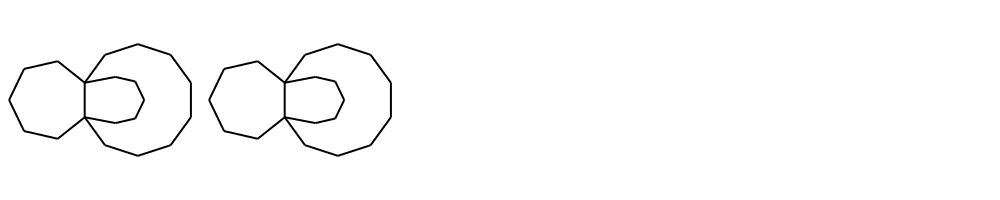

In [0]:
#Interpolation test in latent_space
i = 0
j= 2
latent1 = x_latent[j:j+1]
latent0 = x_latent[i:i+1]
mols1 = []
ratios = np.linspace(0,1,25)
for r in ratios:
    #print r
    rlatent = (1.0-r)*latent0 + r*latent1
    smiles  = latent_to_smiles(rlatent)
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        mols1.append(mol)
    else:
        print(smiles)
Draw.MolsToGridImage(mols1, molsPerRow=5)

RDKit ERROR: [13:55:45] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC3(CC1)CCCC3)CC1C'
RDKit ERROR: [13:55:45] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC3(CC1)CCCC3)CC1C'
RDKit ERROR: [13:55:45] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC3(CC1)CCCC3)CC1C'
RDKit ERROR: [13:55:45] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC3(CC1)CCCC3)CC1C'


C1CCCC2(CCCC3(CC1)CCCC3)CC1C
C1CCCC2(CCCC3(CC1)CCCC3)CC1C
C1CCCC2(CCCC3(CC1)CCCC3)CC1C
C1CCCC2(CCCC3(CC1)CCCC3)CC1C


RDKit ERROR: [13:55:45] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC3(CC1)CCCC3)CC1C'
RDKit ERROR: [13:55:45] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC23CCCC3)CCCCC2CC'
RDKit ERROR: [13:55:45] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC3(CC1)CCCCC3)C1C'


C1CCCC2(CCCC3(CC1)CCCC3)CC1C
C1CCCC2(CCCC23CCCC3)CCCCC2CC
C1CCCC2(CCCC3(CC1)CCCCC3)C1C


RDKit ERROR: [13:55:45] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC3(CC1)CCCC3)CC1C'
RDKit ERROR: [13:55:46] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC3(CC1)CCCC3)CC1C'
RDKit ERROR: [13:55:46] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC3(CC1)CCCC3)CC1C'
RDKit ERROR: [13:55:46] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC3(CC1)CCCC3)CC1C'


C1CCCC2(CCCC3(CC1)CCCC3)CC1C
C1CCCC2(CCCC3(CC1)CCCC3)CC1C
C1CCCC2(CCCC3(CC1)CCCC3)CC1C
C1CCCC2(CCCC3(CC1)CCCC3)CC1C


RDKit ERROR: [13:55:46] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC3(CC1)CCCC3)CC1C'
RDKit ERROR: [13:55:46] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC3(CC1)CCCC3)CCC1'
RDKit ERROR: [13:55:46] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC3(CC1)CCCC3)CC1C'
RDKit ERROR: [13:55:46] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC3(CC1)CCCC3)CC1C'


C1CCCC2(CCCC3(CC1)CCCC3)CC1C
C1CCCC2(CCCC3(CC1)CCCC3)CCC1
C1CCCC2(CCCC3(CC1)CCCC3)CC1C
C1CCCC2(CCCC3(CC1)CCCC3)CC1C


RDKit ERROR: [13:55:46] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC3(CC1)CCCC3)CC1C'
RDKit ERROR: [13:55:46] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC3(CC1)CCCC3)CC1C'
RDKit ERROR: [13:55:46] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC3(CC1)CCCC3)CC1C'
RDKit ERROR: [13:55:46] SMILES Parse Error: unclosed ring for input: 'C1CCCC2(CCCC3(CC1)CCCC3)CC1C'


C1CCCC2(CCCC3(CC1)CCCC3)CC1C
C1CCCC2(CCCC3(CC1)CCCC3)CC1C
C1CCCC2(CCCC3(CC1)CCCC3)CC1C
C1CCCC2(CCCC3(CC1)CCCC3)CC1C


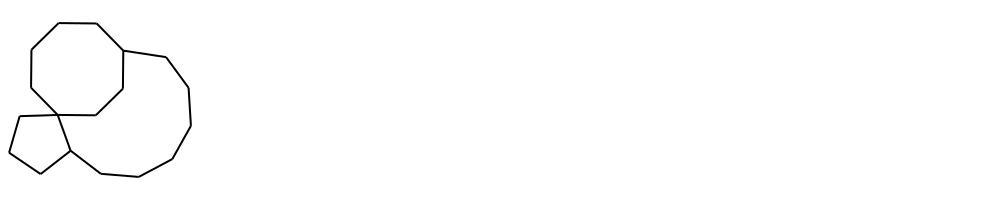

In [0]:
#Sample around the latent vector 
latent = x_latent[0:1]
scale = 0.40
mols = []
for i in range(20):
    latent_r = latent + scale*(np.random.randn(latent.shape[1])) #TODO, try with
    smiles = latent_to_smiles(latent_r)
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        mols.append(mol)
    else:
        print(smiles)
Draw.MolsToGridImage(mols, molsPerRow=5)